In [1]:
from neuron_model import dyns, neuron, network,e_dyns,exp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.integrate import solve_ivp,odeint
from typing import List
import pickle
from numba import jit,njit,typeof
from numba.typed import List as NumbaList

#mis=(np.random.rand(12,2)*0.2-0.1)+1.0
mis=np.array([[0.92609936, 1.04030251],
 [1.08990199, 0.96314537],
 [0.95855323, 1.04500793],
 [0.94757596, 1.07437747],
 [1.04912963, 1.09813075],
 [0.97847925, 0.94515563],
 [1.08024781, 1.02569354],
 [1.02212363, 0.99312849],
 [1.09042846, 1.09455804],
 [1.04422248, 1.05700935],
 [0.91937835, 1.00623917],
 [0.95225629, 1.04815975]])
#mis2=(np.random.rand(12,2)*0.1-0.05)+1.0
mis2=np.array([[0.9522494,  1.00529835],
 [0.98031493, 1.03712259],
 [0.97079993, 1.01578003],
 [0.96851134, 1.01300902],
 [1.03317727, 0.95304496],
 [0.9618265,  1.02377636],
 [0.9781444,  1.00494114],
 [0.96325415, 1.04678504],
 [0.99120024, 0.95379498],
 [1.04983736, 0.96970394],
 [0.96161522, 1.02271901],
 [1.00639862, 1.04303063]])

#mis3=(np.random.rand(12,2)*0.02-0.01)+1.0
mis3=np.array([[0.99613559, 0.99282902],
 [0.99108317, 1.00733338],
 [0.990744,   1.00030067],
 [1.00442029, 1.00776527],
 [0.99843125, 0.99669793],
 [0.99501247, 1.00510612],
 [1.00414166, 1.00567561],
 [0.99150875, 1.00000059],
 [0.99307946, 1.00737742],
 [1.00023778, 1.0091104 ],
 [1.00636472, 0.99636941],
 [1.00368592, 1.00672459]])

#mis_t=(np.random.rand(12,4)*0.01-0.005)*2+1.0
mis_t=np.array([[1.00624955, 1.00653017, 0.99632439, 1.00371368],
 [0.99696342, 0.992745,   0.99533094, 0.9936827 ],
 [1.00657543, 0.99577595, 1.00797668, 1.0082202 ],
 [0.9968211,  1.00796824, 1.00832337, 0.9922949 ],
 [1.00940513, 0.99072558, 0.99883522, 0.99657906],
 [0.99210138, 0.99354303, 1.00782988, 1.00993412],
 [1.00346248, 1.00776864, 1.0050221,  1.0009537 ],
 [0.99122363, 1.007003,   1.00363552, 0.99600824],
 [1.00503467, 0.99437215, 0.99785033, 0.99007775],
 [1.00216428, 0.99226534, 1.00489528, 0.99316654],
 [1.00536349, 0.99371844, 0.99261024, 0.99874712],
 [0.99540985, 1.00244202, 1.00577586, 1.00434942]])
#print(mis)
#print(mis_t)
#print(mis2)
print(mis3)
# generate internal dynamics with mismatches for robustness simulation
dyns_time=dyns(mis2,mis_t,True,False)
dyns_act=dyns(mis2,mis_t,False,True)
dyns_time_act=dyns(mis2,mis_t,True,True)

dyns_time2=dyns(mis3,mis_t,True,False)
dyns_act2=dyns(mis3,mis_t,False,True)
dyns_time_act2=dyns(mis3,mis_t,True,True)

[[0.99613559 0.99282902]
 [0.99108317 1.00733338]
 [0.990744   1.00030067]
 [1.00442029 1.00776527]
 [0.99843125 0.99669793]
 [0.99501247 1.00510612]
 [1.00414166 1.00567561]
 [0.99150875 1.00000059]
 [0.99307946 1.00737742]
 [1.00023778 1.0091104 ]
 [1.00636472 0.99636941]
 [1.00368592 1.00672459]]


In [5]:
ones=np.ones 
# Model parameters (global)
VNa = 50
VK = -80
VCa = 80
VH = -20
Vleak = -50
VSyn = -75
taus = 10.
C = 1.
taumean=30.

# Model parameters (mean)
Iappvec = 0.*ones(5)

Iappvec = 0.*ones(5) + 0/2*(np.random.rand(5)-0.5)
kcvec = 0.94*ones(5)
KdCavec = 3.*ones(5)

gleakvec = 0.01*ones(5)

gNavec = [652.814,503.58,634.723,459.807,616.433]
gCaTvec = [0.992884,0.824788,1.04958,1.14911,0.971846]
gCaTvec_MOD = [2.38666,2.19092,2.3409,2.82957,3.52574]
gCaSvec = [3.51903,3.55081,3.36012,2.49984,2.50894]
gCaSvec_MOD = [8.52841,8.00527,9.24152,9.73135,8.79102]
gAvec = [51.5008,58.3269,40.3572,58.5102,51.8502]
gKdvec = [109.659,84.1655,74.7833,91.1938,111.87]
gKCavec = [63.0373,54.1351,65.7822,55.9324,70.2168]
gHvec = [0.107445,0.0929811,0.078182,0.083414,0.0887343]
tmKCavec = [3.93883,3.24514,5.55055,12.6351,16.6223]

gsyn12 = 0.07635083670743605
gsyn13 = 0.07988922275521991
gsyn21 = 0.07716951193265496
gsyn45 = 0.07762158408977728
gsyn53 = .08835472319081544
gsyn54 = 0.11712333284581126
gEl23 = 0.021083916923133217
gEl43 = 0.022874860313218278

@jit
def sigmoid(x,tau):
    return 1/(1+exp(-tau*x))

#neural modulation schemes
@jit
def fgS(i,t):
    gCaSvec = [3.51903,3.55081,3.36012,2.49984,2.50894]
    gCaSvec_MOD = [8.52841,8.00527,9.24152,9.73135,8.79102] 
    step_time=[14000,7000]
    mod=[
    [0.,0.,0.,1.,1.],
    [1.,1.,0.,0.,0.],
    [0.,1.,1.,1.,0.]]
    for x in range(len(step_time)):
        if t>step_time[x]:
            choice=mod[x][i]
            last_choice=mod[x+1][i]
            return (gCaSvec[i]*(1-choice)+gCaSvec_MOD[i]*choice
                    -gCaSvec[i]*(1-last_choice)-gCaSvec_MOD[i]*last_choice)*sigmoid(t-step_time[x]-1000,0.01)+gCaSvec[i]*(1-last_choice)+gCaSvec_MOD[i]*last_choice
    return gCaSvec[i]*(1-mod[-1][i])+gCaSvec_MOD[i]*mod[-1][i]

@jit
def fgT(i,t):
    gCaTvec = [0.992884,0.824788,1.04958,1.14911,0.971846]
    gCaTvec_MOD = [2.38666,2.19092,2.3409,2.82957,3.52574] 
    step_time=[14000,7000]
    mod=[
    [0.,0.,0.,1.,1.],
    [1.,1.,0.,0.,0.],
    [0.,1.,1.,1.,0.]]
    for x in range(len(step_time)):
        if t>step_time[x]:
            choice=mod[x][i]
            last_choice=mod[x+1][i]
            return (gCaTvec[i]*(1-choice)+gCaTvec_MOD[i]*choice
                    -gCaTvec[i]*(1-last_choice)-gCaTvec_MOD[i]*last_choice)*sigmoid(t-step_time[x]-1000,0.01)+gCaTvec[i]*(1-last_choice)+gCaTvec_MOD[i]*last_choice  
    return gCaTvec[i]*(1-mod[-1][i])+gCaTvec_MOD[i]*mod[-1][i]


@jit
def fgS2(i,t):
    gCaSvec = [3.51903,3.55081,3.36012,2.49984,2.50894]
    gCaSvec_MOD = [8.52841,8.00527,9.24152,9.73135,8.79102] 
    step_time=[12000]
    mod=[
    [1.,1.,0.,0.,0.],
    [0.,1.,1.,1.,0.]]
    for x in range(len(step_time)):
        if t>step_time[x]:
            choice=mod[x][i]
            last_choice=mod[x+1][i]
            return (gCaSvec[i]*(1-choice)+gCaSvec_MOD[i]*choice
                    -gCaSvec[i]*(1-last_choice)-gCaSvec_MOD[i]*last_choice)*sigmoid(t-step_time[x]-1000,0.01)+gCaSvec[i]*(1-last_choice)+gCaSvec_MOD[i]*last_choice
    return gCaSvec[i]*(1-mod[-1][i])+gCaSvec_MOD[i]*mod[-1][i]

@jit
def fgT2(i,t):
    gCaTvec = [0.992884,0.824788,1.04958,1.14911,0.971846]
    gCaTvec_MOD = [2.38666,2.19092,2.3409,2.82957,3.52574] 
    step_time=[12000]
    mod=[
    [1.,1.,0.,0.,0.],
    [0.,1.,1.,1.,0.]]
    for x in range(len(step_time)):
        if t>step_time[x]:
            choice=mod[x][i]
            last_choice=mod[x+1][i]
            return (gCaTvec[i]*(1-choice)+gCaTvec_MOD[i]*choice
                    -gCaTvec[i]*(1-last_choice)-gCaTvec_MOD[i]*last_choice)*sigmoid(t-step_time[x]-1000,0.01)+gCaTvec[i]*(1-last_choice)+gCaTvec_MOD[i]*last_choice  
    return gCaTvec[i]*(1-mod[-1][i])+gCaTvec_MOD[i]*mod[-1][i]

@jit
def fgS3(i,t):
    gCaSvec = [3.51903,3.55081,3.36012,2.49984,2.50894]
    gCaSvec_MOD = [8.52841,8.00527,9.24152,9.73135,8.79102] 
    step_time=[15000,8500]
    mod=[
    [0.,0.,0.,1.,1.],
    [1.,1.,0.,0.,0.],
    [0.,1.,1.,1.,0.]]
    for x in range(len(step_time)):
        if t>step_time[x]:
            choice=mod[x][i]
            last_choice=mod[x+1][i]
            return (gCaSvec[i]*(1-choice)+gCaSvec_MOD[i]*choice
                    -gCaSvec[i]*(1-last_choice)-gCaSvec_MOD[i]*last_choice)*sigmoid(t-step_time[x]-1000,0.01)+gCaSvec[i]*(1-last_choice)+gCaSvec_MOD[i]*last_choice
    return gCaSvec[i]*(1-mod[-1][i])+gCaSvec_MOD[i]*mod[-1][i]

@jit
def fgT3(i,t):
    gCaTvec = [0.992884,0.824788,1.04958,1.14911,0.971846]
    gCaTvec_MOD = [2.38666,2.19092,2.3409,2.82957,3.52574] 
    step_time=[15000,8500]
    mod=[
    [0.,0.,0.,1.,1.],
    [1.,1.,0.,0.,0.],
    [0.,1.,1.,1.,0.]]
    for x in range(len(step_time)):
        if t>step_time[x]:
            choice=mod[x][i]
            last_choice=mod[x+1][i]
            return (gCaTvec[i]*(1-choice)+gCaTvec_MOD[i]*choice
                    -gCaTvec[i]*(1-last_choice)-gCaTvec_MOD[i]*last_choice)*sigmoid(t-step_time[x]-1000,0.01)+gCaTvec[i]*(1-last_choice)+gCaTvec_MOD[i]*last_choice  
    return gCaTvec[i]*(1-mod[-1][i])+gCaTvec_MOD[i]*mod[-1][i]
import copy

# STG network generators 
def random_MOD_mis(MOD,mis_time=False,mis_act=False): # use V only observer
  
    gCaTvec_now = gCaTvec.copy()
    gCaSvec_now = gCaSvec.copy()
    for i in range(len(MOD)):
        if (MOD[i] < 0.5):
            MOD[i] = 0.
            gCaTvec_now[i] = copy.copy(gCaTvec[i])
            gCaSvec_now[i] = copy.copy(gCaSvec[i])
        else:
            MOD[i] = 1.
            gCaTvec_now[i] = copy.copy(gCaTvec_MOD[i])
            gCaSvec_now[i] = copy.copy(gCaSvec_MOD[i])
    
    cells=[]
    
    if (mis_time and mis_act):# define interal dynamics model of the observer (with mismatches or not)
        e_dyns2=dyns_time_act
    elif mis_time:
        e_dyns2=dyns_time
    elif mis_act:
        e_dyns2=dyns_act
    else:
        e_dyns2=e_dyns
    
    for i in range(5):
        cells.append(neuron(NumbaList(
            [gCaTvec_now[i],gKdvec[i],gHvec[i],gNavec[i],gAvec[i],gCaSvec_now[i],gKCavec[i],C,gleakvec[i],KdCavec[i],kcvec[i]]
        ),
             e_dyns,e_dyns2,ob_type='V'
        ))# initialised cells in the STG network
        cells[i].set_input(NumbaList([Iappvec[i],0,0,0,0,0,0,2,0,0]))
        cells[i].set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
        cells[i].set_tau(tmKCavec[i],1.,10.)
    # defined network topology (two types of connections, each defined by a matrix)
    net1=network(cells,[[0,gsyn21,0.,0.,0.],[gsyn12,0.,0.,0.,0.],[gsyn13,0.,0.,0.,gsyn53],[0.,0.,0.,0.,gsyn54],[0.,0.,0.,gsyn45,0.]],
         [[0.,0.,0.,0.,0.],[0.,0.,gEl23,0.,0.],[0.,gEl23,0.,gEl43,0.],[0.,0.,gEl43,0.,0.],[0.,0.,0.,0.,0.]])
    
    return net1

def random_MOD_mis2(MOD,mis_time=False,mis_act=False):# use V and Ca input observer

    gCaTvec_now = gCaTvec.copy()
    gCaSvec_now = gCaSvec.copy()
    for i in range(len(MOD)):
        if (MOD[i] < 0.5):
            MOD[i] = 0.
            gCaTvec_now[i] = copy.copy(gCaTvec[i])
            gCaSvec_now[i] = copy.copy(gCaSvec[i])
        else:
            MOD[i] = 1.
            gCaTvec_now[i] = copy.copy(gCaTvec_MOD[i])
            gCaSvec_now[i] = copy.copy(gCaSvec_MOD[i])
    
    cells=[]
    
    if (mis_time and mis_act):
        e_dyns2=dyns_time_act
    elif mis_time:
        e_dyns2=dyns_time
    elif mis_act:
        e_dyns2=dyns_act
    else:
        e_dyns2=e_dyns
        
    for i in range(5):
        cells.append(neuron(NumbaList(
            [gCaTvec_now[i],gKdvec[i],gHvec[i],gNavec[i],gAvec[i],gCaSvec_now[i],gKCavec[i],C,gleakvec[i],KdCavec[i],kcvec[i]]
        ),
           e_dyns,e_dyns2,ob_type='V_Ca'
        ))
        cells[i].set_input(NumbaList([Iappvec[i],0,0,0,0,0,0,2,0,0]))
        cells[i].set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
        cells[i].set_tau(tmKCavec[i],1.,10.)
    net1=network(cells,[[0,gsyn21,0.,0.,0.],[gsyn12,0.,0.,0.,0.],[gsyn13,0.,0.,0.,gsyn53],[0.,0.,0.,0.,gsyn54],[0.,0.,0.,gsyn45,0.]],
         [[0.,0.,0.,0.,0.],[0.,0.,gEl23,0.,0.],[0.,gEl23,0.,gEl43,0.],[0.,0.,gEl43,0.,0.],[0.,0.,0.,0.,0.]])
    
    return net1

def random_MOD_mis3(MOD,mis_time=False,mis_act=False):# Ca based observer
  
    gCaTvec_now = gCaTvec.copy()
    gCaSvec_now = gCaSvec.copy()
    for i in range(len(MOD)):
        if (MOD[i] < 0.5):
            MOD[i] = 0.
            gCaTvec_now[i] = copy.copy(gCaTvec[i])
            gCaSvec_now[i] = copy.copy(gCaSvec[i])
        else:
            MOD[i] = 1.
            gCaTvec_now[i] = copy.copy(gCaTvec_MOD[i])
            gCaSvec_now[i] = copy.copy(gCaSvec_MOD[i])
    
    cells=[]
    
    if (mis_time and mis_act):
        e_dyns2=dyns_time_act
    elif mis_time:
        e_dyns2=dyns_time
    elif mis_act:
        e_dyns2=dyns_act
    else:
        e_dyns2=e_dyns
        
    for i in range(5):
        cells.append(neuron(NumbaList(
            [gCaTvec_now[i],gKdvec[i],gHvec[i],gNavec[i],gAvec[i],gCaSvec_now[i],gKCavec[i],C,gleakvec[i],KdCavec[i],kcvec[i]]
        ),
             e_dyns,e_dyns2,ob_type='Ca'
        ))
        cells[i].set_input(NumbaList([Iappvec[i],0,0,0,0,0,0,2,0,0]))
        cells[i].set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
        cells[i].set_tau(tmKCavec[i],1.,10.)
    net1=network(cells,[[0,gsyn21,0.,0.,0.],[gsyn12,0.,0.,0.,0.],[gsyn13,0.,0.,0.,gsyn53],[0.,0.,0.,0.,gsyn54],[0.,0.,0.,gsyn45,0.]],
         [[0.,0.,0.,0.,0.],[0.,0.,gEl23,0.,0.],[0.,gEl23,0.,gEl43,0.],[0.,0.,gEl43,0.,0.],[0.,0.,0.,0.,0.]])
    
    return net1


def inti_cond_net(net1):
    return [*net1.cells[0].init_cond_OB(-60+5),*net1.cells[1].init_cond_OB(-60-5),*net1.cells[2].init_cond_OB(-61),*net1.cells[3].init_cond_OB(-60-2),*net1.cells[4].init_cond_OB(-60+1)]

def inti_cond_net_mis(net1):
    return [*net1.cells[0].init_cond_OB_mis(-60+5),*net1.cells[1].init_cond_OB_mis(-60-5),*net1.cells[2].init_cond_OB_mis(-61),*net1.cells[3].init_cond_OB_mis(-60-2),*net1.cells[4].init_cond_OB_mis(-60+1)]

def inti_cond_net_0(net1):
    return [*net1.cells[0].init_cond_OB_0(-60+5),*net1.cells[1].init_cond_OB_0(-60-5),*net1.cells[2].init_cond_OB_0(-61),*net1.cells[3].init_cond_OB_0(-60-2),*net1.cells[4].init_cond_OB_0(-60+1)]

def inti_cond_net_sys(net1):
    result=[]
    for cell in net1.cells:
        result=[*result,*cell.init_cond(-60+(np.random.rand()-0.5)*10)]
    return result


In [6]:
#ploting functions
def plot_fun(net1,sol5,origin=0):
    T_plot=10000
    plt.figure(figsize=(30, 30))
    plt.subplot(5, 1, 1)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[0][T_plot:], label='observer output')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_p][T_plot:],label= 'neuron output')
    plt.legend()
    plt.subplot(5, 1, 2)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys][T_plot:] ,label='observer output')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_p][T_plot:],label= 'neuron output')
    plt.legend()
    plt.subplot(5, 1, 3)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys][T_plot:],label='observer output')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_p][T_plot:],label= 'neuron output')
    plt.legend()
    plt.subplot(5, 1, 4)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys][T_plot:],label='observer output')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_p][T_plot:],label= 'neuron output')
    plt.legend()
    plt.subplot(5, 1, 5)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_u_sys][T_plot:],label='observer output')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_u_sys+net1.cells[4].pos_p][T_plot:],label= 'neuron output')
    plt.legend()
    plt.show()
    
def plot_fun1(net1,sol5,origin=0):
    plt.figure(figsize=(30, 30))
    plt.subplot(5, 1, 1)
    plt.plot(sol5.t-origin, sol5.y[12], label='observer output')
    plt.plot(sol5.t-origin, sol5.y[net1.cells[0].pos_p+12],label= 'neuron output')
    plt.legend()
    plt.subplot(5, 1, 2)
    plt.plot(sol5.t-origin, sol5.y[net1.cells[0].pos_u_sys+12] ,label='observer output')
    plt.plot(sol5.t-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_p+12],label= 'neuron output')
    plt.legend()
    plt.subplot(5, 1, 3)
    plt.plot(sol5.t-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+12],label='observer output')
    plt.plot(sol5.t-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_p+12],label= 'neuron output')
    plt.legend()
    plt.subplot(5, 1, 4)
    plt.plot(sol5.t-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+12],label='observer output')
    plt.plot(sol5.t-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_p+12],label= 'neuron output')
    plt.legend()
    plt.subplot(5, 1, 5)
    plt.plot(sol5.t-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_u_sys+12],label='observer output')
    plt.plot(sol5.t-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_u_sys+net1.cells[4].pos_p+12],label= 'neuron output')
    plt.legend()
    plt.show()
    
def plot_fun2(net1,sol5,fgS_=fgS,fgT_=fgT,origin=0):
    fgS_array=[[fgS_(j,i) for i in sol5.t]for j in range(5)]
    fgT_array=[[fgT_(j,i) for i in sol5.t]for j in range(5)]
    
    fig=plt.figure(figsize=(30, 30))
    plt.subplot(5, 1, 1)
    T_plot=30000
    plt.rc('xtick', labelsize=16)
    plt.plot(sol5.t[T_plot:]-origin,fgS_array[0][T_plot:],label='gS',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin,fgT_array[0][T_plot:],label='gT',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_dinamics+2][T_plot:], label='observer gT')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_dinamics+7][T_plot:], label='observer gS')
    plt.legend(prop={"size":25})
    plt.subplot(5, 1, 2)
    plt.plot(sol5.t[T_plot:]-origin,fgS_array[1][T_plot:],label='gS',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin,fgT_array[1][T_plot:],label='gT',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_dinamics+2][T_plot:] ,label='observer gT')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_dinamics+7][T_plot:] ,label='observer gS')
    plt.legend(prop={"size":25})
    plt.subplot(5, 1, 3)
    plt.plot(sol5.t[T_plot:]-origin,fgS_array[2][T_plot:],label='gS',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin,fgT_array[2][T_plot:],label='gT',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_dinamics+2][T_plot:],label='observer gT')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_dinamics+7][T_plot:],label='observer gS')
    plt.legend(prop={"size":25})
    plt.subplot(5, 1, 4)
    plt.plot(sol5.t[T_plot:]-origin,fgS_array[3][T_plot:],label='gS',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin,fgT_array[3][T_plot:],label='gT',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_dinamics+2][T_plot:],label='observer gT')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_dinamics+7][T_plot:],label='observer gS')
    plt.legend(prop={"size":25})
    plt.subplot(5, 1, 5)
    plt.plot(sol5.t[T_plot:]-origin,fgS_array[4][T_plot:],label='gS',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin,fgT_array[4][T_plot:],label='gT',linewidth=6)
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_u_sys+net1.cells[4].pos_dinamics+2][T_plot:],label='observer gT')
    plt.plot(sol5.t[T_plot:]-origin, sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_u_sys+net1.cells[4].pos_dinamics+7][T_plot:],label='observer gS')
    plt.legend(prop={"size":25})
    plt.show()
    print(sol5.y[net1.cells[0].pos_dinamics+2][-1])
    print(sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_dinamics+2][-1])
    print(sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_dinamics+2][-1])
    print(sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_dinamics+2][-1])
    print(sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_u_sys+net1.cells[4].pos_dinamics+2][-1])
    return fig
    
def plot_fun3(net1,sol5,origin=0):

    labels=[ 'Na','H','T','A','Kd','leak','KCa','S','syn1','syn2','syn3','syn4']
    
    plt.figure(figsize=(30, 30))
    plt.subplot(5, 1, 1)
    T_plot=30000
    
    for i in range(net1.cells[0].num_Theta):
        plt.plot(sol5.t[T_plot:]-origin,sol5.y[net1.cells[0].pos_dinamics+i][T_plot:],label=labels[i])
    plt.legend()
    
    plt.subplot(5, 1, 2)
    for i in range(net1.cells[1].num_Theta):
        plt.plot(sol5.t[T_plot:]-origin,sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_dinamics+i][T_plot:],label=labels[i])
    plt.legend()
    
    plt.subplot(5, 1, 3)
    for i in range(net1.cells[2].num_Theta):
        plt.plot(sol5.t[T_plot:]-origin,sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_dinamics+i][T_plot:],label=labels[i])
    plt.legend()
    
    plt.subplot(5, 1, 4)
    for i in range(net1.cells[3].num_Theta):
        plt.plot(sol5.t[T_plot:]-origin,sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_dinamics+i][T_plot:],label=labels[i])
    plt.legend()
    
    plt.subplot(5, 1, 5)
    for i in range(net1.cells[4].num_Theta):
        plt.plot(sol5.t[T_plot:]-origin,sol5.y[net1.cells[0].pos_u_sys+net1.cells[1].pos_u_sys+net1.cells[2].pos_u_sys+net1.cells[3].pos_u_sys+net1.cells[4].pos_dinamics+i][T_plot:],label=labels[i])
    plt.legend()
    
    plt.show()    
    
def plot_fun_sys(net1,sol,origin=0):   
    plt.figure(figsize=(30, 30))
    plt.subplot(5, 1, 1)
    plt.plot(sol.t, sol.y[0])
    plt.subplot(5, 1, 2)
    plt.plot(sol.t, sol.y[net1.cells[0].pos_dinamics])
    plt.subplot(5, 1, 3)
    plt.plot(sol.t, sol.y[net1.cells[0].pos_dinamics+net1.cells[1].pos_dinamics])
    plt.subplot(5, 1, 4)
    plt.plot(sol.t, sol.y[net1.cells[0].pos_dinamics+net1.cells[1].pos_dinamics+net1.cells[2].pos_dinamics])
    plt.subplot(5, 1, 5)
    plt.plot(sol.t, sol.y[net1.cells[0].pos_dinamics+net1.cells[1].pos_dinamics+net1.cells[2].pos_dinamics+net1.cells[3].pos_dinamics])
    plt.show()

## Single neuron

In [59]:
cell1=neuron(NumbaList(
            [gCaTvec[0],gKdvec[0],gHvec[0],gNavec[0],gAvec[0],gCaSvec[0],gKCavec[0],C,gleakvec[0],KdCavec[0],kcvec[0]]
        ),
             e_dyns,dyns_time_act,ob_type='Ca'
        )
cell1.set_input(NumbaList([Iappvec[0],0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)
gamma=10.
alpha=0.001
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.]) # no synape connections so only 8 parameters
cell1.set_hyp(gamma,alpha,variable_mask1)
# get initial condition 
X0=cell1.init_cond_OB(-60)
# set simulation time
Tfinal=20000.0
tspan=[0.0,Tfinal]
# start simulation and the timer 
start = time.time()
sol=solve_ivp(cell1.OB_ODE_Ca_equ,tspan , X0)#use Ca observer
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
[6.52814000e+02 1.07445000e-01 9.81278141e+01 5.15008000e+01
 1.09659000e+02 1.00000000e-02 6.30373000e+01 4.30120483e+01]
[-66.60464846]
Elapsed (with compilation) = 41.57076382637024


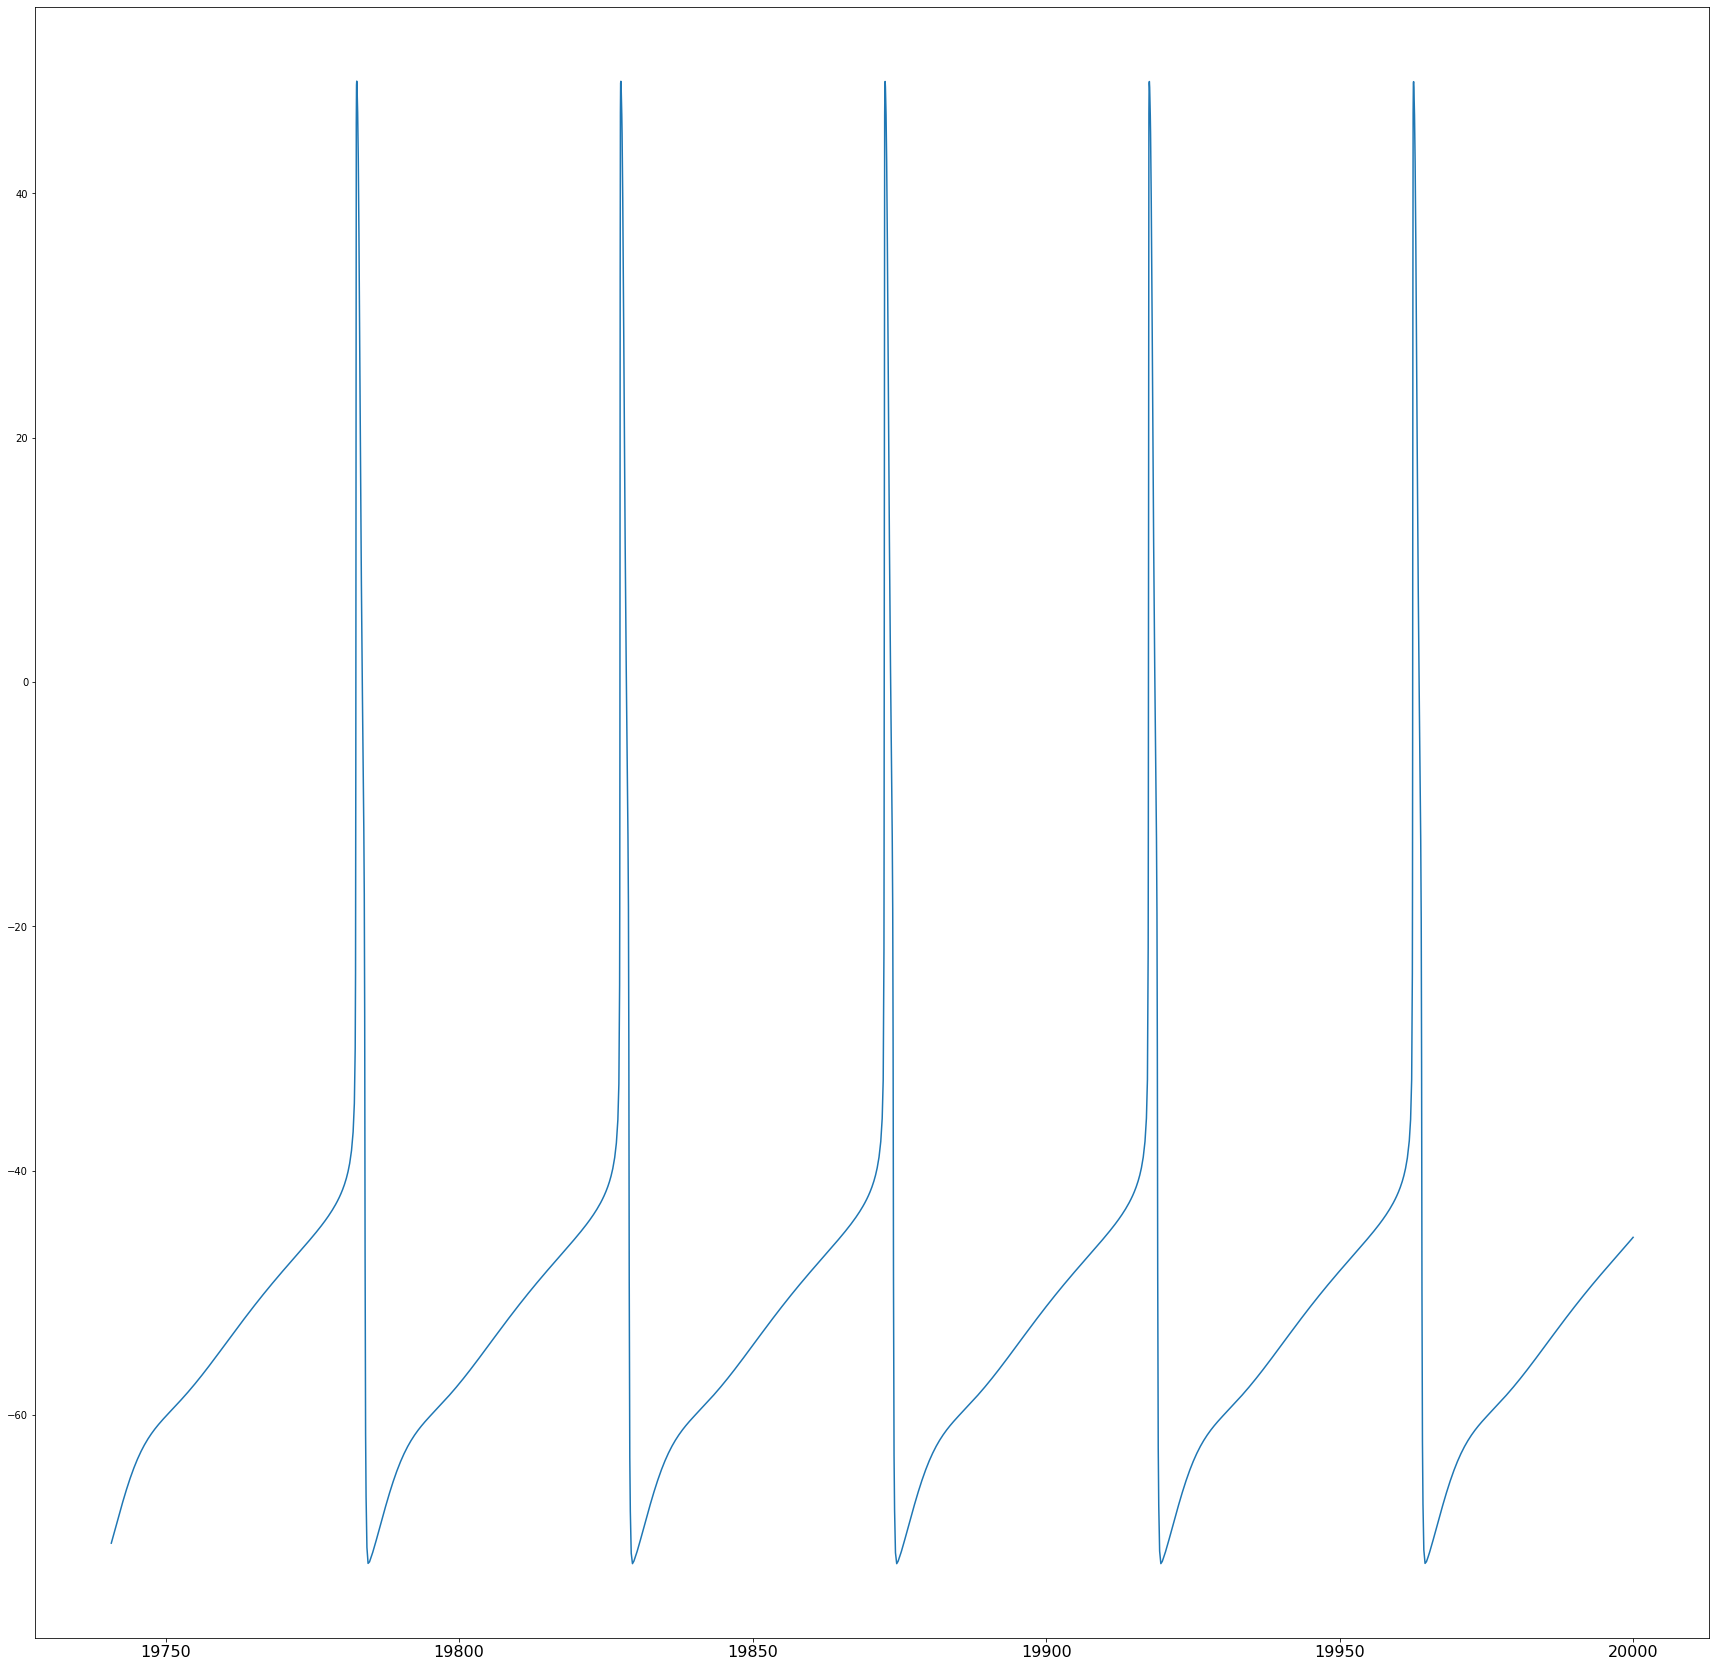

In [60]:
fig=plt.figure(figsize=(30, 30))
plt.plot(sol.t[-1000:], sol.y[cell1.pos_p][-1000:])

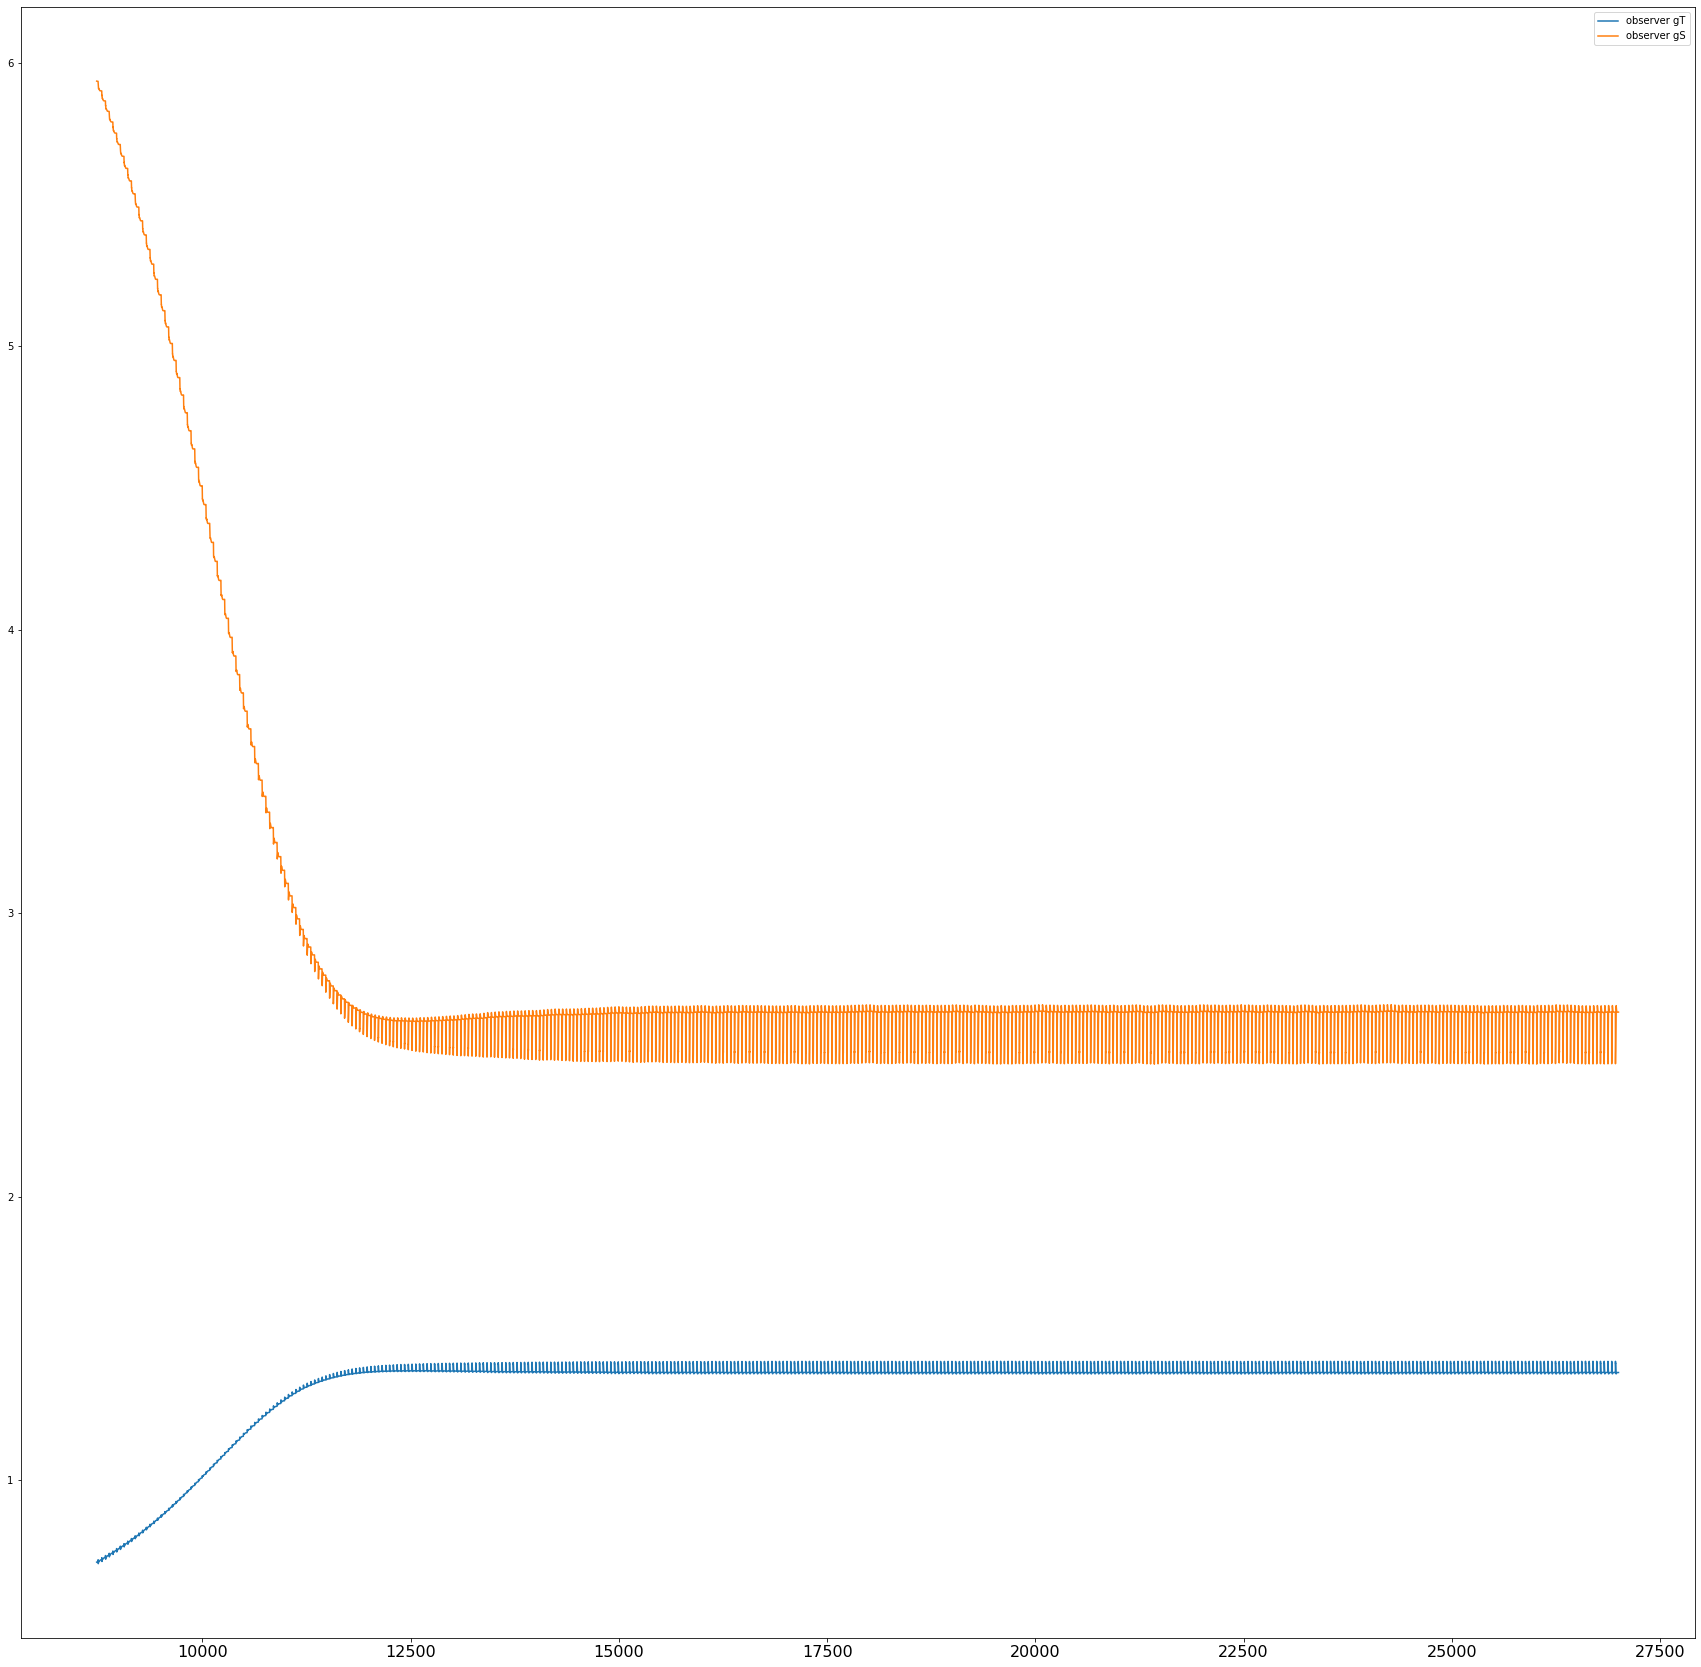

Estimated value
1.3828823418023029
2.6335793367858034
Exact value
0.992884
3.51903


In [61]:
T_plot=7000
origin=-7000
fig=plt.figure(figsize=(30, 30))
plt.plot(sol.t[T_plot:]-origin, sol.y[cell1.pos_dinamics+2][T_plot:], label='observer gT')
plt.plot(sol.t[T_plot:]-origin, sol.y[cell1.pos_dinamics+7][T_plot:], label='observer gS')
plt.legend()
plt.show()
print('Estimated value')
print(np.mean(sol.y[cell1.pos_dinamics+2][-1000:]))
print(np.mean(sol.y[cell1.pos_dinamics+7][-1000:]))
print('Exact value')
print(gCaTvec[0])
print(gCaSvec[0])

In [62]:
cell1=neuron(NumbaList(
            [1.3775031778678026,gKdvec[0],gHvec[0],gNavec[0],gAvec[0],2.8973004351343725,gKCavec[0],C,gleakvec[0],KdCavec[0],kcvec[0]]
        ),
             dyns_time_act,dyns_time_act,ob_type='Ca'
        )
cell1.set_input(NumbaList([Iappvec[0],0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)
# get initial condition 
X0=cell1.init_cond(-60)
# set simulation time
Tfinal=20000.0
tspan=[0.0,Tfinal]
# start simulation and the timer 
start = time.time()
sol2=solve_ivp(cell1.equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 18.488067388534546


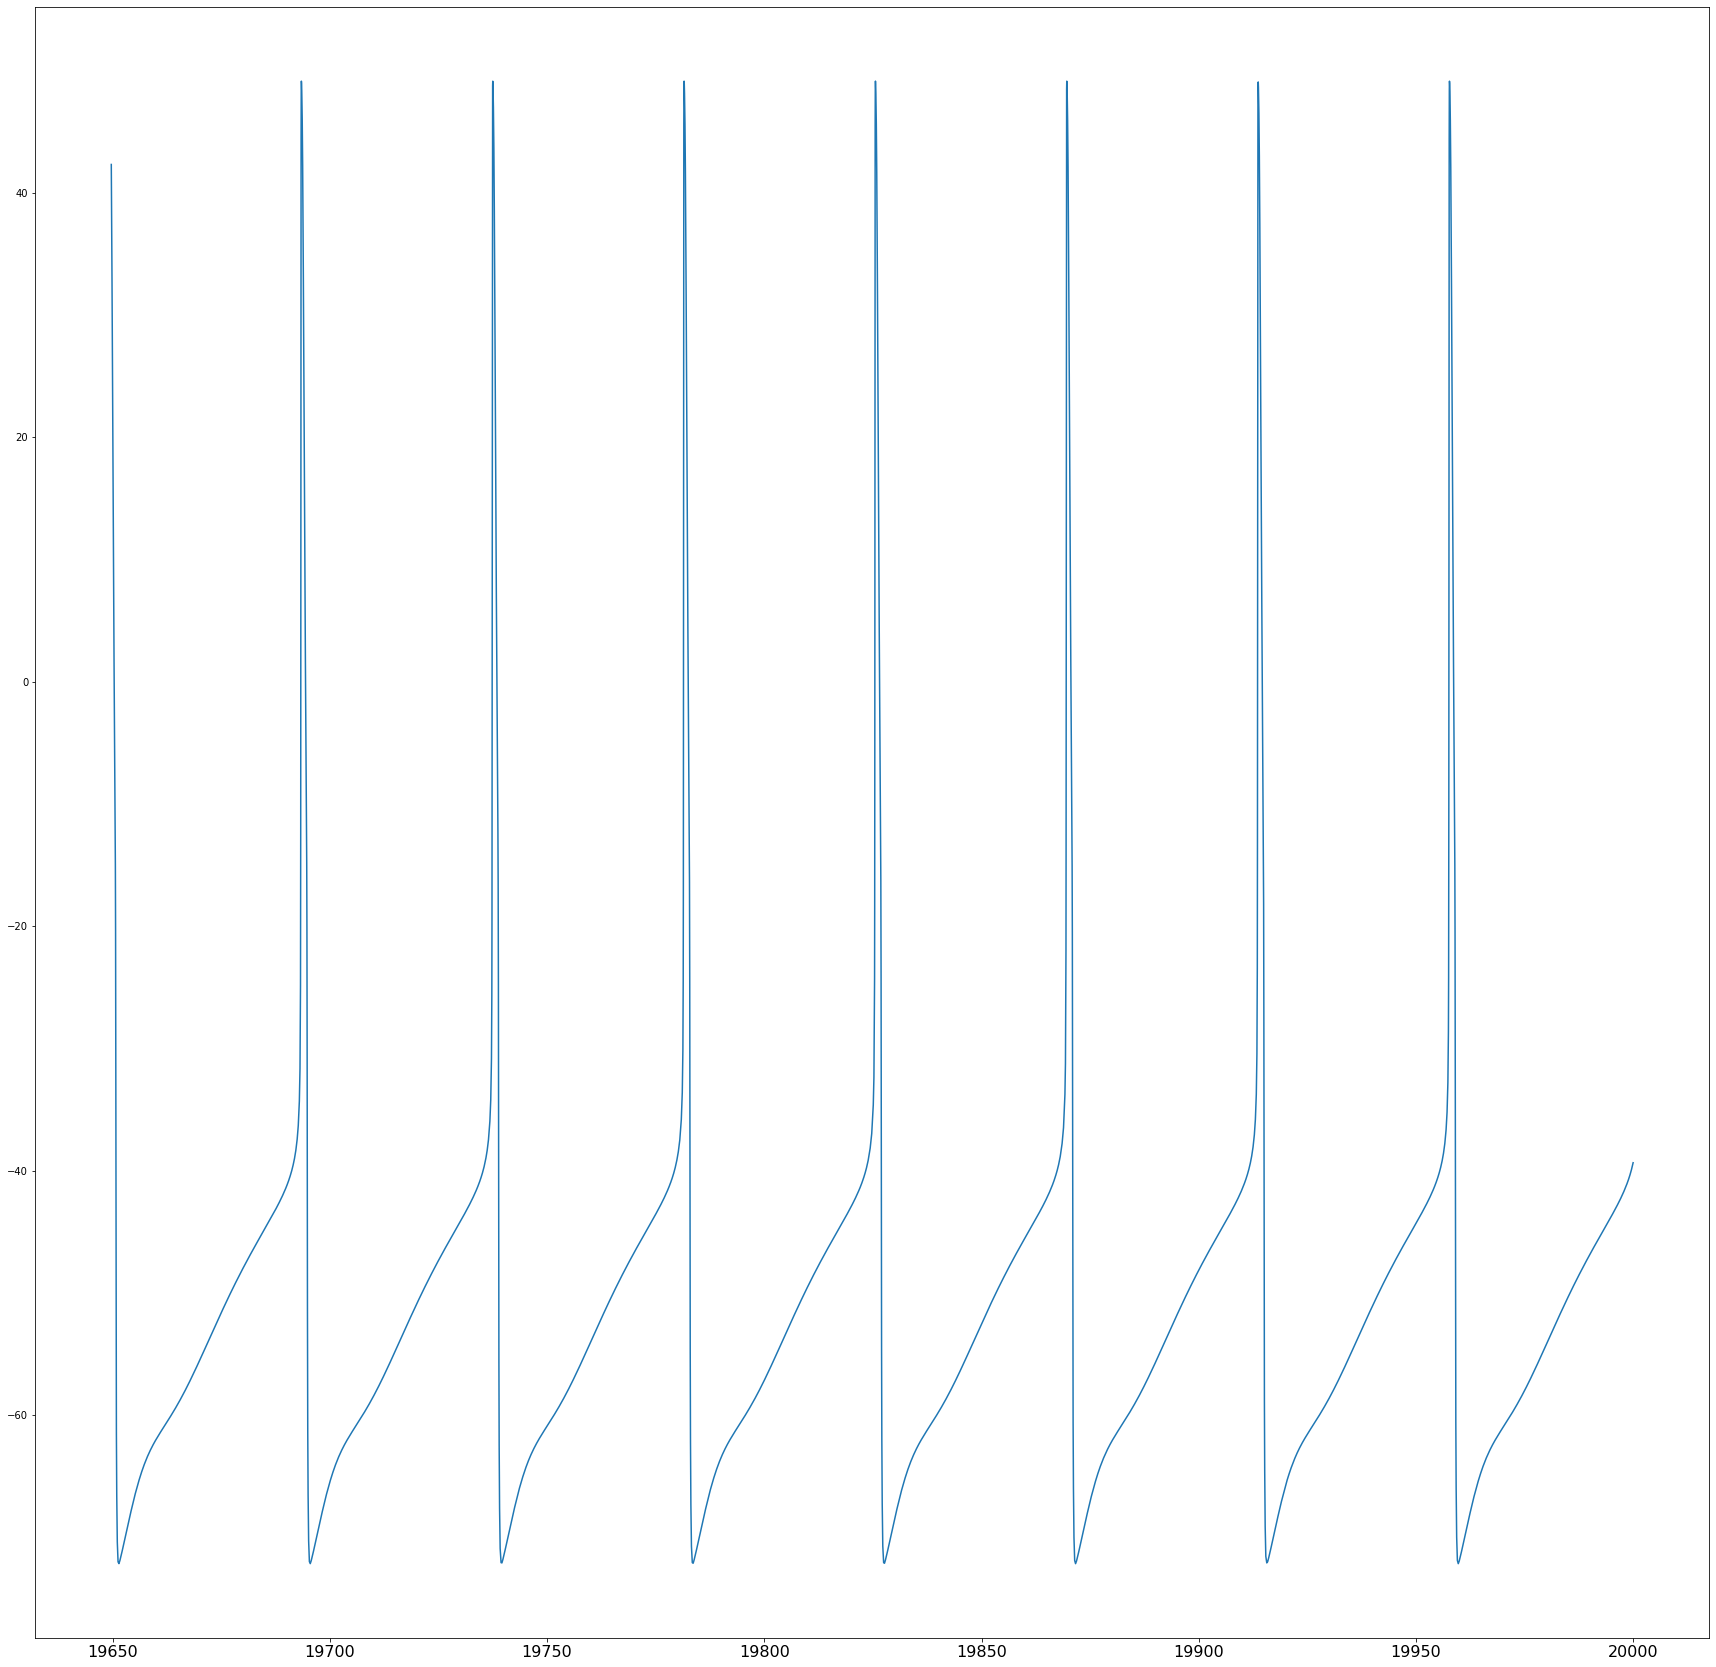

In [63]:
fig=plt.figure(figsize=(30, 30))
plt.plot(sol2.t[-1000:], sol2.y[0][-1000:])

Different frequency-----19880-20000  2 spikes

In [64]:
cell1=neuron(NumbaList(
            [gCaTvec[0],gKdvec[0],gHvec[0],gNavec[0],gAvec[0],gCaSvec[0],gKCavec[0],C,gleakvec[0],KdCavec[0],kcvec[0]]
        ),
             e_dyns,e_dyns,ob_type='Ca'
        )
cell1.set_input(NumbaList([-0.227,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)
# get initial condition 
X0=cell1.init_cond(-60)
# set simulation time
Tfinal=20000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 200000)
# start simulation and the timer 
start = time.time()
sol3=odeint(cell1.equ, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 3.2865498065948486


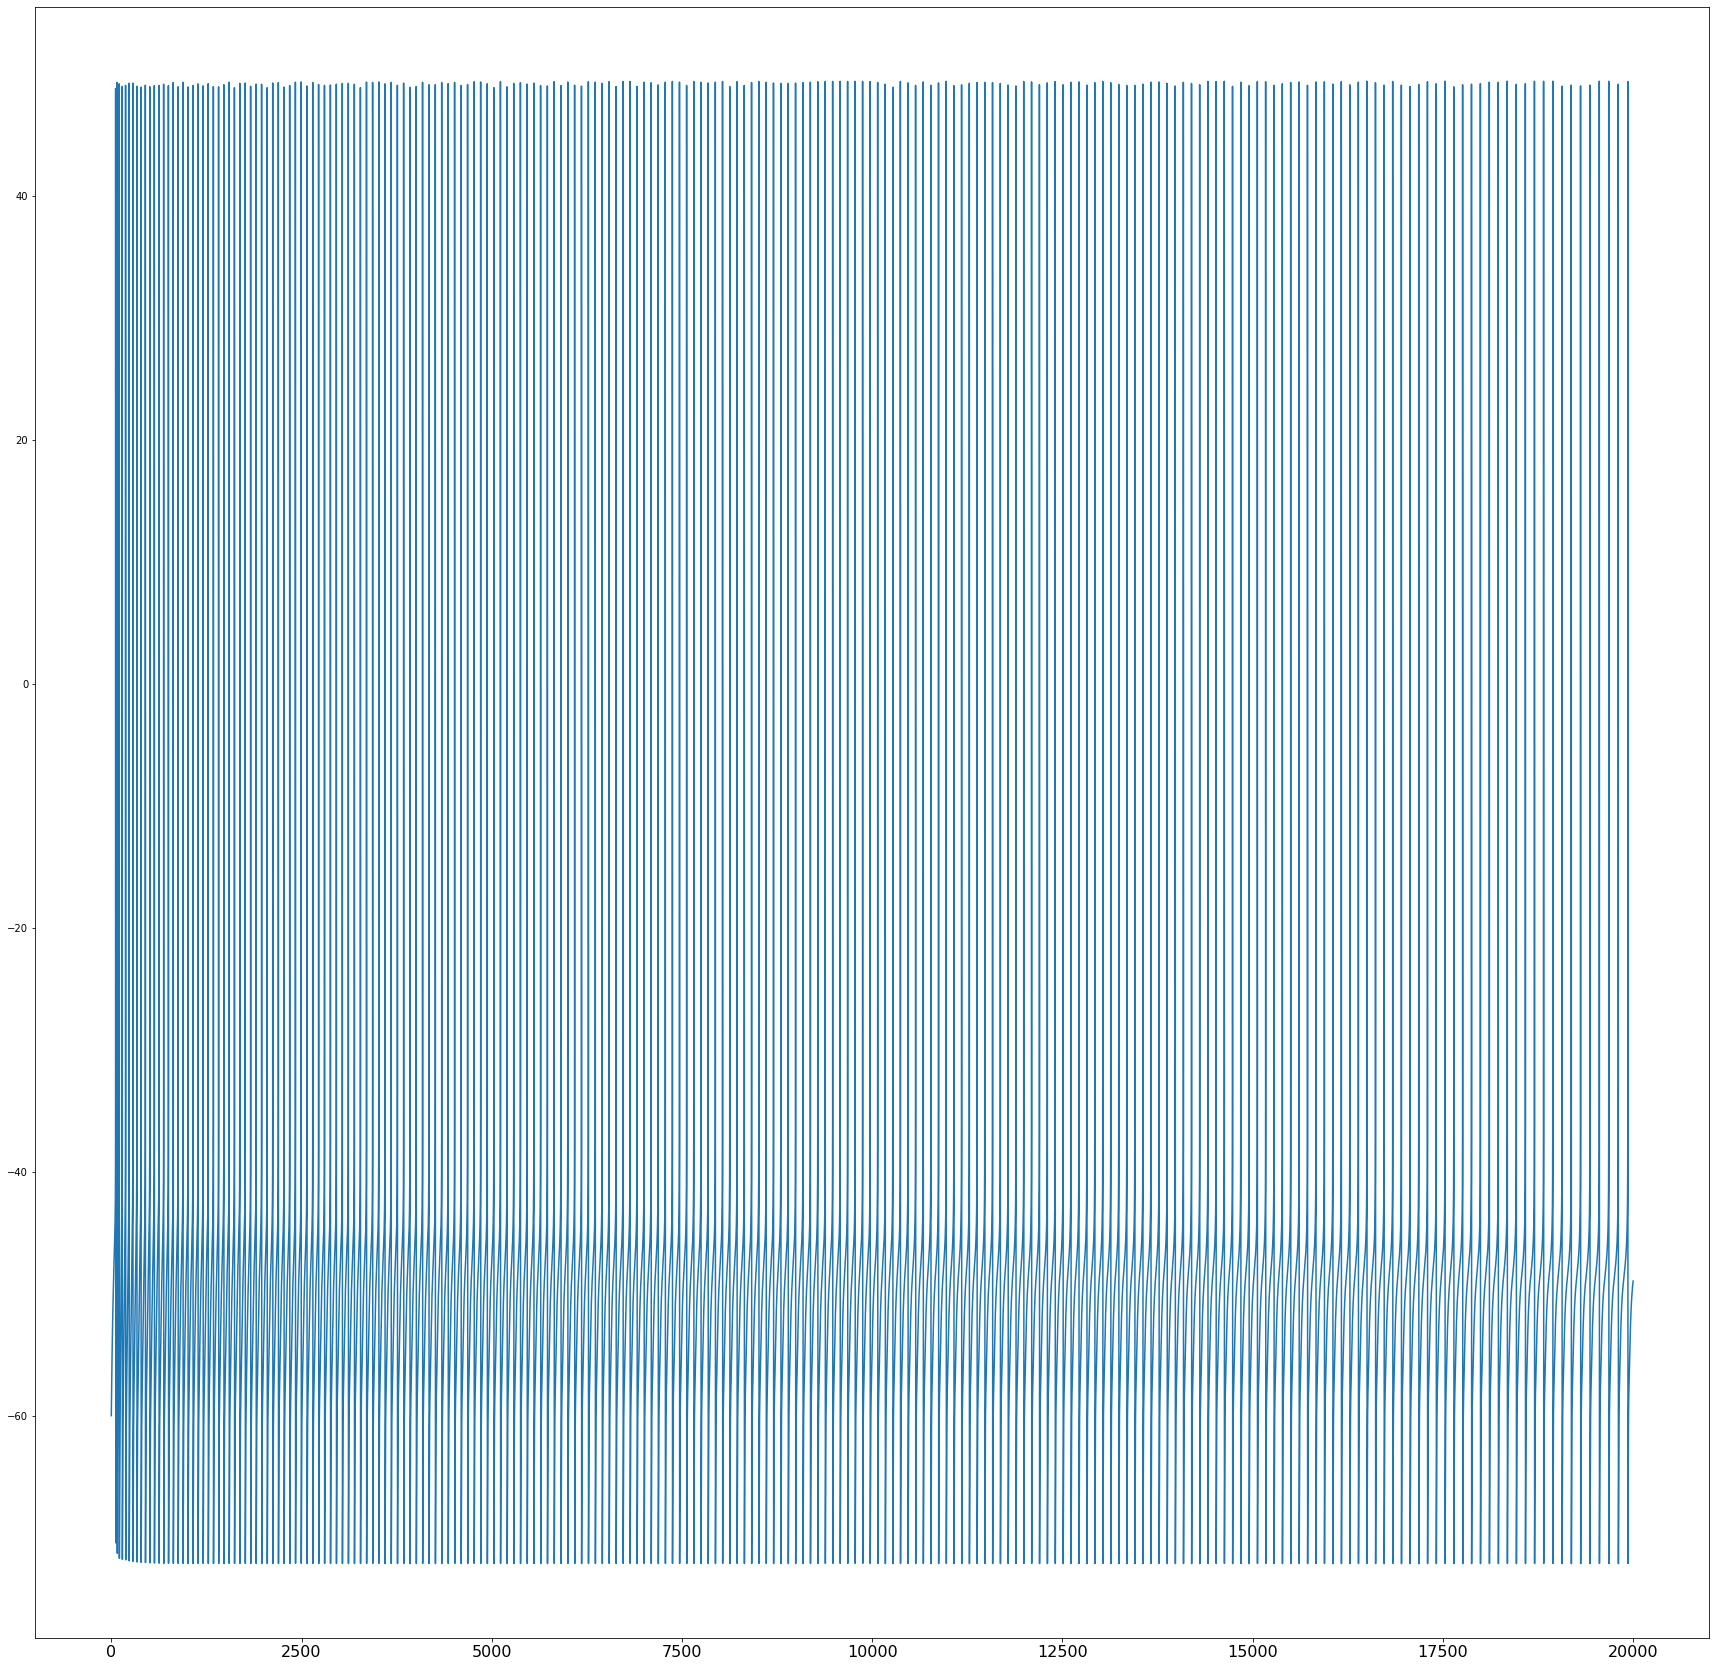

In [65]:
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol3[:,0])

In [66]:
cell1=neuron(NumbaList(
            [gCaTvec[0],gKdvec[0],gHvec[0],gNavec[0],gAvec[0],gCaSvec[0],gKCavec[0],C,gleakvec[0],KdCavec[0],kcvec[0]]
        ),
             dyns_time_act,dyns_time_act,ob_type='Ca'
        )
cell1.set_input(NumbaList([-0.227,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)
# get initial condition 
X0=cell1.init_cond(-60)
# set simulation time
Tfinal=20000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 200000)
# start simulation and the timer 
start = time.time()
sol4=odeint(cell1.equ, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 4.875982046127319


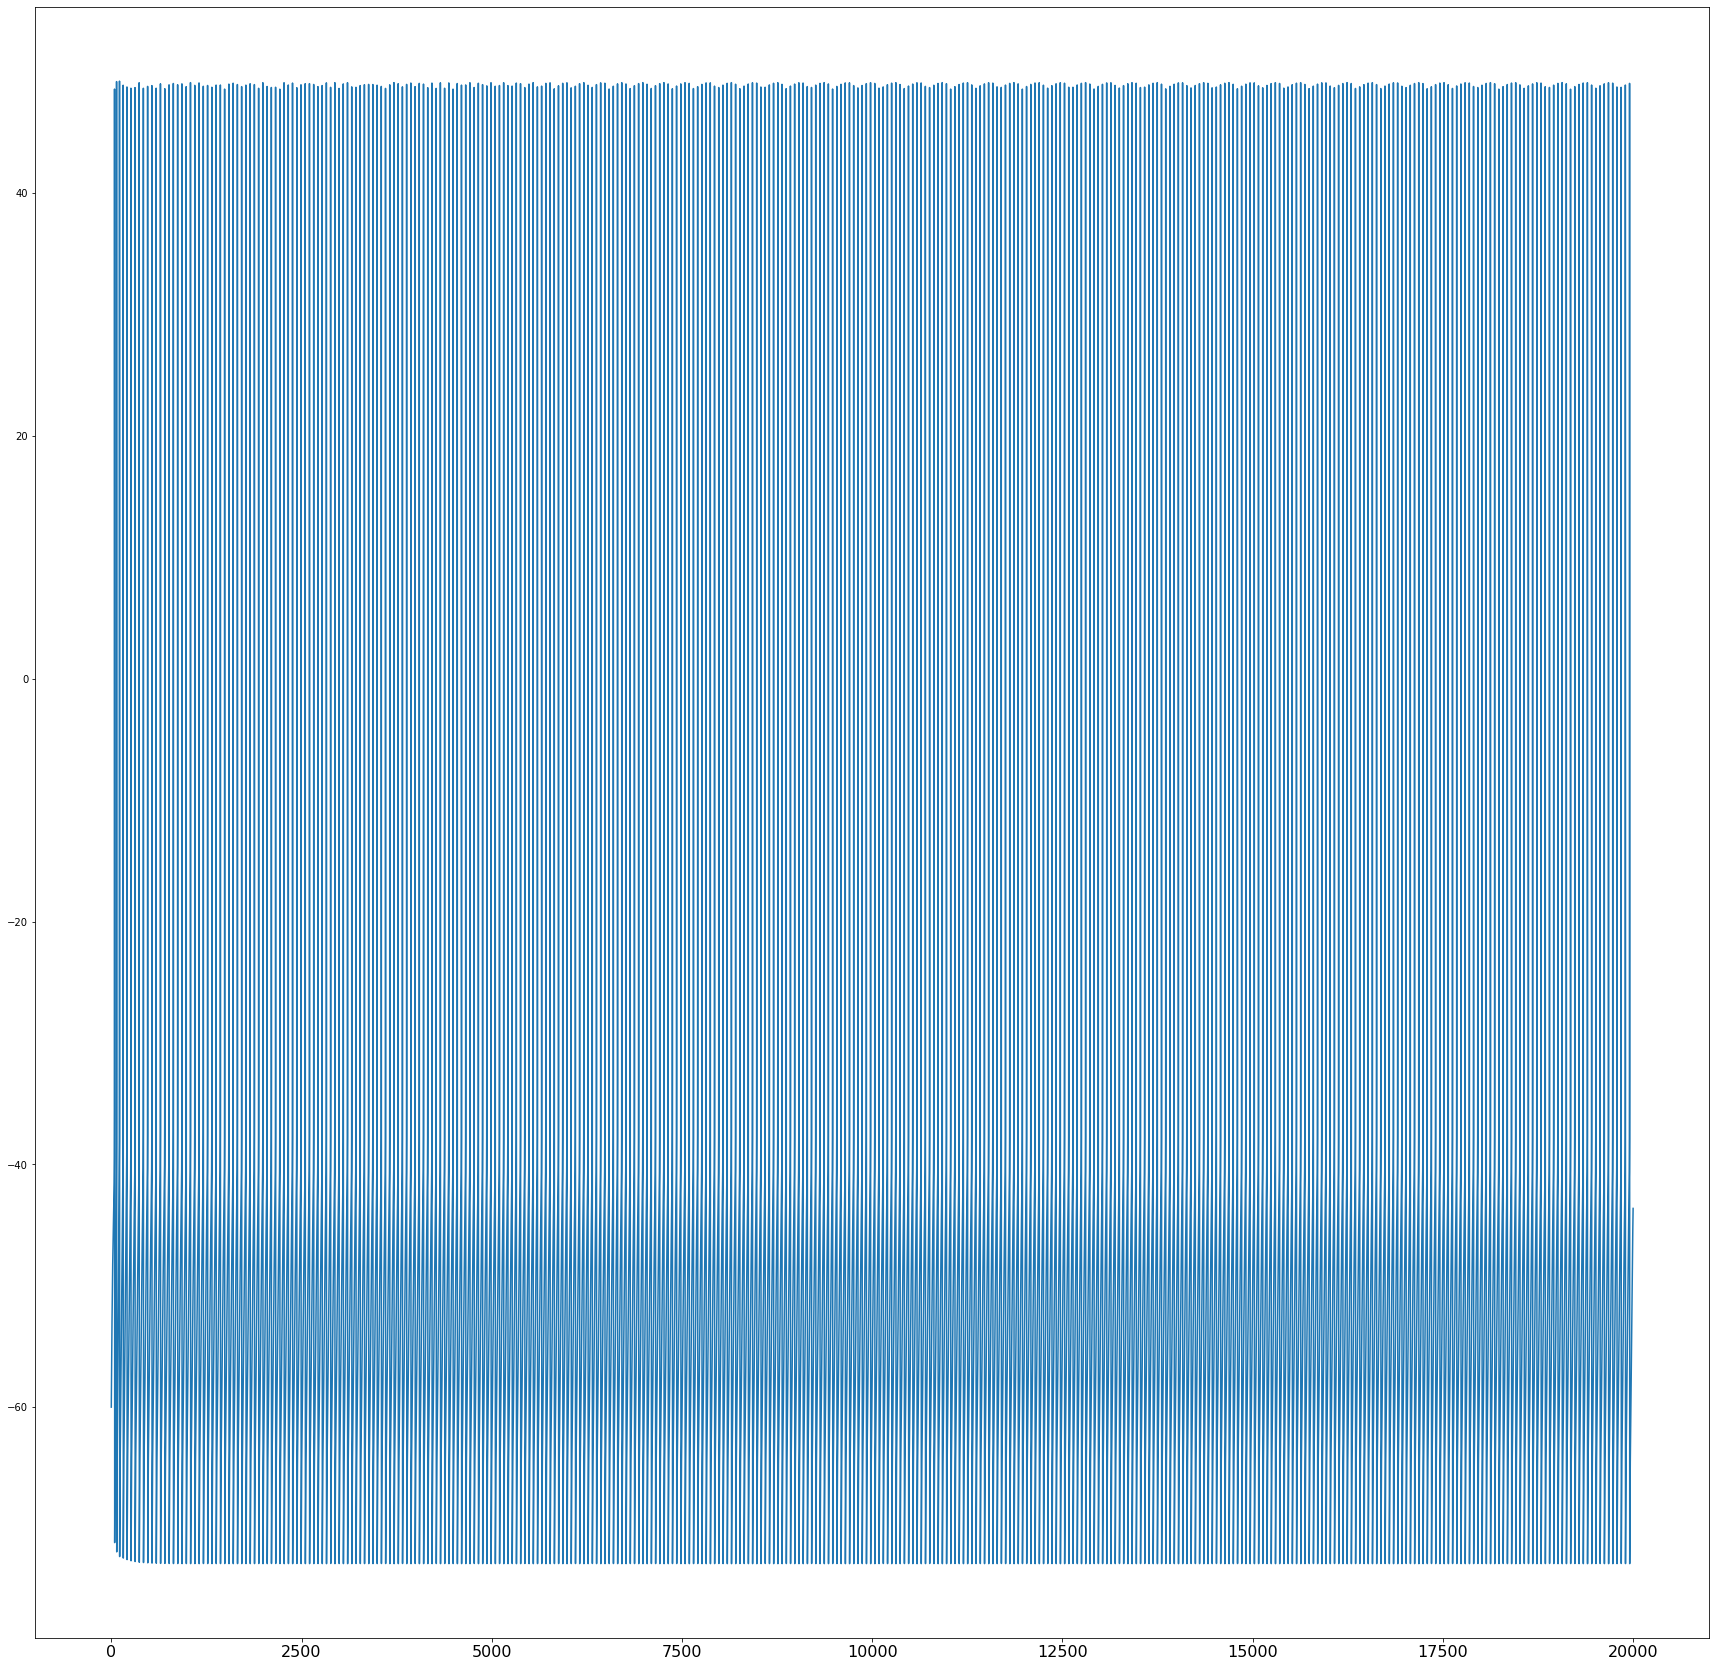

In [67]:
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol4[:,0])

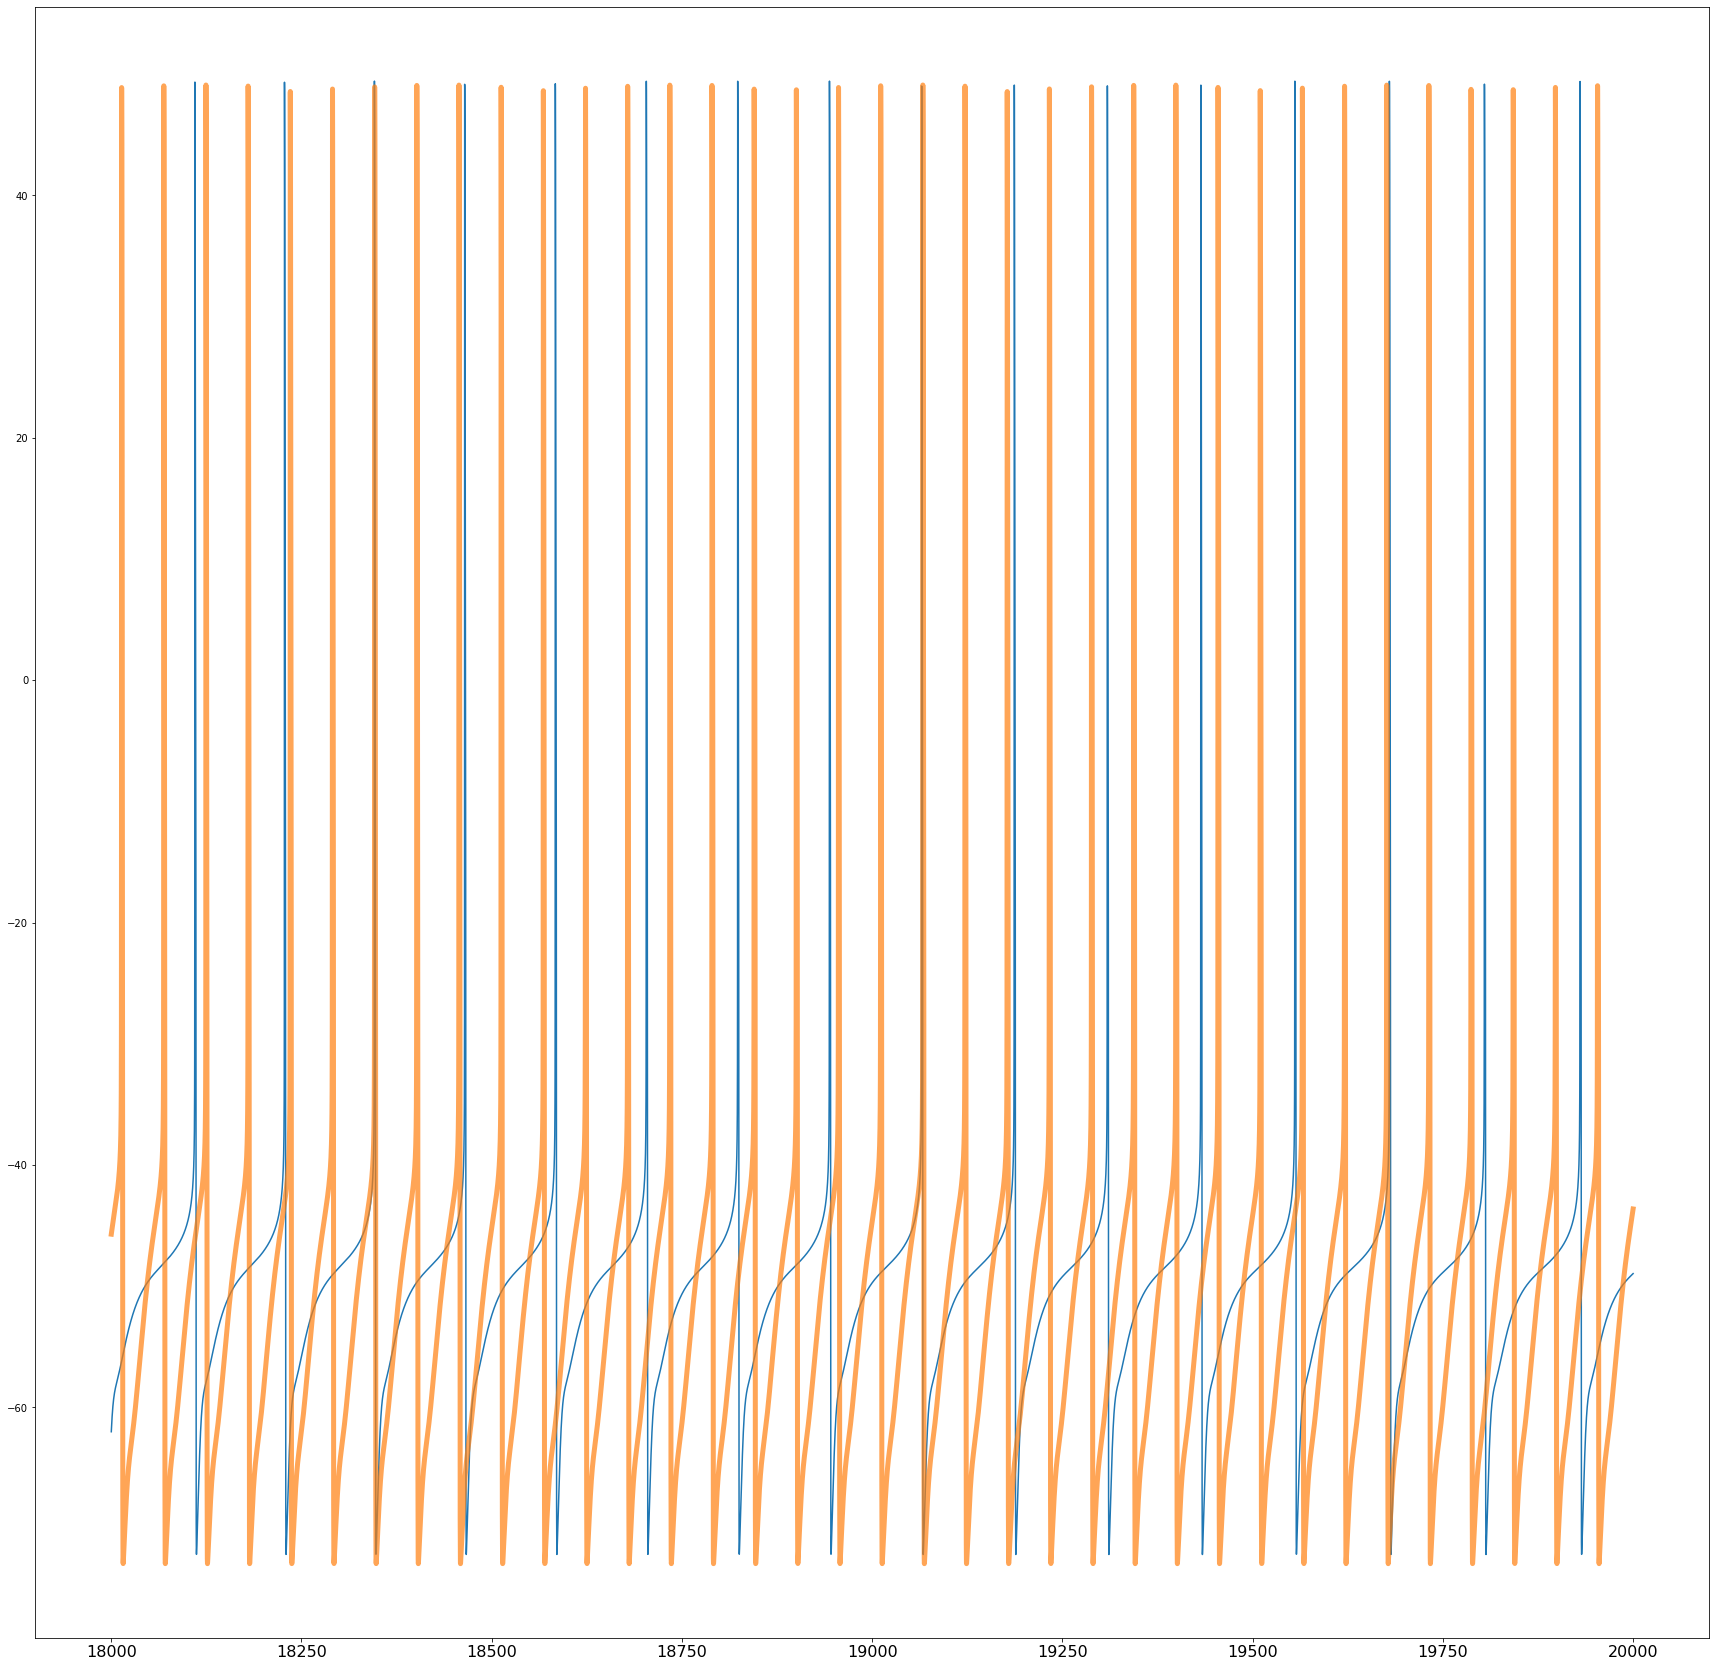

In [68]:
T=np.linspace(0., 20000, 200000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T[-20000:], sol3[:,0][-20000:])
plt.plot(T[-20000:], sol4[:,0][-20000:],linewidth=5,alpha=0.7)

0.017790611452330726


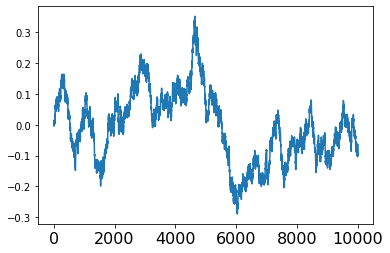

In [69]:
noise=(np.random.normal(size=200000))*6
noise[0]=0
for i in range(len(noise)-1):
    noise[i+1]=noise[i]+(noise[i+1]-noise[i])/1000
plt.plot(noise[0:10000])
print(noise.var())

In [70]:
cell1=neuron(NumbaList(
            [gCaTvec[0],gKdvec[0],gHvec[0],gNavec[0],gAvec[0],gCaSvec[0],gKCavec[0],C,gleakvec[0],KdCavec[0],kcvec[0]]
        ),
             e_dyns,e_dyns,ob_type='Ca'
        )
cell1.set_input(NumbaList([-0.6,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)


def noisy_input_neuron(t,u):
    return cell1.equ_noise(t,u,noise[int(t*10)-1])
    
# get initial condition 
X0=cell1.init_cond(-0)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol5=odeint(noisy_input_neuron, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 26.269596338272095


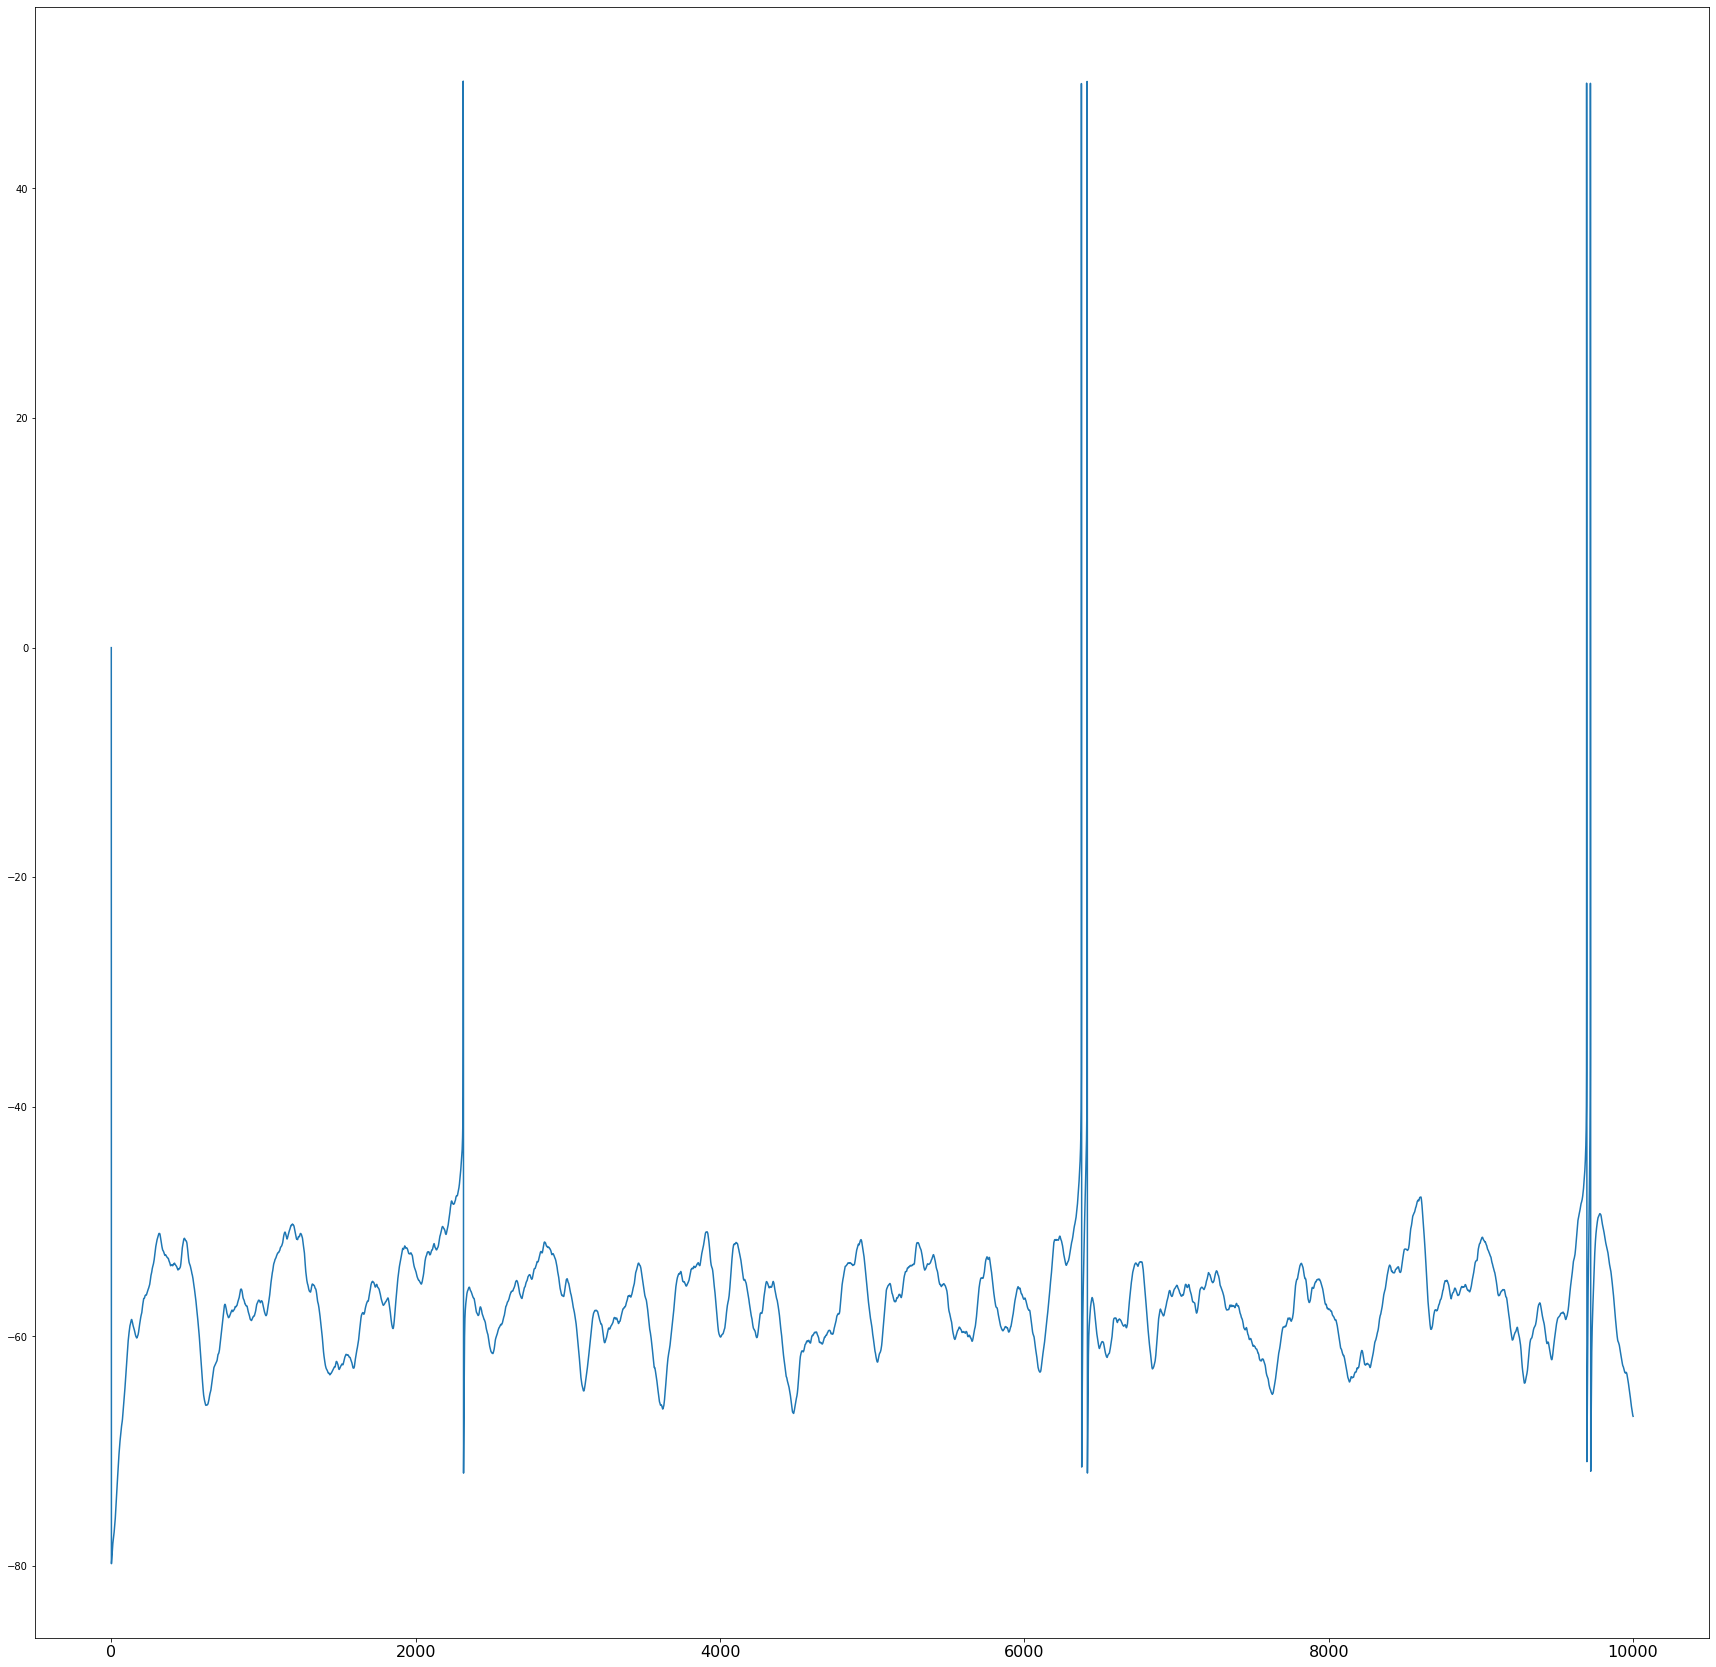

In [71]:
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol5[:,0])

In [72]:
cell1=neuron(NumbaList(
            [gCaTvec[0],gKdvec[0],gHvec[0],gNavec[0],gAvec[0],gCaSvec[0],gKCavec[0],C,gleakvec[0],KdCavec[0],kcvec[0]]
        ),
             dyns_time,dyns_time,ob_type='Ca'
        )
cell1.set_input(NumbaList([-0.6,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)


def noisy_input_neuron(t,u):
    return cell1.equ_noise(t,u,noise[int(t*10)-1])
    
# get initial condition 
X0=cell1.init_cond(-0)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol6=odeint(noisy_input_neuron, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 29.48975896835327


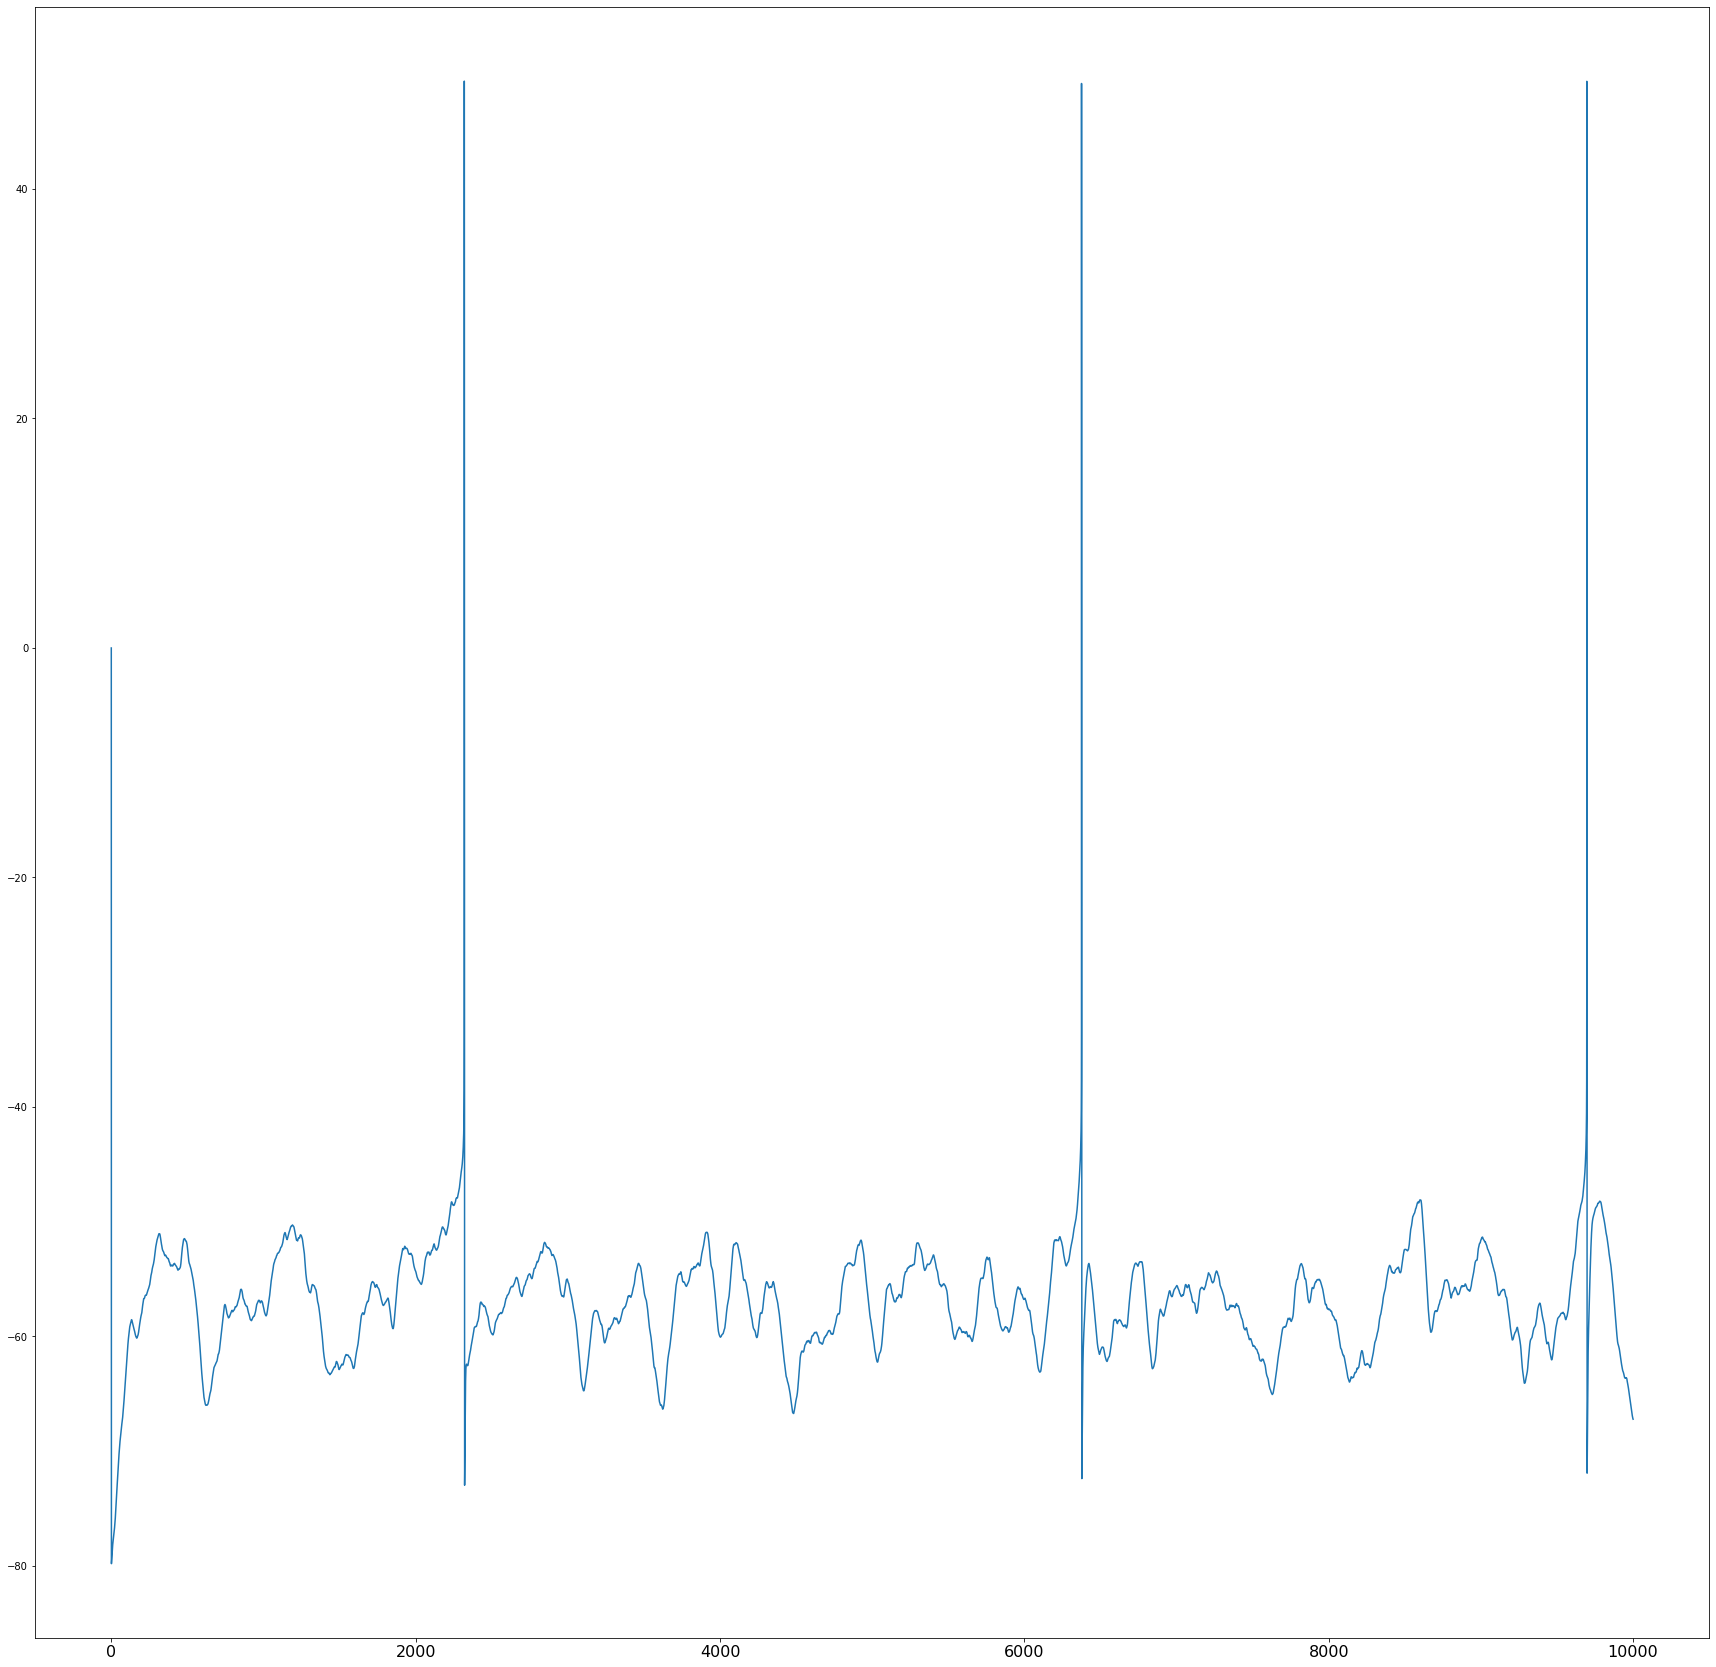

In [73]:
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol6[:,0])

In [74]:
cell1=neuron(NumbaList(
            [gCaTvec[0],gKdvec[0],gHvec[0],gNavec[0],gAvec[0],gCaSvec[0],gKCavec[0],C,gleakvec[0],KdCavec[0],kcvec[0]]
        ),
             dyns_time_act,dyns_time_act,ob_type='Ca'
        )
cell1.set_input(NumbaList([-0.6,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)


def noisy_input_neuron(t,u):
    return cell1.equ_noise(t,u,noise[int(t*10)-1])
    
# get initial condition 
X0=cell1.init_cond(-0)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol7=odeint(noisy_input_neuron, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 30.873984813690186


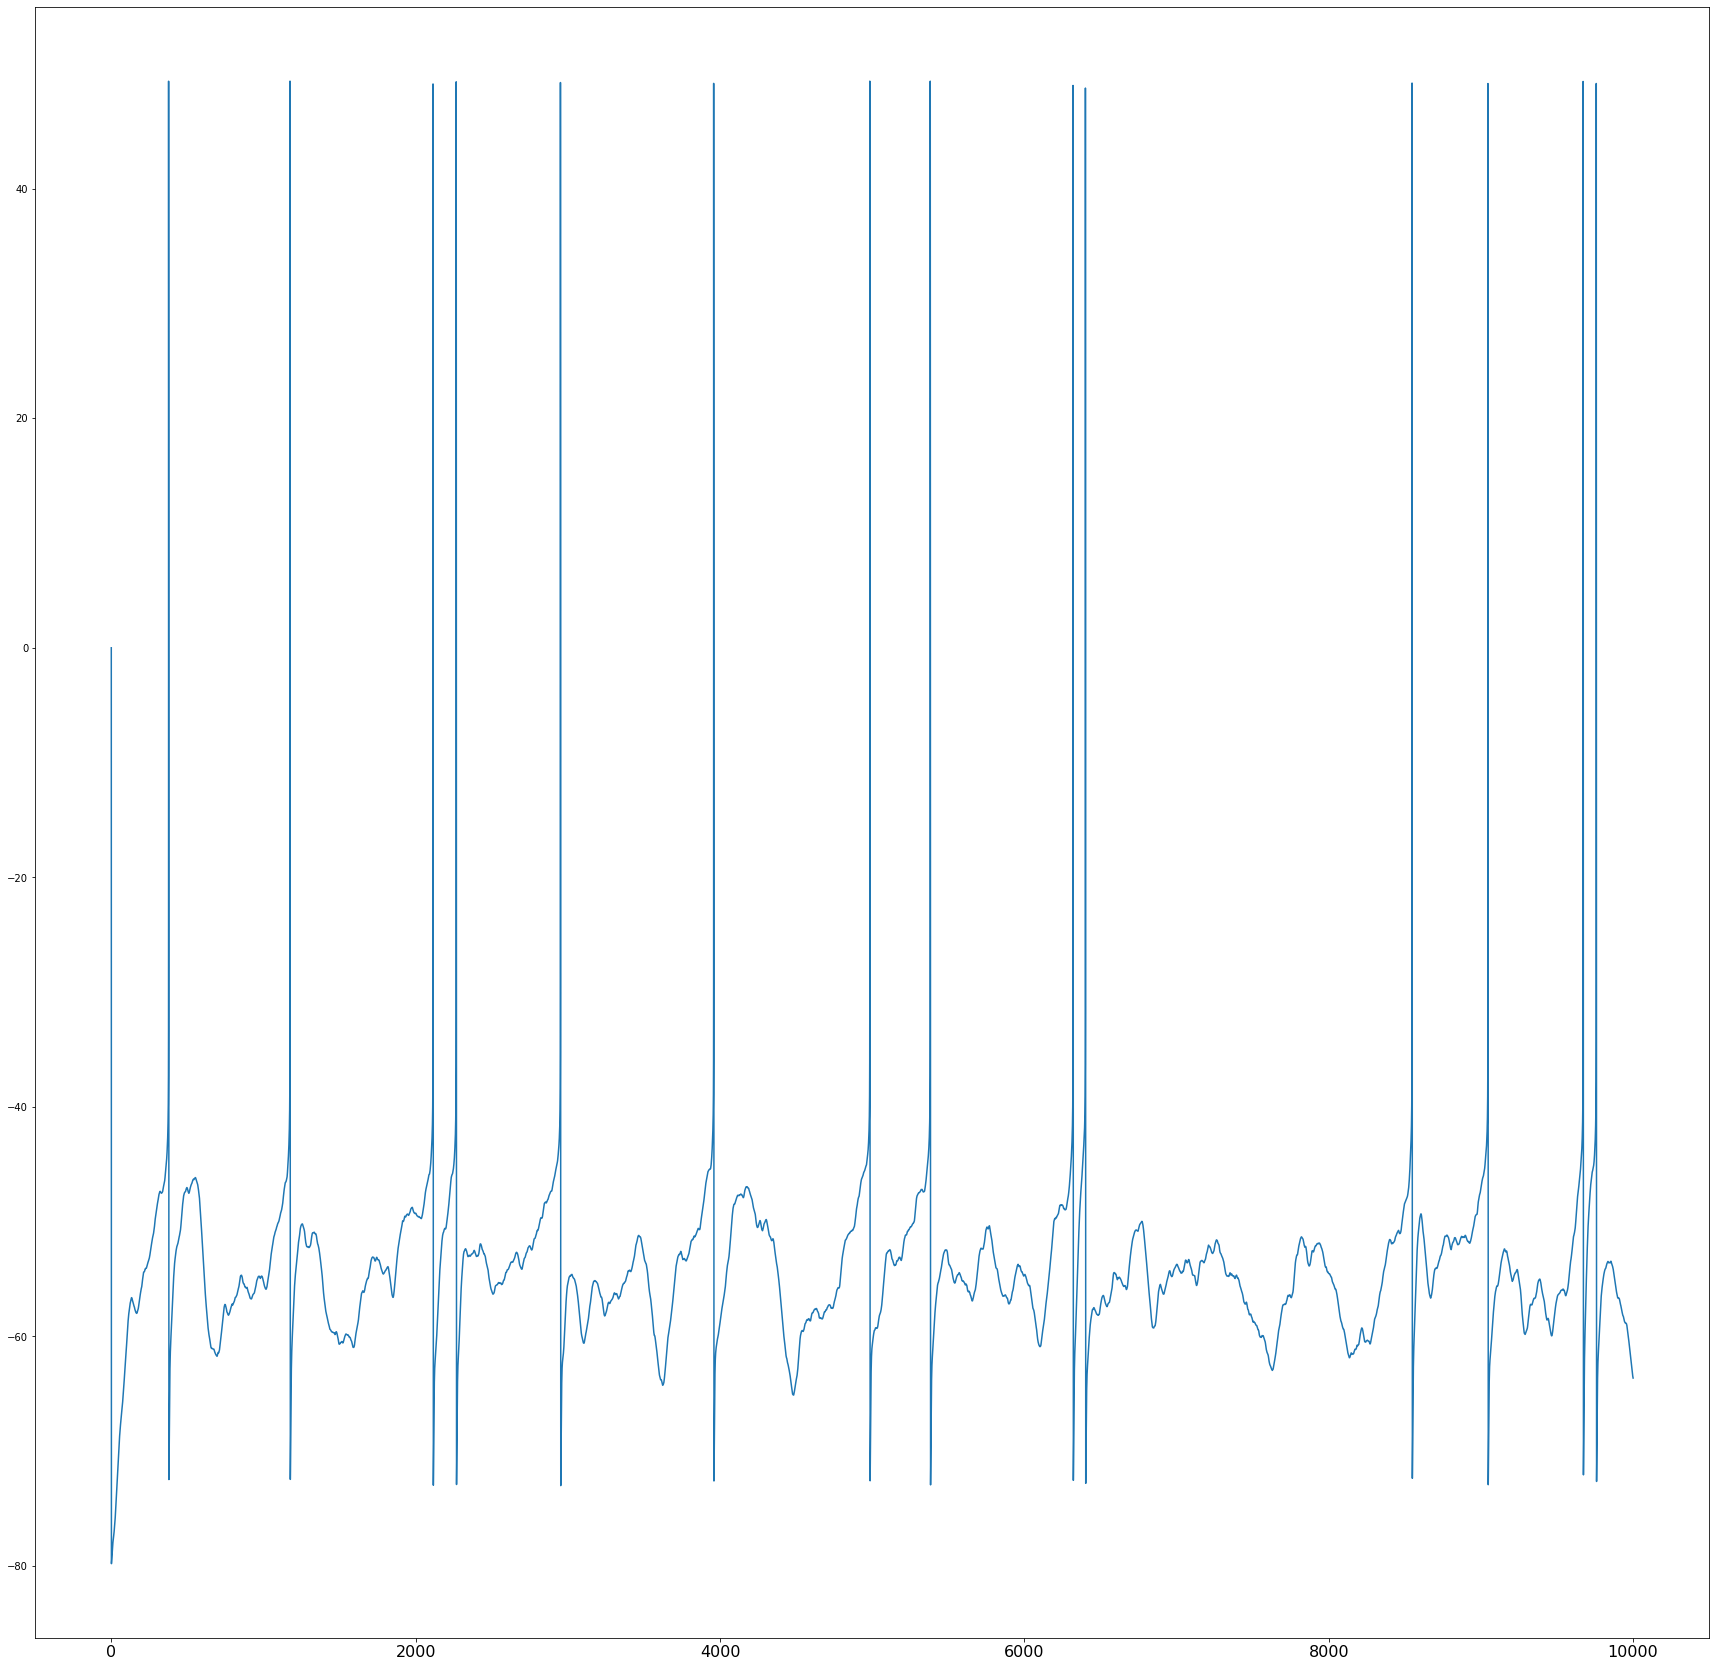

In [75]:
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol7[:,0])

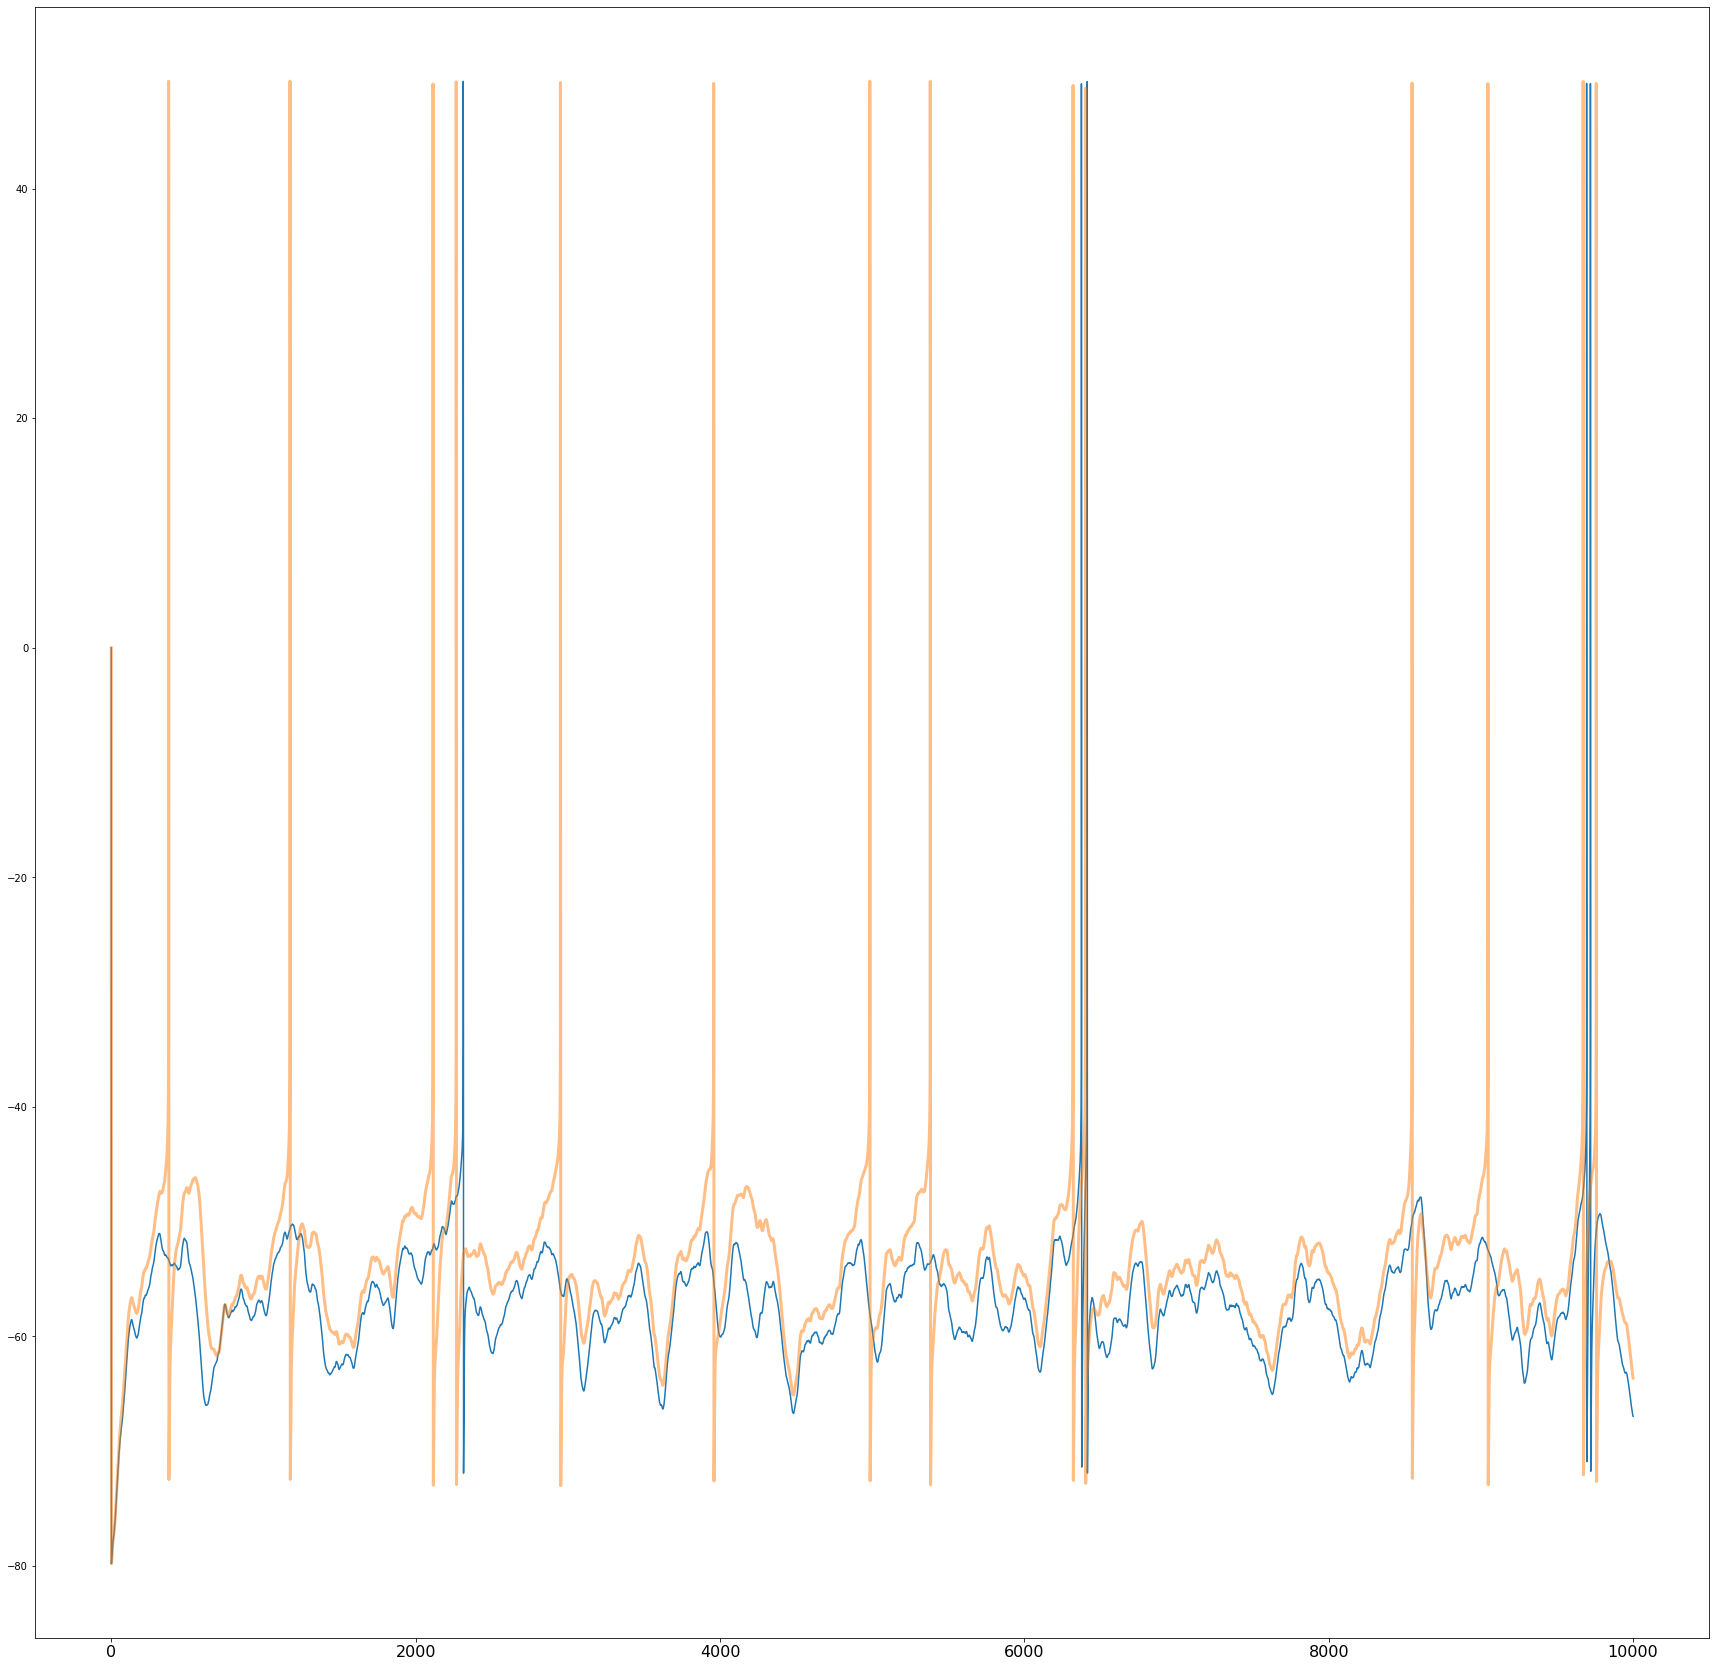

In [76]:
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol5[:,0])
#plt.plot(T, sol6[:,0],linewidth=7,alpha=0.4)
plt.plot(T, sol7[:,0],linewidth=3,alpha=0.5)

# Learned neuron

In [77]:
cell1=neuron(NumbaList(
            [1.3775031778678026,gKdvec[0],gHvec[0],gNavec[0],gAvec[0],2.8973004351343725,gKCavec[0],C,gleakvec[0],KdCavec[0],kcvec[0]]
        ),
             dyns_time_act,dyns_time_act,ob_type='Ca'
        )
cell1.set_input(NumbaList([-0.6,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)


def noisy_input_neuron(t,u):
    return cell1.equ_noise(t,u,noise[int(t*10)-1])
    
# get initial condition 
X0=cell1.init_cond(-0)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol8=odeint(noisy_input_neuron, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 33.26172876358032


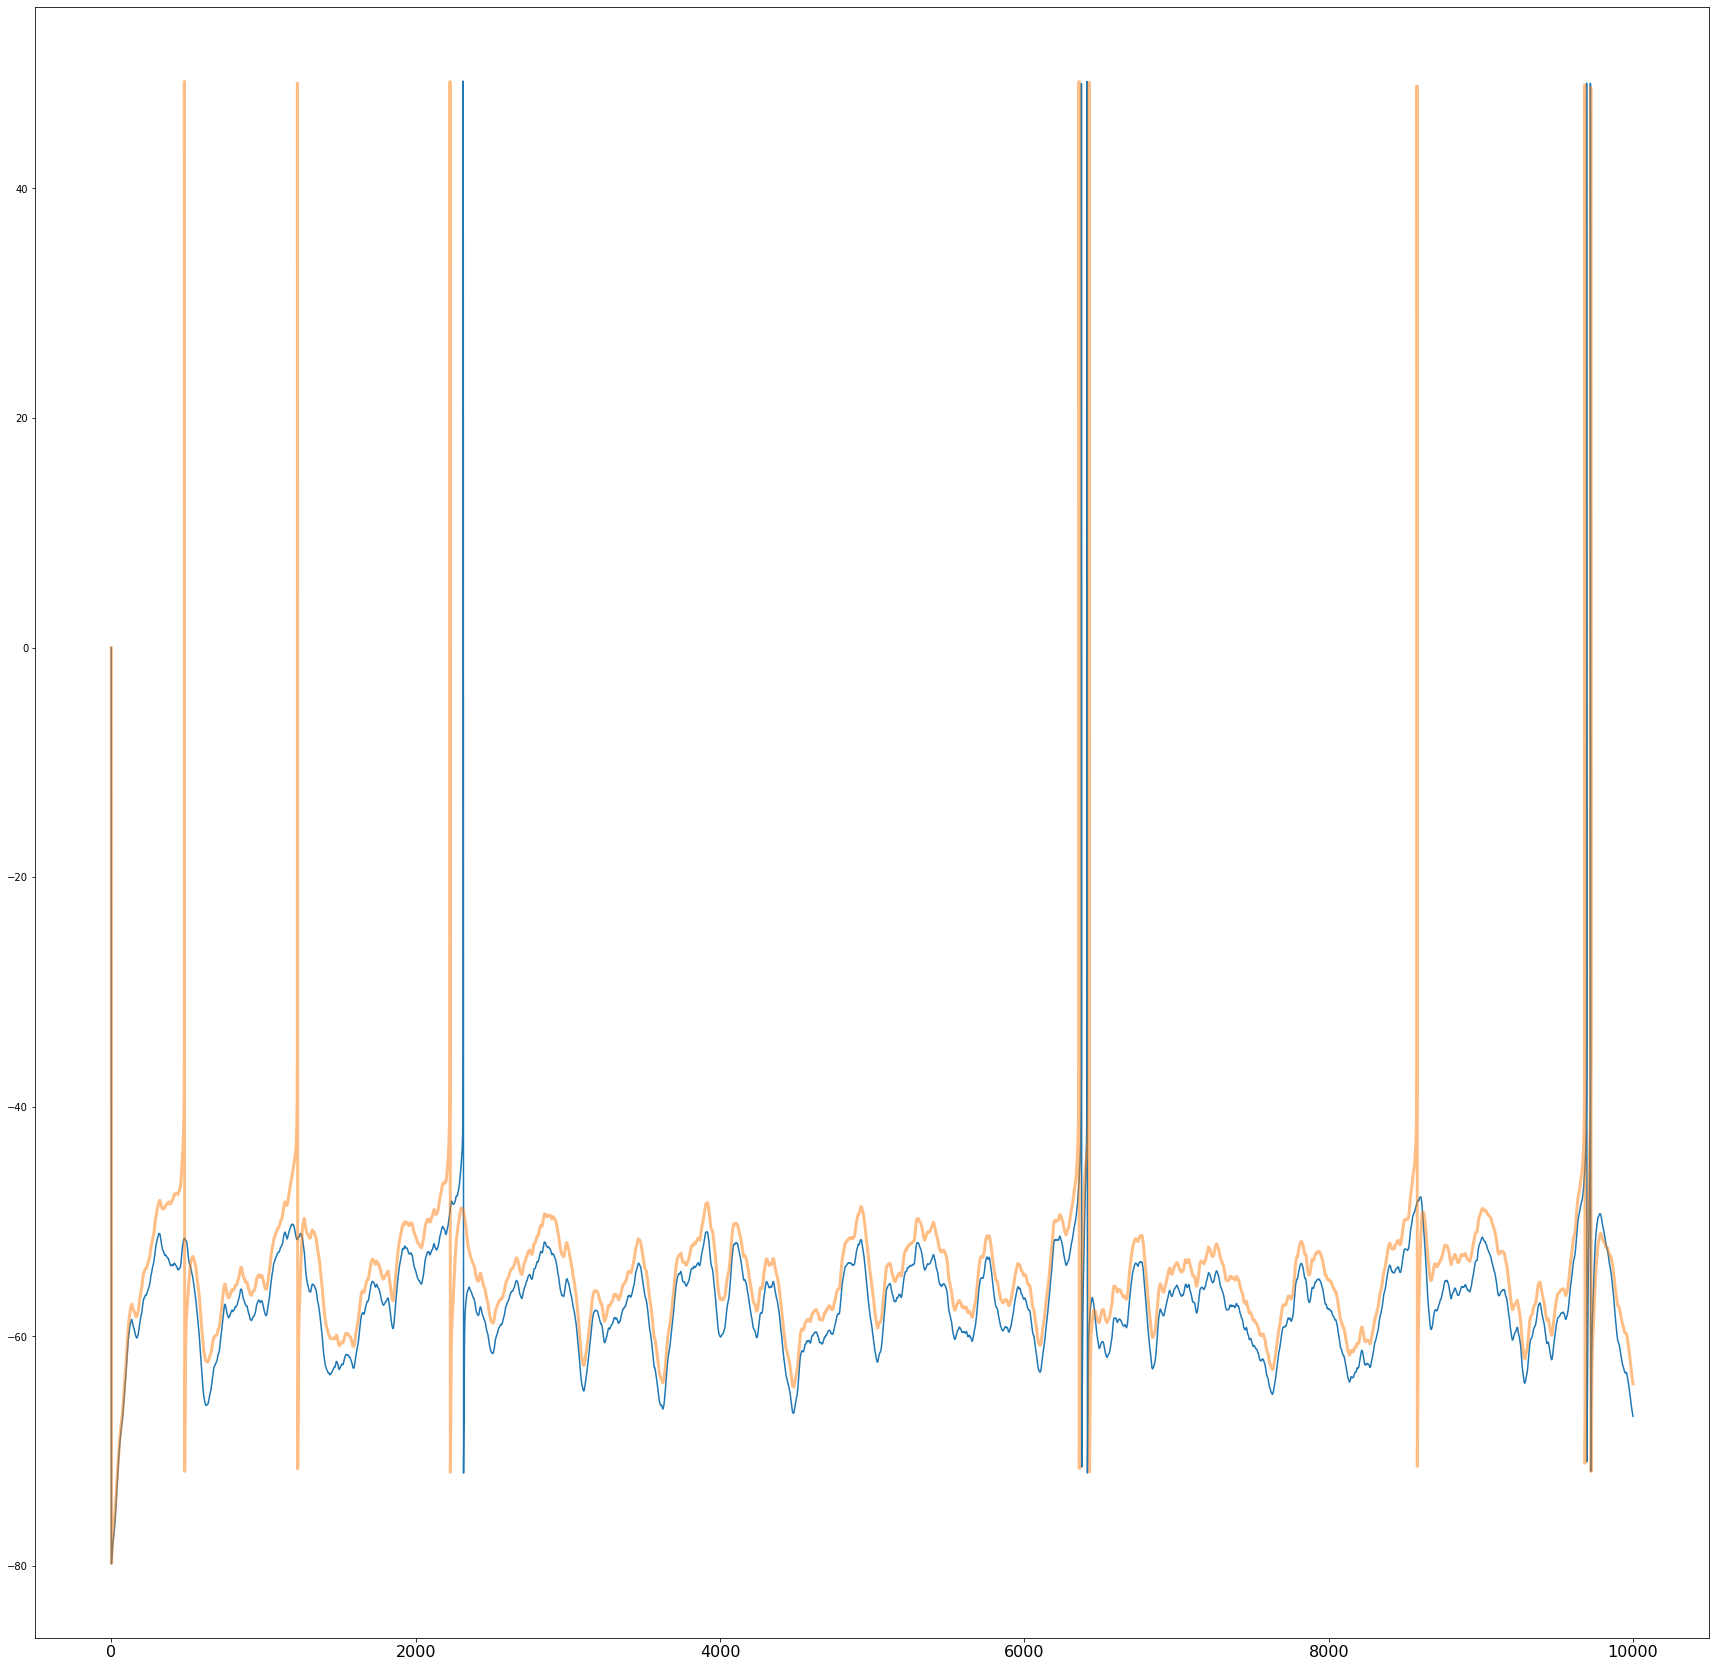

In [78]:
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol5[:,0])
#plt.plot(T, sol6[:,0],linewidth=7,alpha=0.4)
plt.plot(T, sol8[:,0],linewidth=3,alpha=0.5)

## Bursting neuron

In [79]:
# Model parameters (global)
VNa = 40
VK = -90
VCa = 120
VH = -40
Vleak = -50
VSyn = -75
taus = 10.
C = 0.1
taumean=30.

# Model parameters (mean)
Iapp = 0.
kc = 0.94
KdCa = 3.

gleak = 0.3

gNa = 120
gCaT= 0.5
gCaS = 4
gA = 0
gKd = 80
gKCa = 30
gH = 0
tmKCa = 3.93883

cell1=neuron(NumbaList(
            [gCaT,gKd,gH,gNa,gA,gCaS,gKCa,C,gleak,KdCa,kc]
        ),
             e_dyns,e_dyns,ob_type='Ca'
        )
cell1.set_input(NumbaList([2,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)
# get initial condition 
X0=cell1.init_cond(-60)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol9=odeint(cell1.equ, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 11.438819646835327


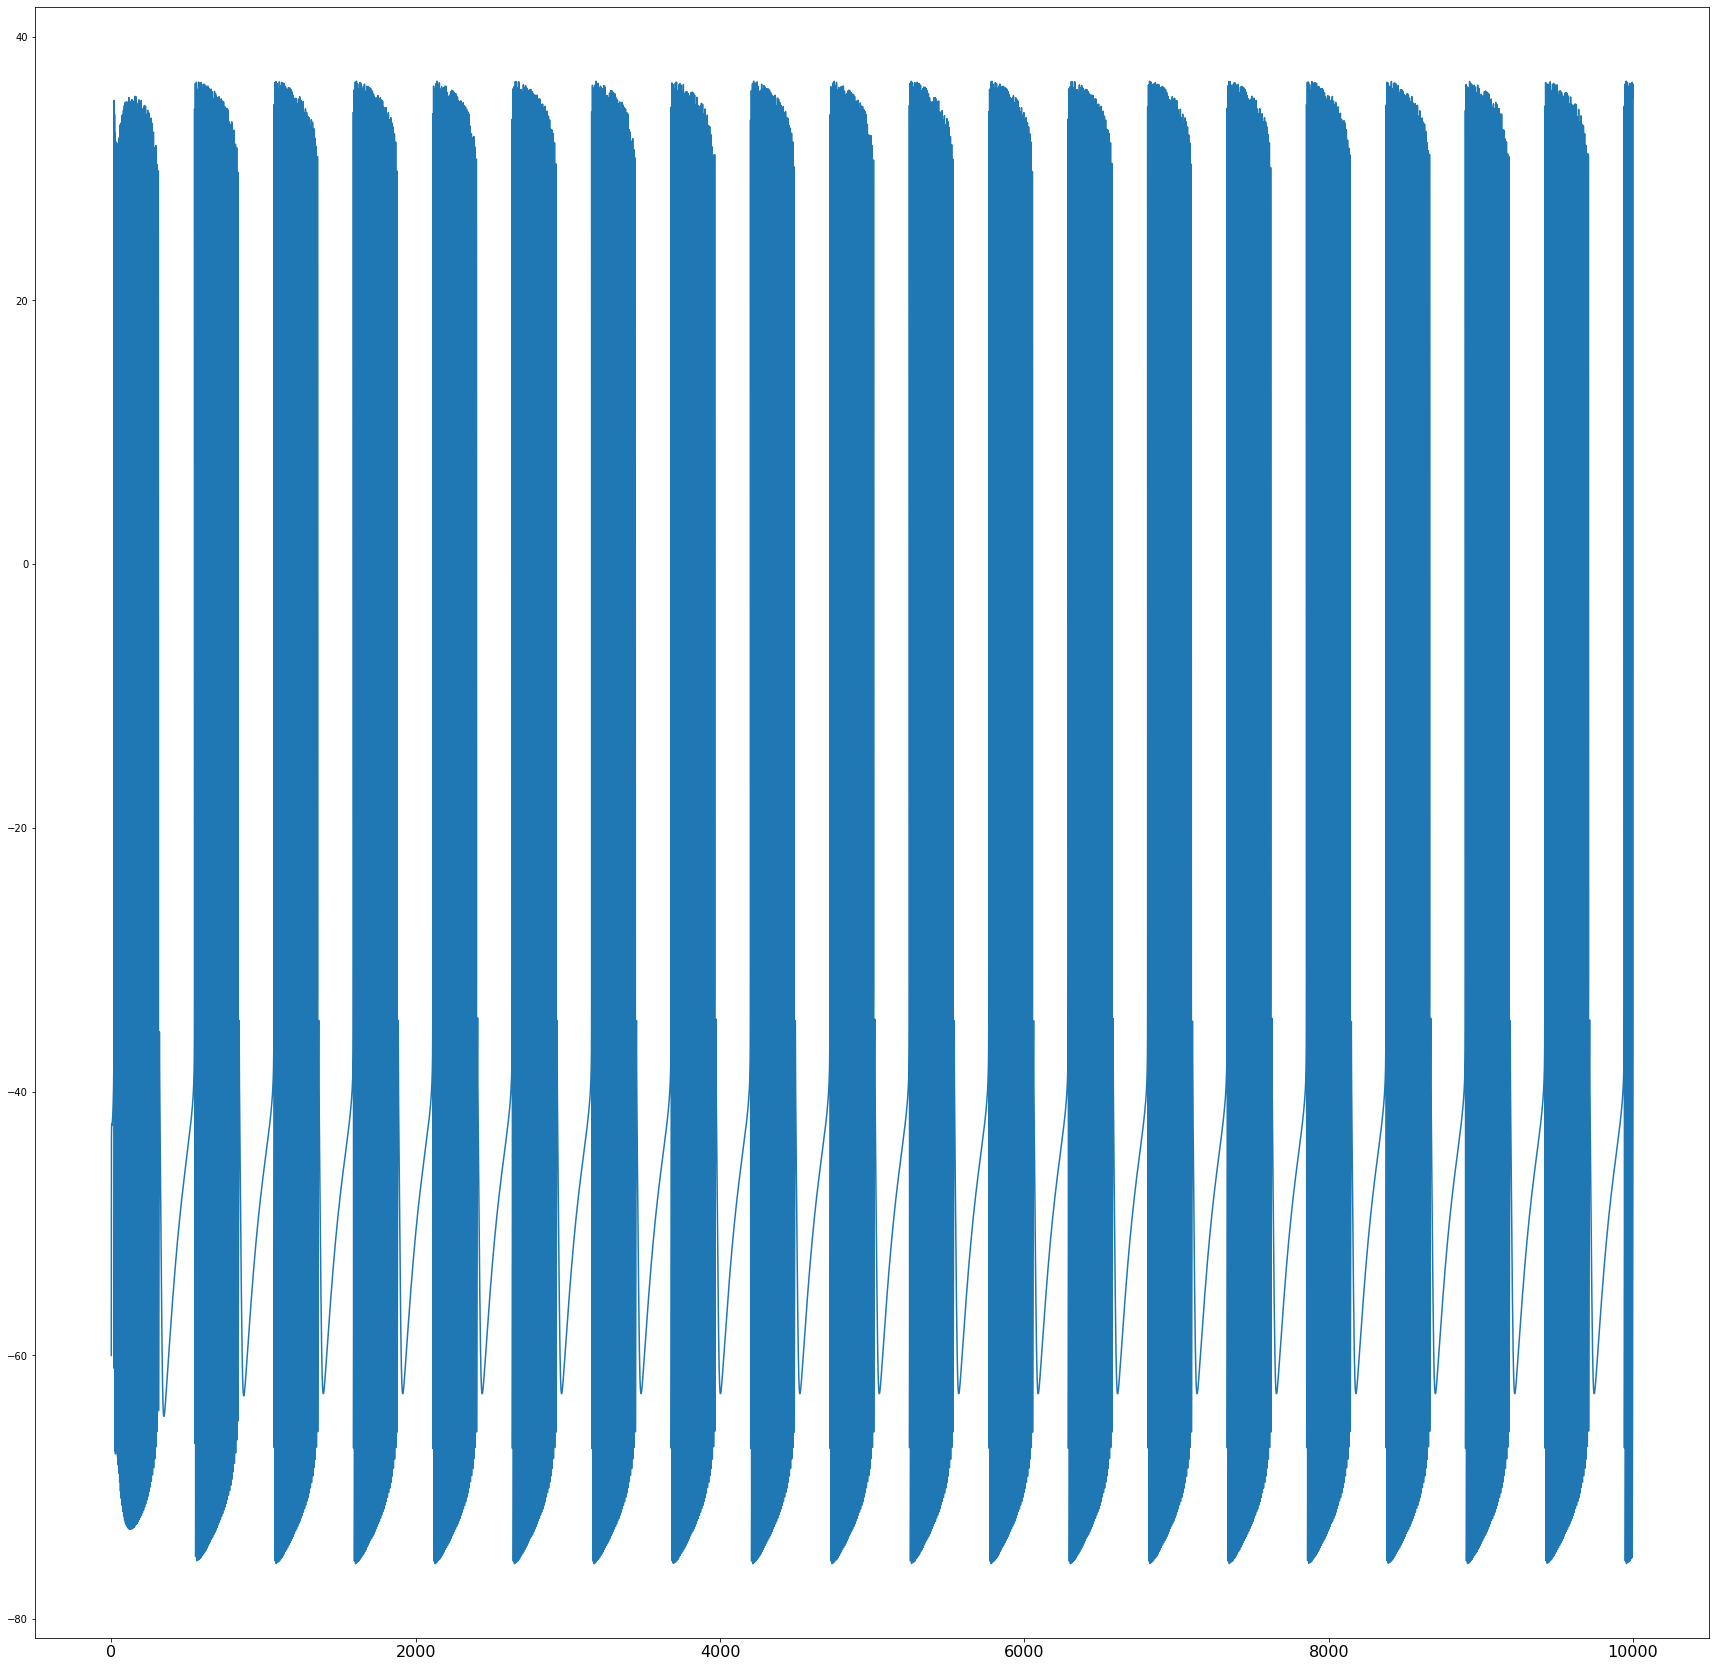

In [80]:
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol9[:,0])

In [81]:
cell1=neuron(NumbaList(
            [gCaT,gKd,gH,gNa,gA,gCaS,gKCa,C,gleak,KdCa,kc]
        ),
             dyns_time_act2,dyns_time_act2,ob_type='Ca'
        )
cell1.set_input(NumbaList([2,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)
# get initial condition 
X0=cell1.init_cond(-60)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol10=odeint(cell1.equ, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 16.00385570526123


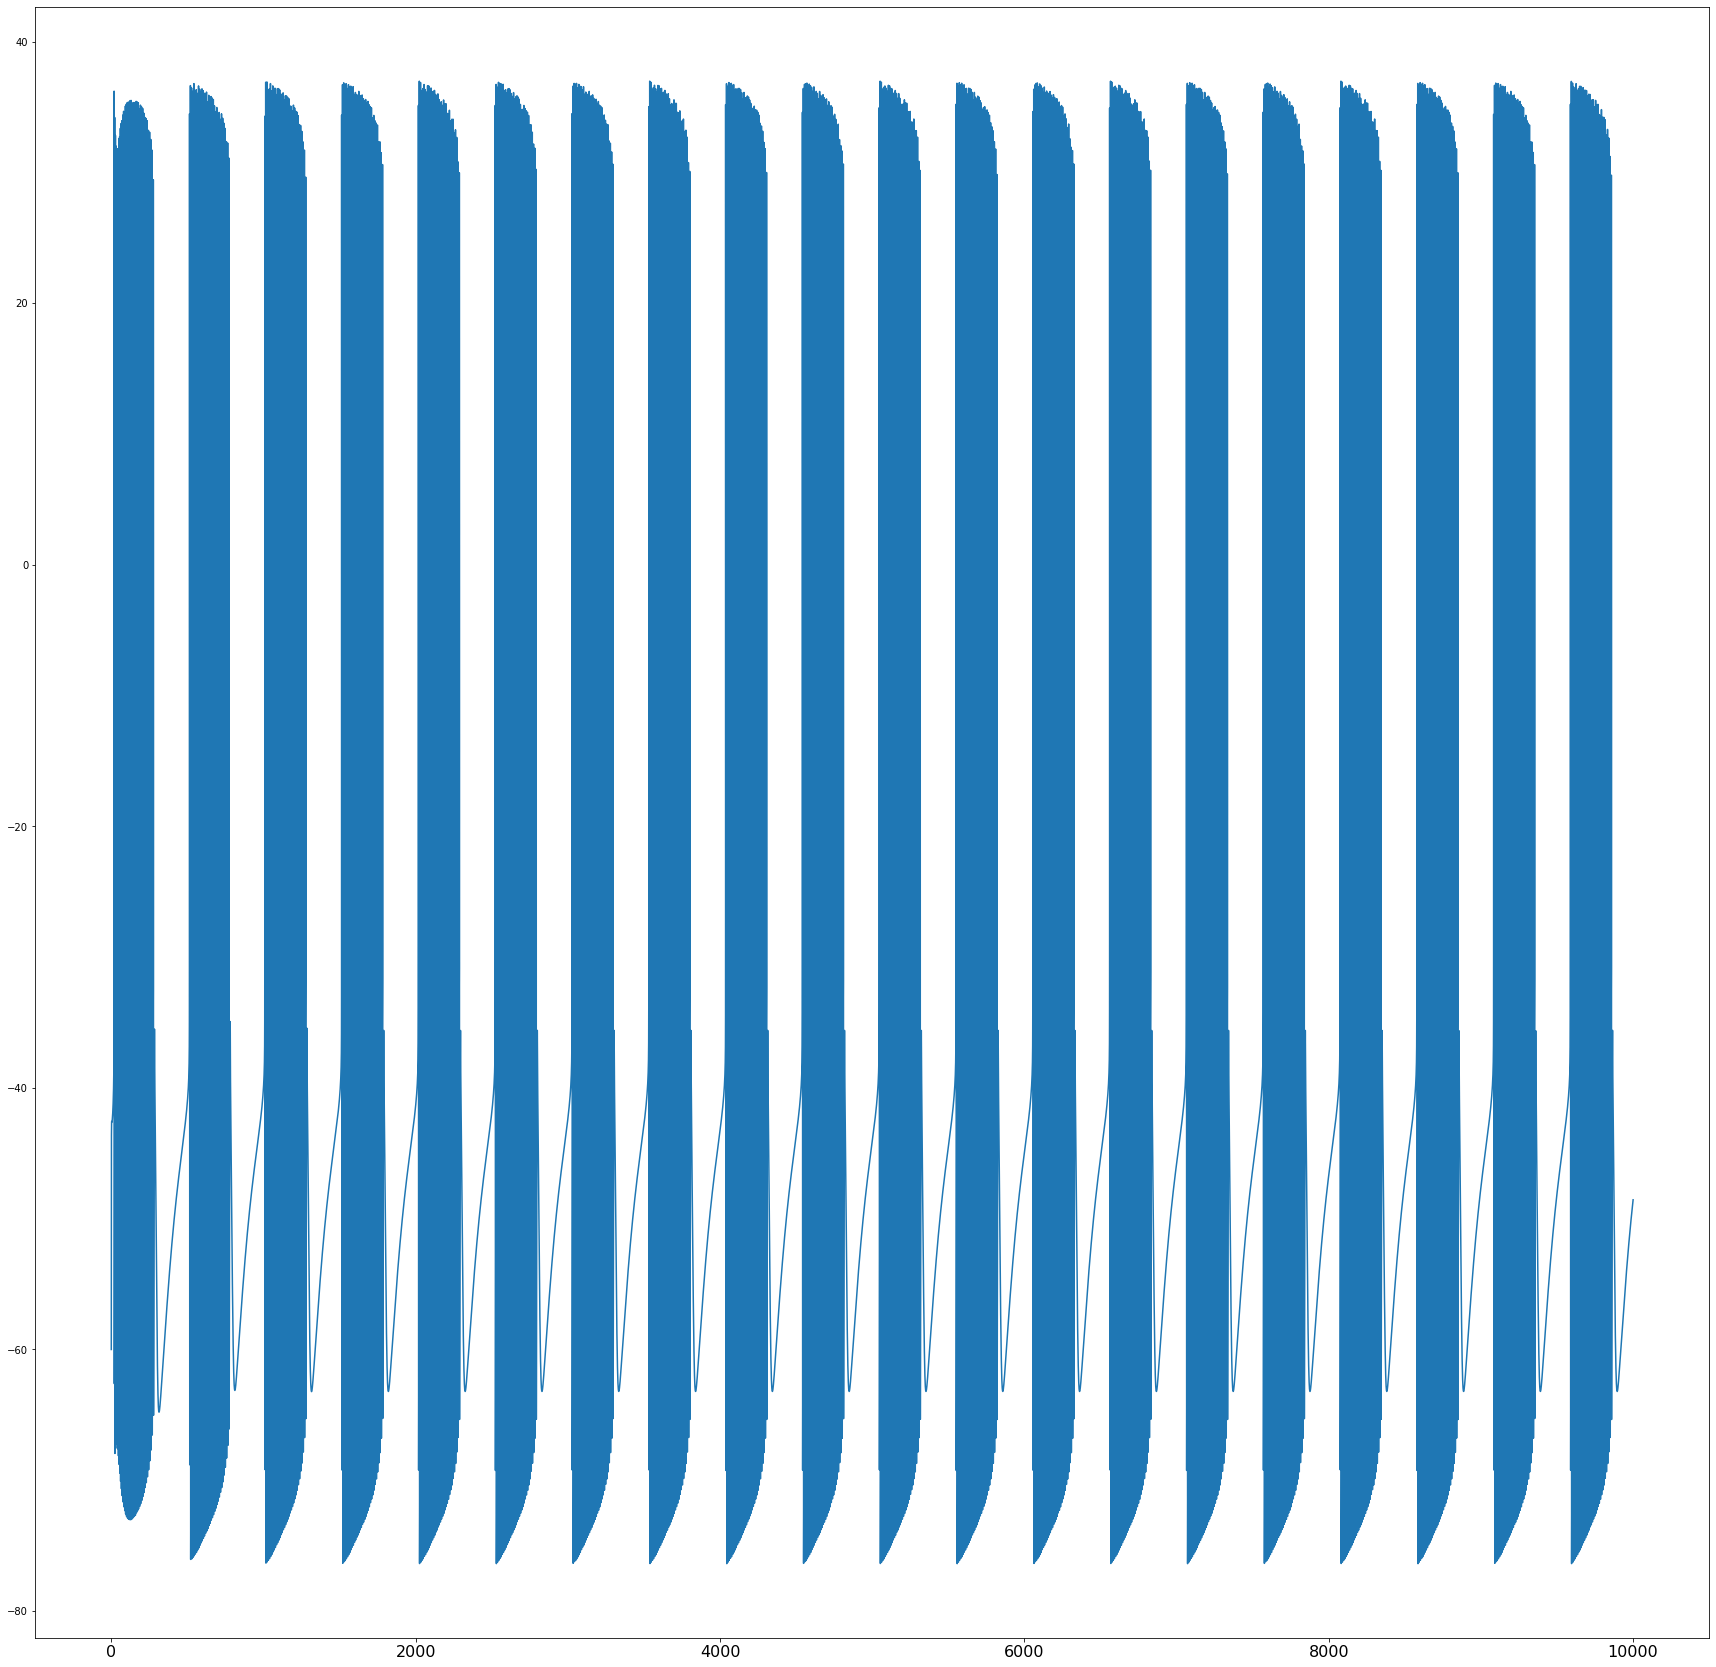

In [82]:
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol10[:,0])

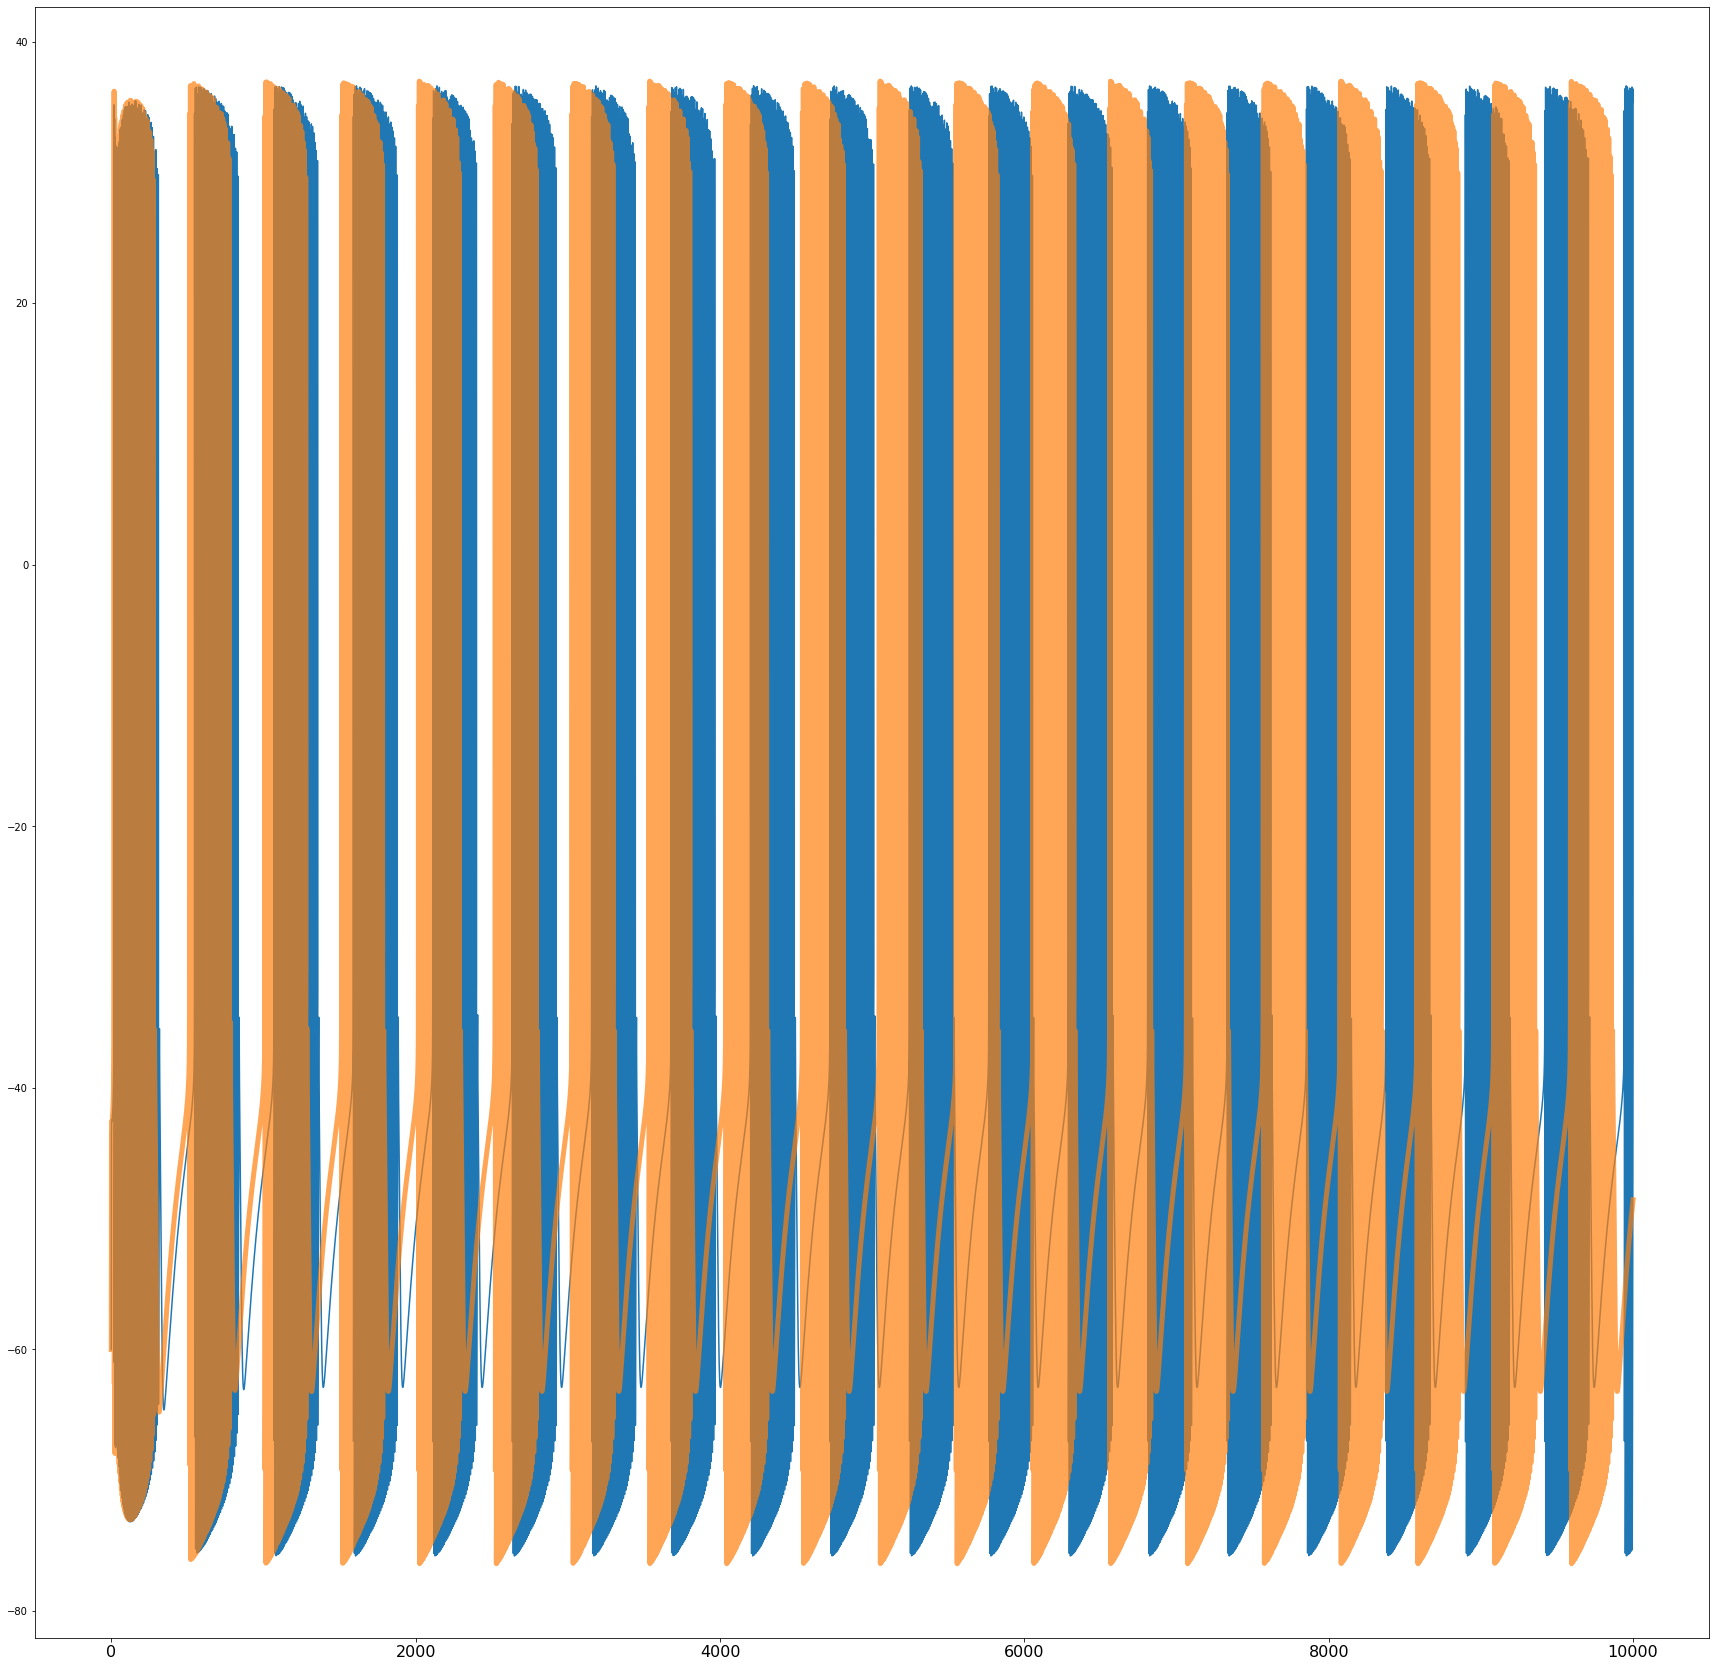

In [83]:
Tfinal=10000.0
T=np.linspace(0., Tfinal, 100000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol9[:,0])
plt.plot(T, sol10[:,0],linewidth=5,alpha=0.7)

0.1230366954638222


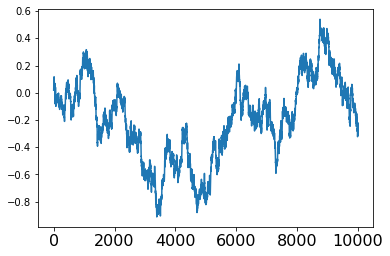

In [84]:
noise=(np.random.normal(size=200000))*10
noise[0]=0
for i in range(len(noise)-1):
    noise[i+1]=noise[i]+(noise[i+1]-noise[i])/1500
    
noise=(noise-noise.mean())*2
plt.plot(noise[0:10000])
print(noise.var())

In [85]:
cell1=neuron(NumbaList(
            [gCaT,gKd,gH,gNa,gA,gCaS,gKCa,C,gleak,KdCa,kc]
        ),
             e_dyns,e_dyns,ob_type='Ca'
        )
cell1.set_input(NumbaList([1.2,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)

def noisy_input_neuron(t,u):
    return cell1.equ_noise(t,u,noise[int(t*10)-1])
    
# get initial condition 
X0=cell1.init_cond(-0)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol11=odeint(noisy_input_neuron, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 115.33619594573975


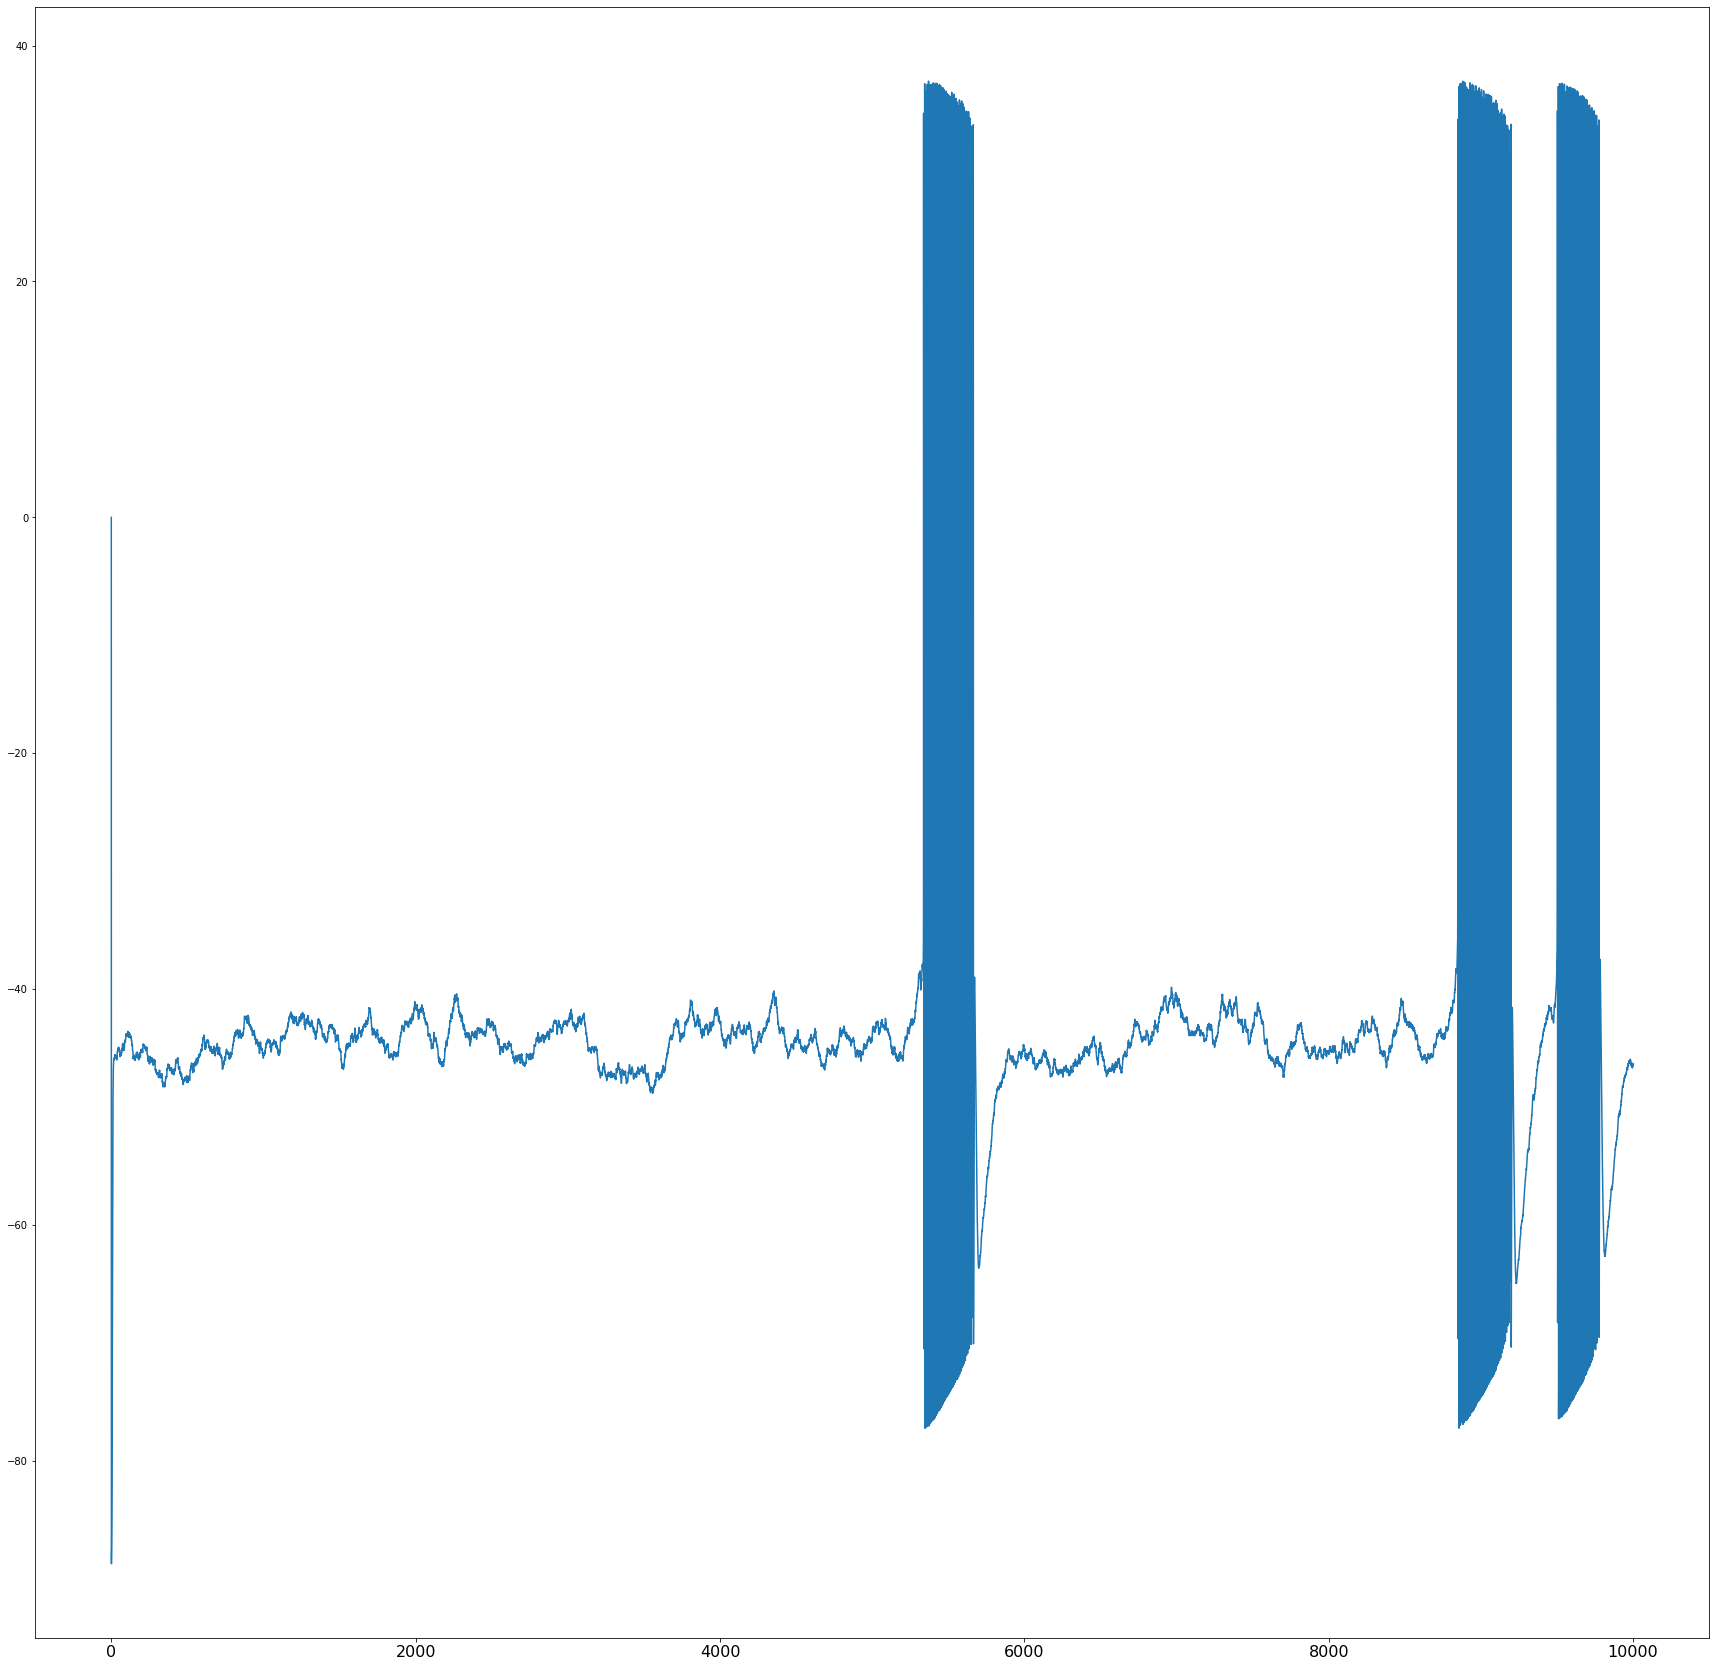

In [86]:
Tfinal=10000.0
T=np.linspace(0., Tfinal, 100000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol11[:,0])

In [87]:
cell1=neuron(NumbaList(
            [gCaT,gKd,gH,gNa,gA,gCaS,gKCa,C,gleak,KdCa,kc]
        ),
             dyns_time_act2,dyns_time_act2,ob_type='Ca'
        )
cell1.set_input(NumbaList([1.2,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)

def noisy_input_neuron(t,u):
    return cell1.equ_noise(t,u,noise[int(t*10)-1])
    
# get initial condition 
X0=cell1.init_cond(-0)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol12=odeint(noisy_input_neuron, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 85.86398696899414


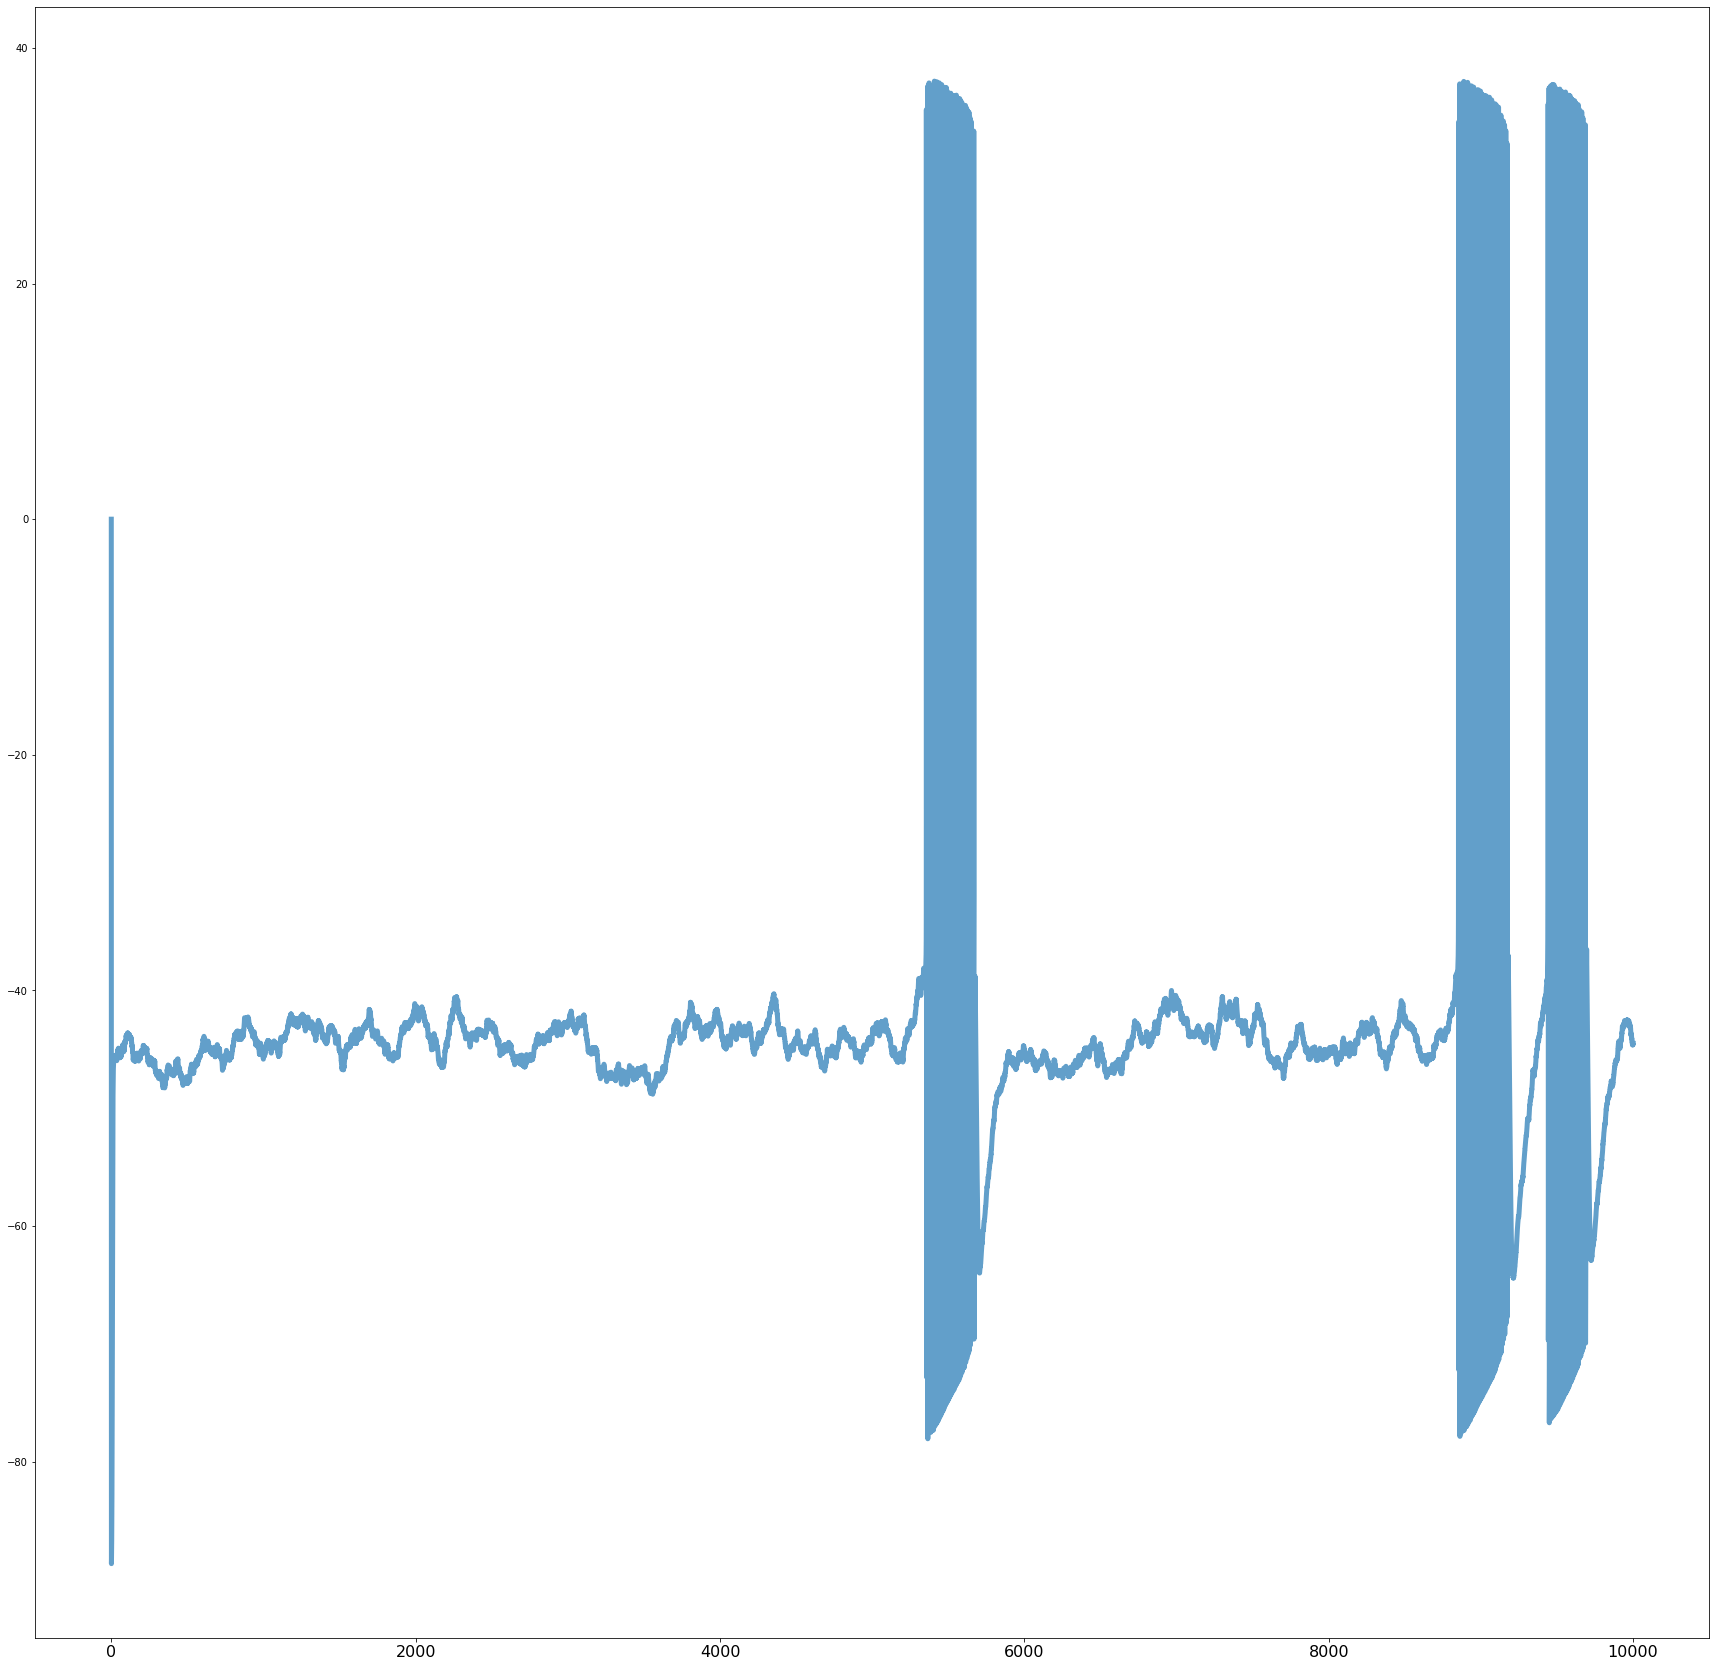

In [88]:
Tfinal=10000.0
T=np.linspace(0., Tfinal, 100000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol12[:,0],linewidth=5,alpha=0.7)

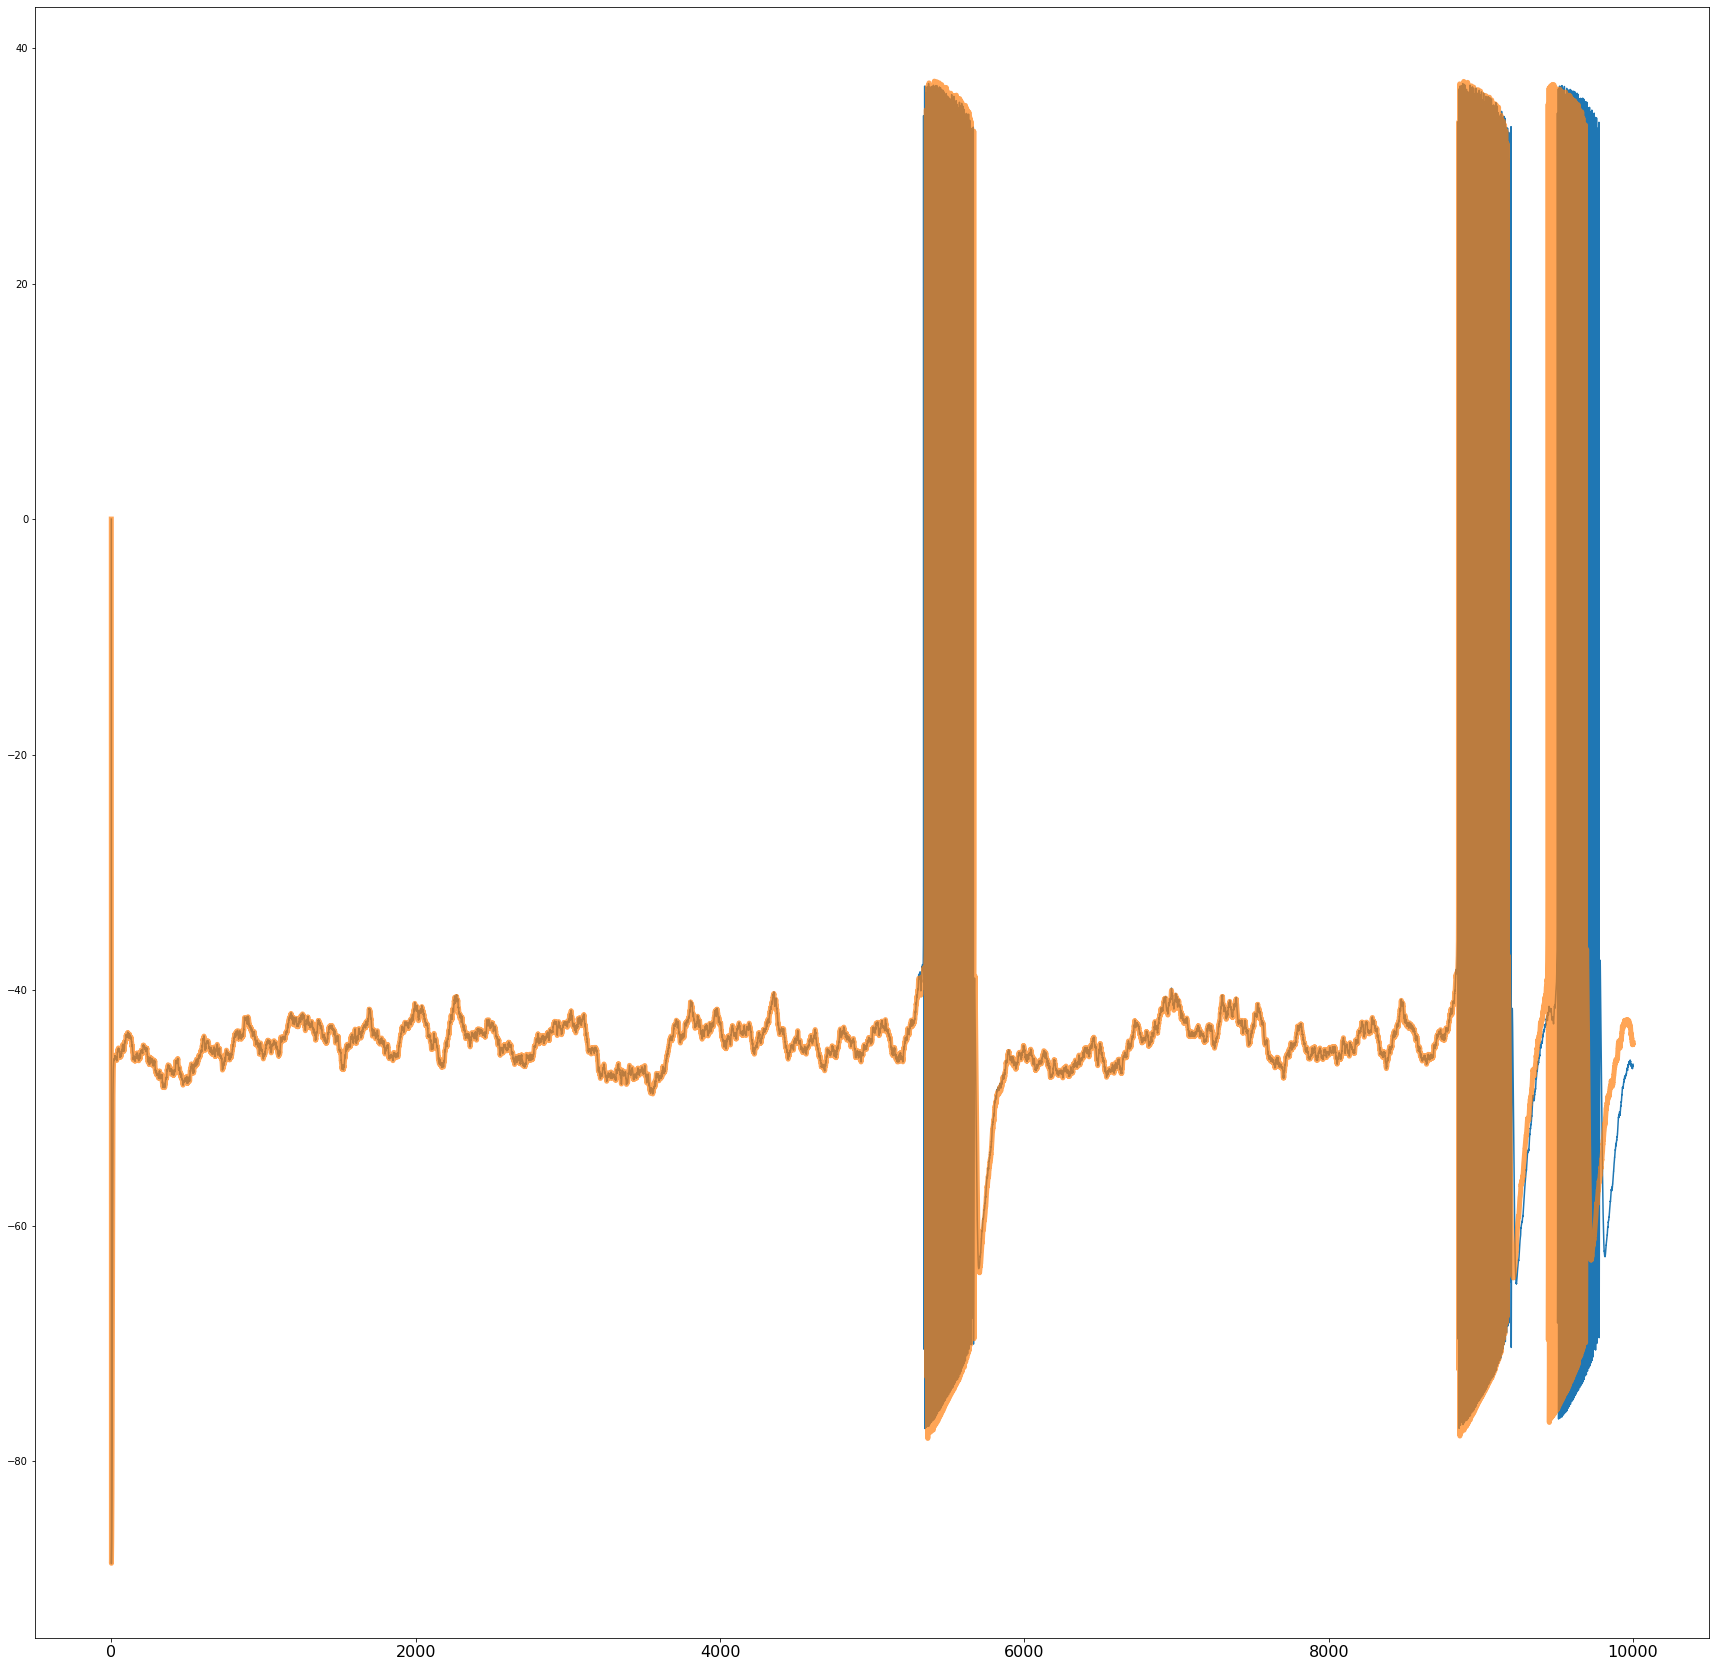

In [89]:
Tfinal=10000.0
T=np.linspace(0., Tfinal, 100000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol11[:,0])
plt.plot(T, sol12[:,0],linewidth=5,alpha=0.7)

## Learned bursting neuron

In [90]:
cell1=neuron(NumbaList(
            [gCaT,gKd,gH,gNa,gA,gCaS,gKCa,C,gleak,KdCa,kc]
        ),
             e_dyns,dyns_time_act2,ob_type='Ca'
        )
cell1.set_input(NumbaList([2,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)
gamma=10.
alpha=0.001
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.]) # no synape connections so only 8 parameters
cell1.set_hyp(gamma,alpha,variable_mask1)
# get initial condition 
X0=cell1.init_cond_OB(-60)
# set simulation time
Tfinal=20000.0
tspan=[0.0,Tfinal]
# start simulation and the timer 
start = time.time()
sol13=solve_ivp(cell1.OB_ODE_Ca_equ,tspan , X0)#use Ca observer
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
[120.           0.          60.15935995   0.          80.
   0.3         30.          16.01169637]
[-94.17957265]
Elapsed (with compilation) = 121.30333685874939


In [91]:
print('Estimated value')
print(np.mean(sol13.y[cell1.pos_dinamics+2][-1000:]))
print(np.mean(sol13.y[cell1.pos_dinamics+7][-1000:]))
print('Exact value')
print(gCaTvec[0])
print(gCaSvec[0])

Estimated value
0.6176916238951633
3.948365494428126
Exact value
0.992884
3.51903


In [92]:
cell1=neuron(NumbaList(
            [0.6259935539069674,gKd,gH,gNa,gA,3.9235458165254604,gKCa,C,gleak,KdCa,kc]
        ),
             dyns_time_act2,dyns_time_act2,ob_type='Ca'
        )
cell1.set_input(NumbaList([1.2,0,0,0,0,0,0,2,0,100]),0.000)
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)

def noisy_input_neuron(t,u):
    return cell1.equ_noise(t,u,noise[int(t*10)-1])
    
# get initial condition 
X0=cell1.init_cond(-0)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol13_=odeint(noisy_input_neuron, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
Ca
Elapsed (with compilation) = 57.87137413024902


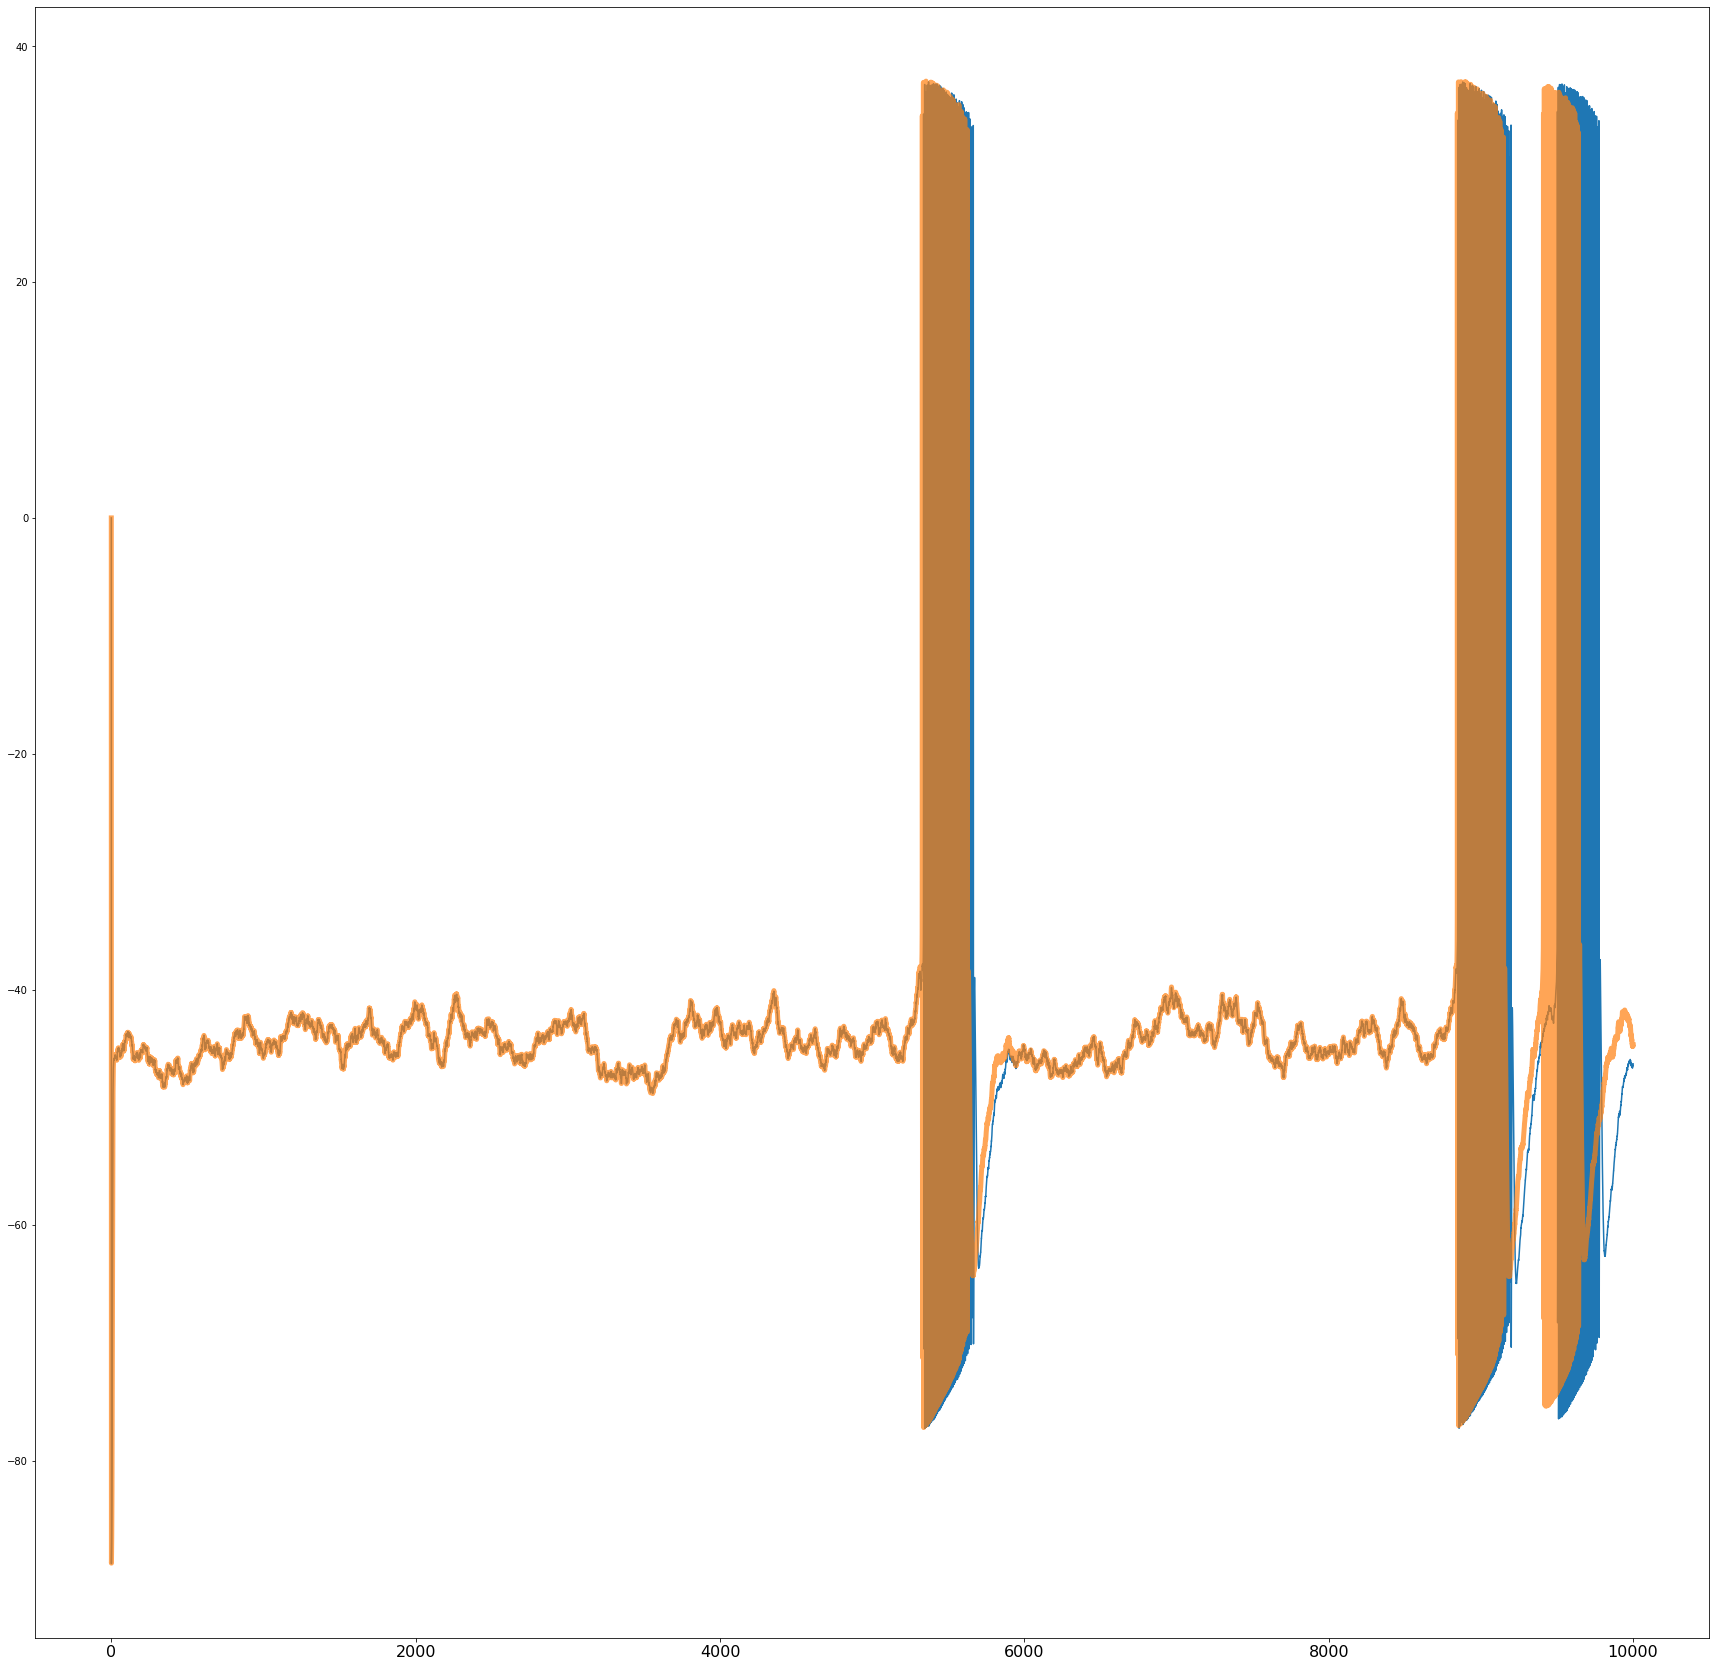

In [93]:
Tfinal=10000.0
T=np.linspace(0., Tfinal, 100000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol11[:,0])
plt.plot(T, sol13_[:,0],linewidth=5,alpha=0.7)

## HCO

In [94]:
VNa = 50
VK = -80
VCa = 80
VH = -20
Vleak = -50
VSyn = -75
taus = 10.
C = 1.

gleak = 0.01
gNa = 600.
gCaT_gastr = 3.
gCaS_gastr = 8.
gA_gastr = 50.
gKd = 90.
gKCa_gastr = 60.
gH = 0.1
Iapp = 0
kc = 0.94
KdCa = 3.
tmKCa = 2.

In [95]:

cells=[]
Ivec=[0,0]

for i in range(2):
        cells.append(neuron(NumbaList(
            [gCaT_gastr,gKd,gH,gNa,gA_gastr,gCaS_gastr,gKCa_gastr,C,gleak,KdCa,kc]
        ),
             e_dyns,e_dyns,ob_type='V'
        ))# initialised cells in the STG network
        cells[i].set_input(NumbaList([Ivec[i],0,0,0,0,0,0,2,0,0]))
        cells[i].set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
        cells[i].set_tau(tmKCavec[i],1.,10.)
        
# defined network topology (two types of connections, each defined by a matrix)
net1=network(cells,[[0,0.2],[0.2,0]],[[0.,0.],[0.,0.]])
# get initial condition 
X0=inti_cond_net_sys(net1)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol15=odeint(net1.sys_equ, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
num_Theta 8
num_Theta 9
num_Theta 8
num_Theta 9
Elapsed (with compilation) = 83.4034173488617


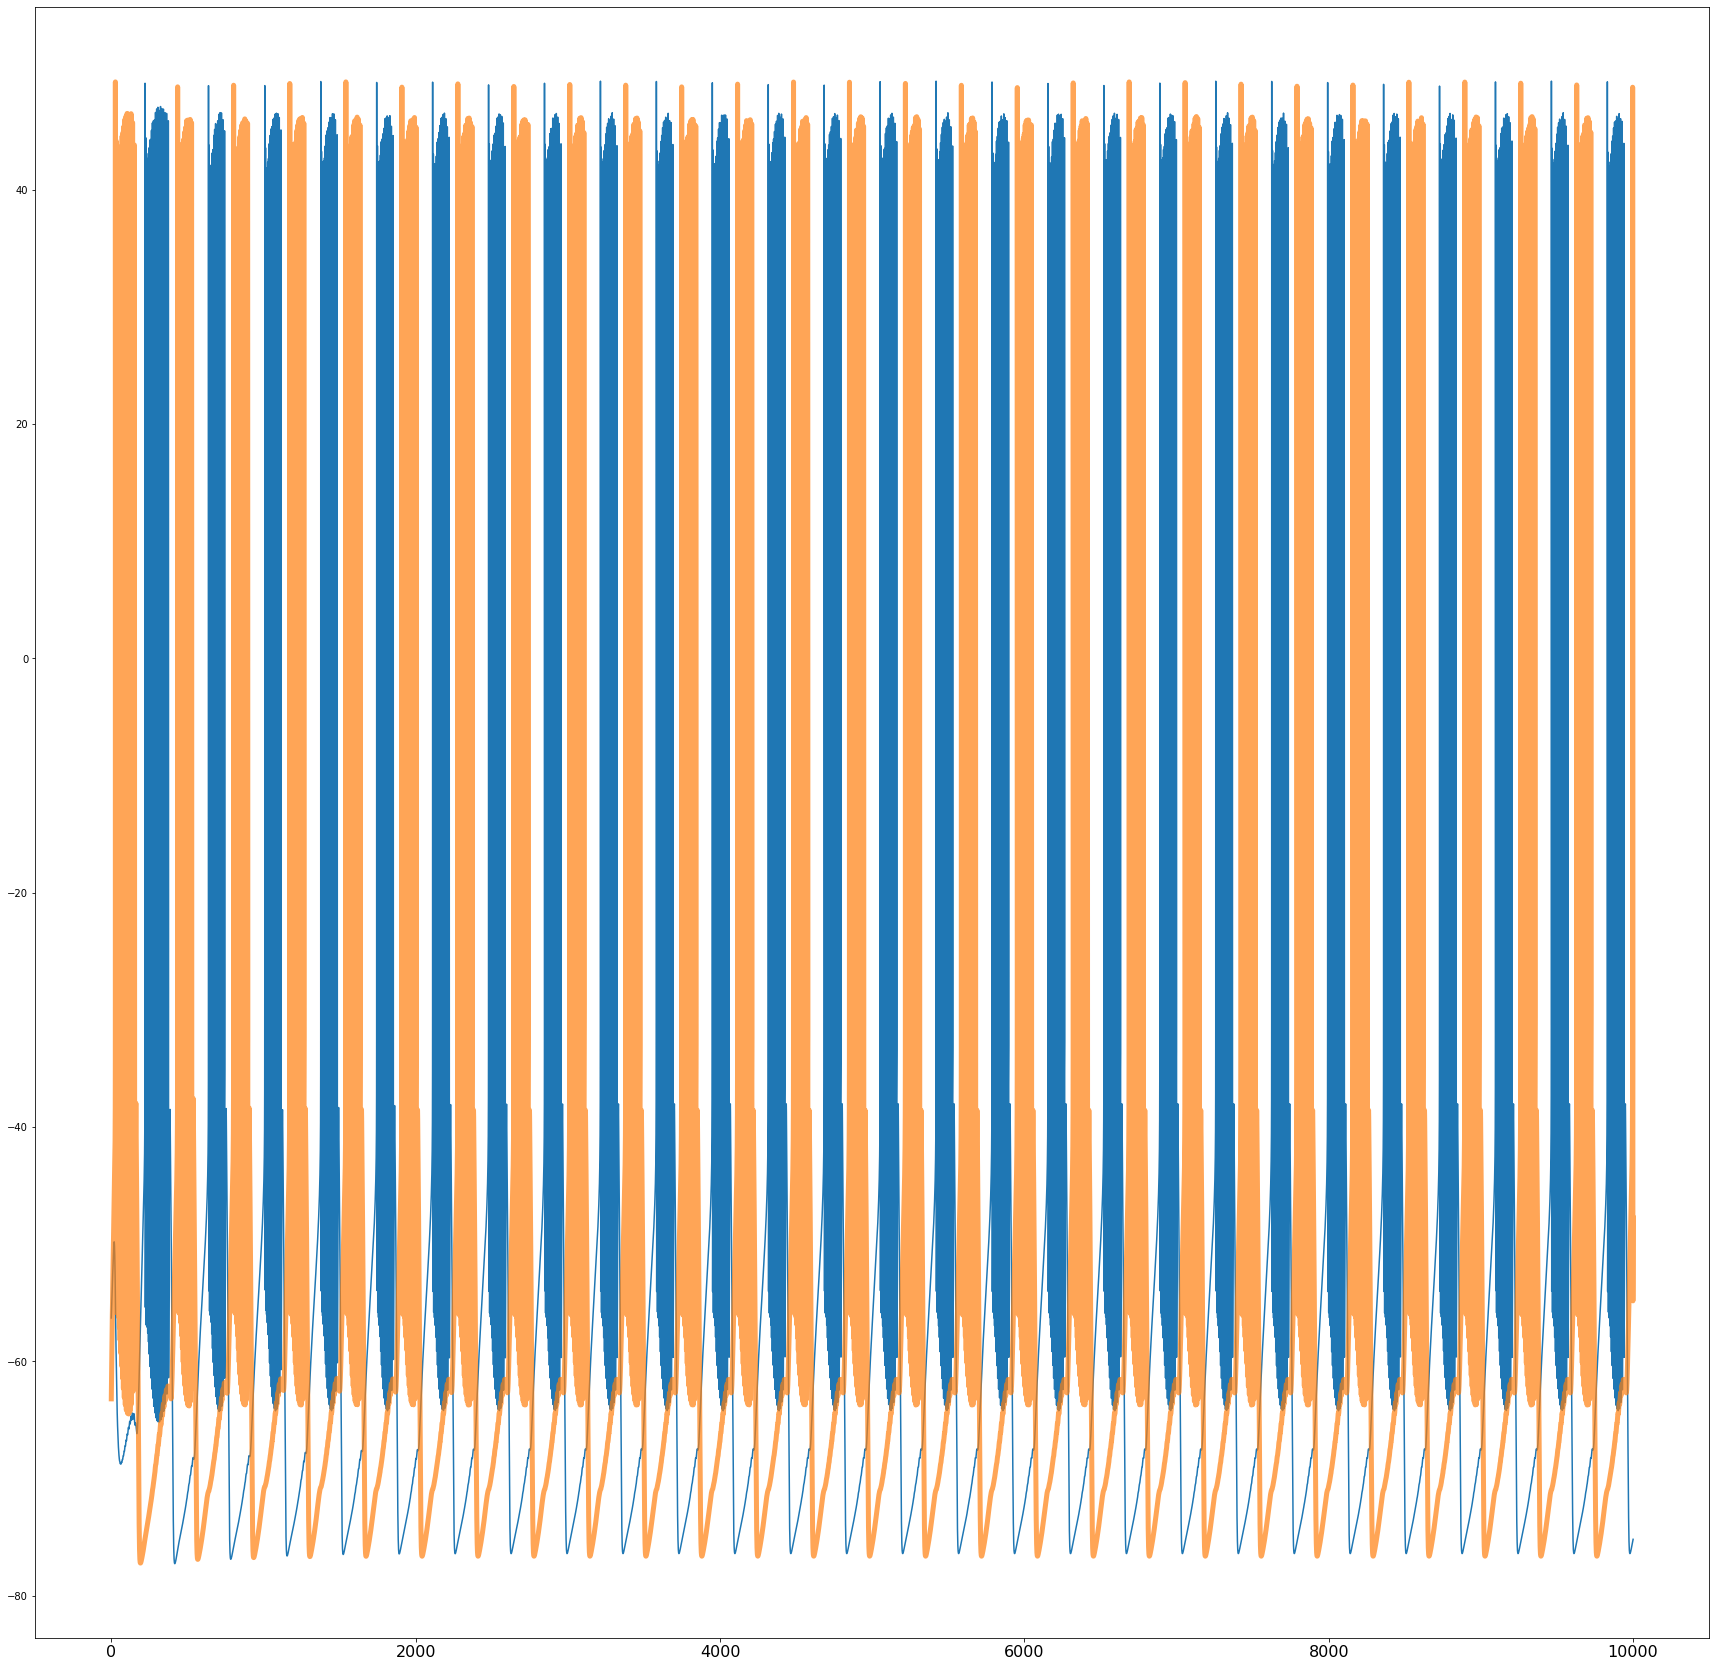

In [96]:
Tfinal=10000.0
T=np.linspace(0., Tfinal, 100000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol15[:,0])
plt.plot(T, sol15[:,16],linewidth=5,alpha=0.7)

In [97]:
cells=[]
for i in range(2):
        cells.append(neuron(NumbaList(
            [gCaT_gastr,gKd,gH,gNa,gA_gastr,gCaS_gastr,gKCa_gastr,C,gleak,KdCa,kc]
        ),
             dyns_time_act,dyns_time_act,ob_type='V'
        ))# initialised cells in the STG network
        cells[i].set_input(NumbaList([Ivec[i],0,0,0,0,0,0,2,0,0]))
        cells[i].set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
        cells[i].set_tau(tmKCavec[i],1.,10.)
        
# defined network topology (two types of connections, each defined by a matrix)
net1=network(cells,[[0,0.2],[0.2,0]],[[0.,0.],[0.,0.]])
# get initial condition 
X0=inti_cond_net_sys(net1)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol16=odeint(net1.sys_equ, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
num_Theta 8
num_Theta 9
num_Theta 8
num_Theta 9
Elapsed (with compilation) = 75.33931946754456


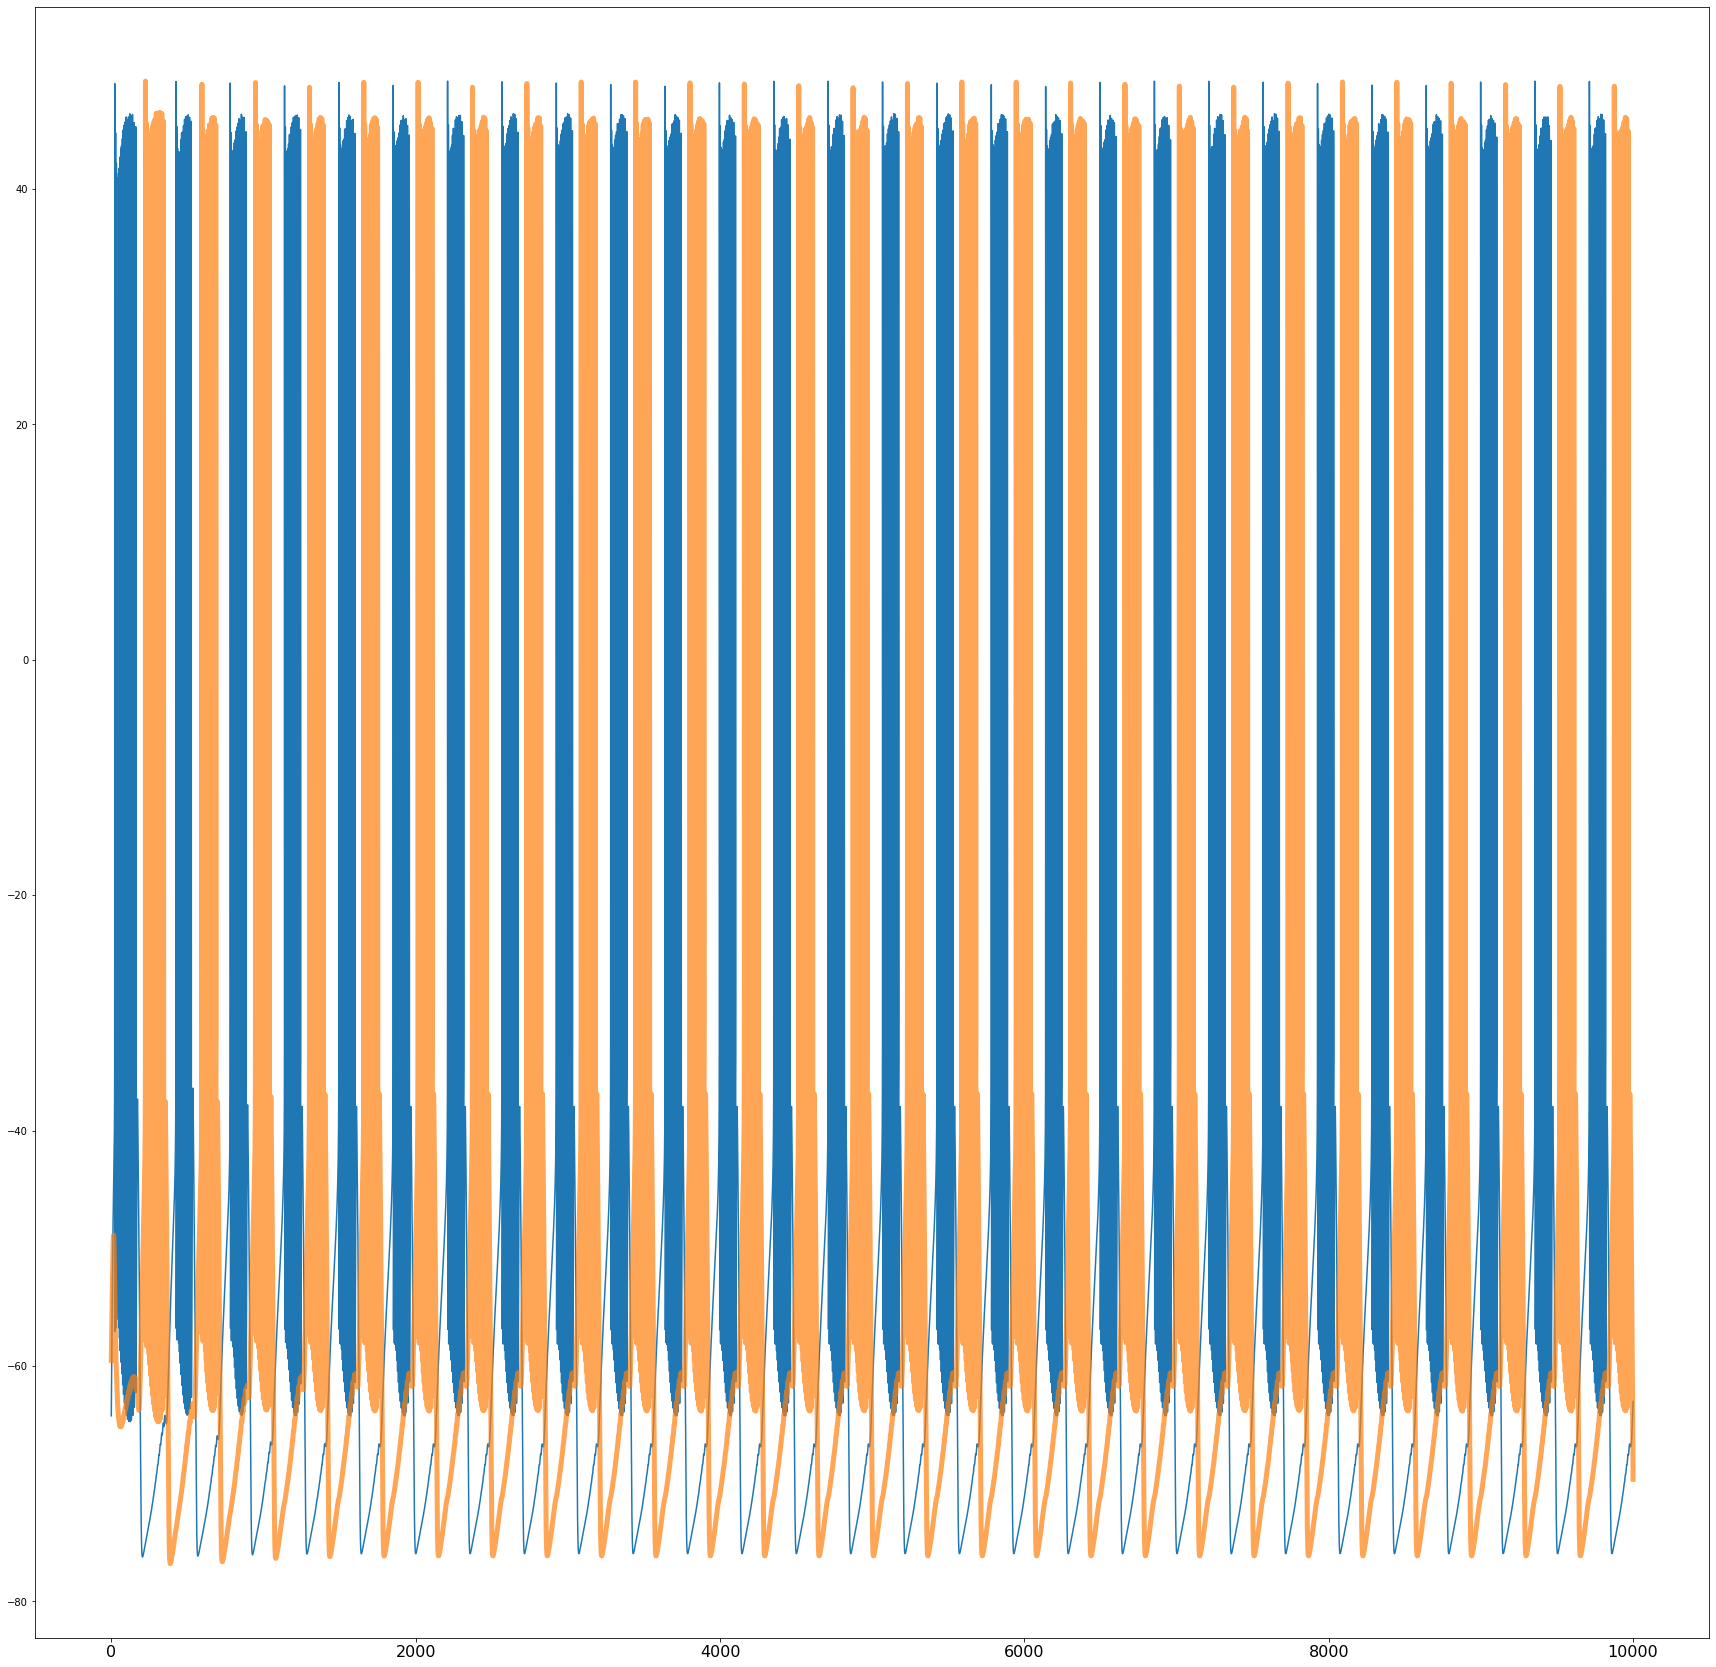

In [98]:
Tfinal=10000.0
T=np.linspace(0., Tfinal, 100000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol16[:,0])
plt.plot(T, sol16[:,16],linewidth=5,alpha=0.7)

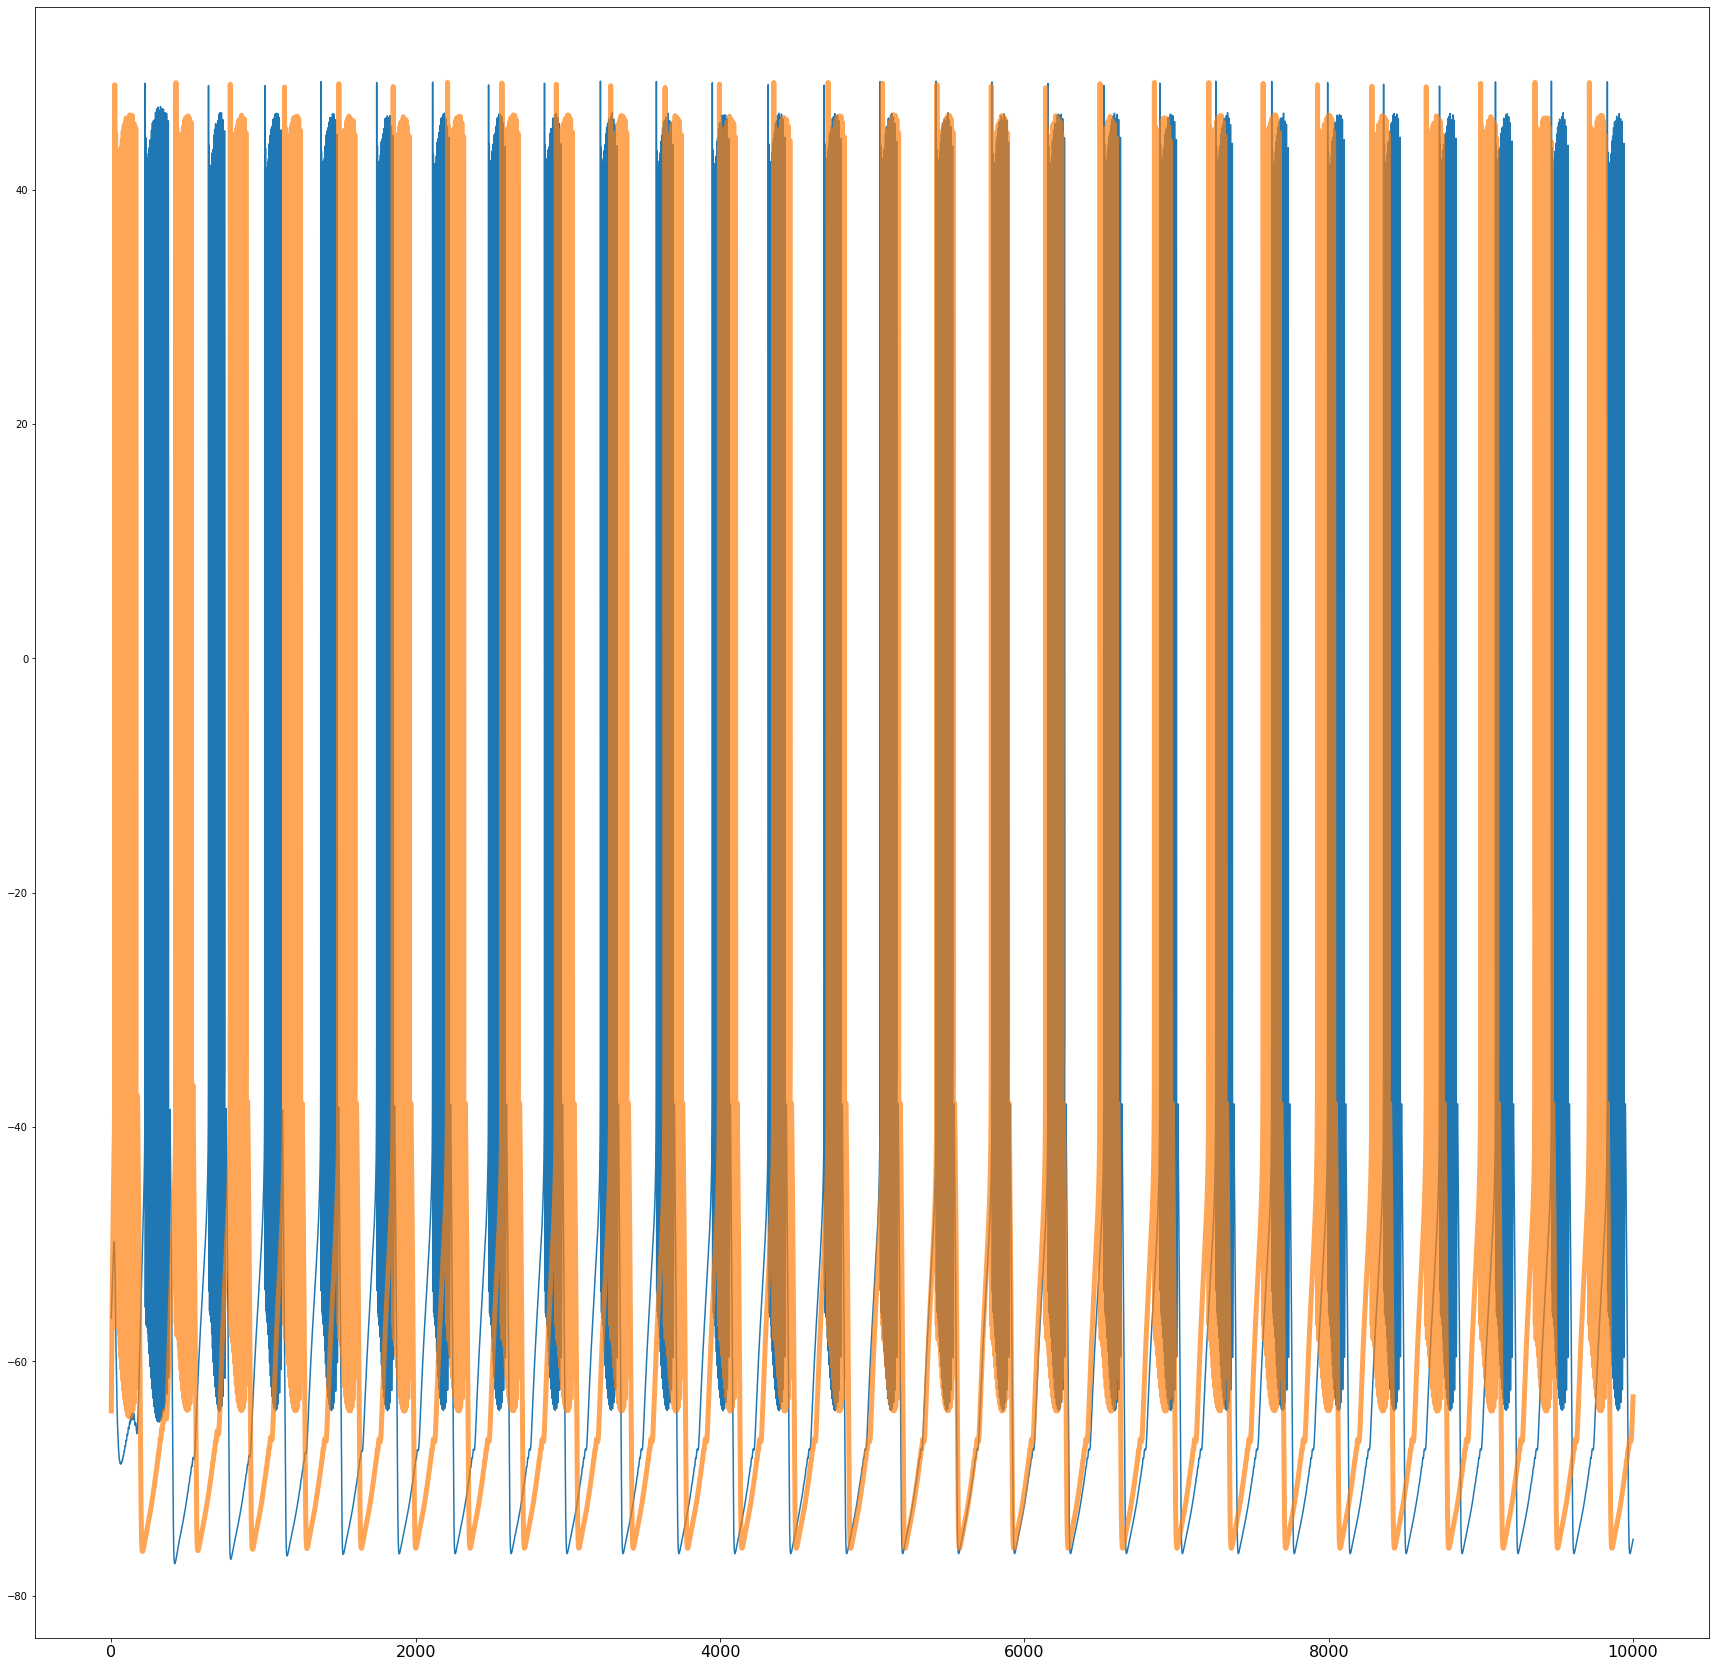

In [99]:
#compare plot of neuron 1 in two cases
Tfinal=10000.0
T=np.linspace(0., Tfinal, 100000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol15[:,0])
plt.plot(T, sol16[:,0],linewidth=5,alpha=0.7)

0.11784160506218903


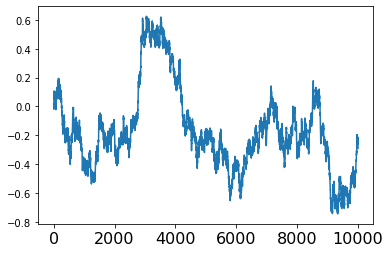

In [100]:
noise=(np.random.normal(size=200000))*10
noise[0]=0
for i in range(len(noise)-1):
    noise[i+1]=noise[i]+(noise[i+1]-noise[i])/1500
    
noise=(noise-noise.mean())*2
plt.plot(noise[0:10000])
print(noise.var())

In [101]:
cells=[]
Ivec=[-1.5,-1]
for i in range(2):
        cells.append(neuron(NumbaList(
            [gCaT_gastr,gKd,gH,gNa,gA_gastr,gCaS_gastr,gKCa_gastr,C,gleak,KdCa,kc]
        ),
             e_dyns,e_dyns,ob_type='V'
        ))# initialised cells in the STG network
        cells[i].set_input(NumbaList([Ivec[i],0,0,0,0,0,0,2,0,0]))
        cells[i].set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
        cells[i].set_tau(tmKCavec[i],1.,10.)
        
   
        
# defined network topology (two types of connections, each defined by a matrix)
net1=network(cells,[[0,0.2],[0.2,0]],[[0.,0.],[0.,0.]])
def noisy_input_net(t,u):
    return net1.sys_equ_noise(t,u,[noise[int(t*10)-1],0])     
# get initial condition 
X0=inti_cond_net_sys(net1)
# set simulation time
Tfinal=10000.0
tspan=[0.0,Tfinal]
T=np.linspace(0., Tfinal, 100000)
# start simulation and the timer 
start = time.time()
sol17=odeint(noisy_input_net, X0,T,tfirst=True)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
num_Theta 8
num_Theta 9
num_Theta 8
num_Theta 9
Elapsed (with compilation) = 310.3954575061798


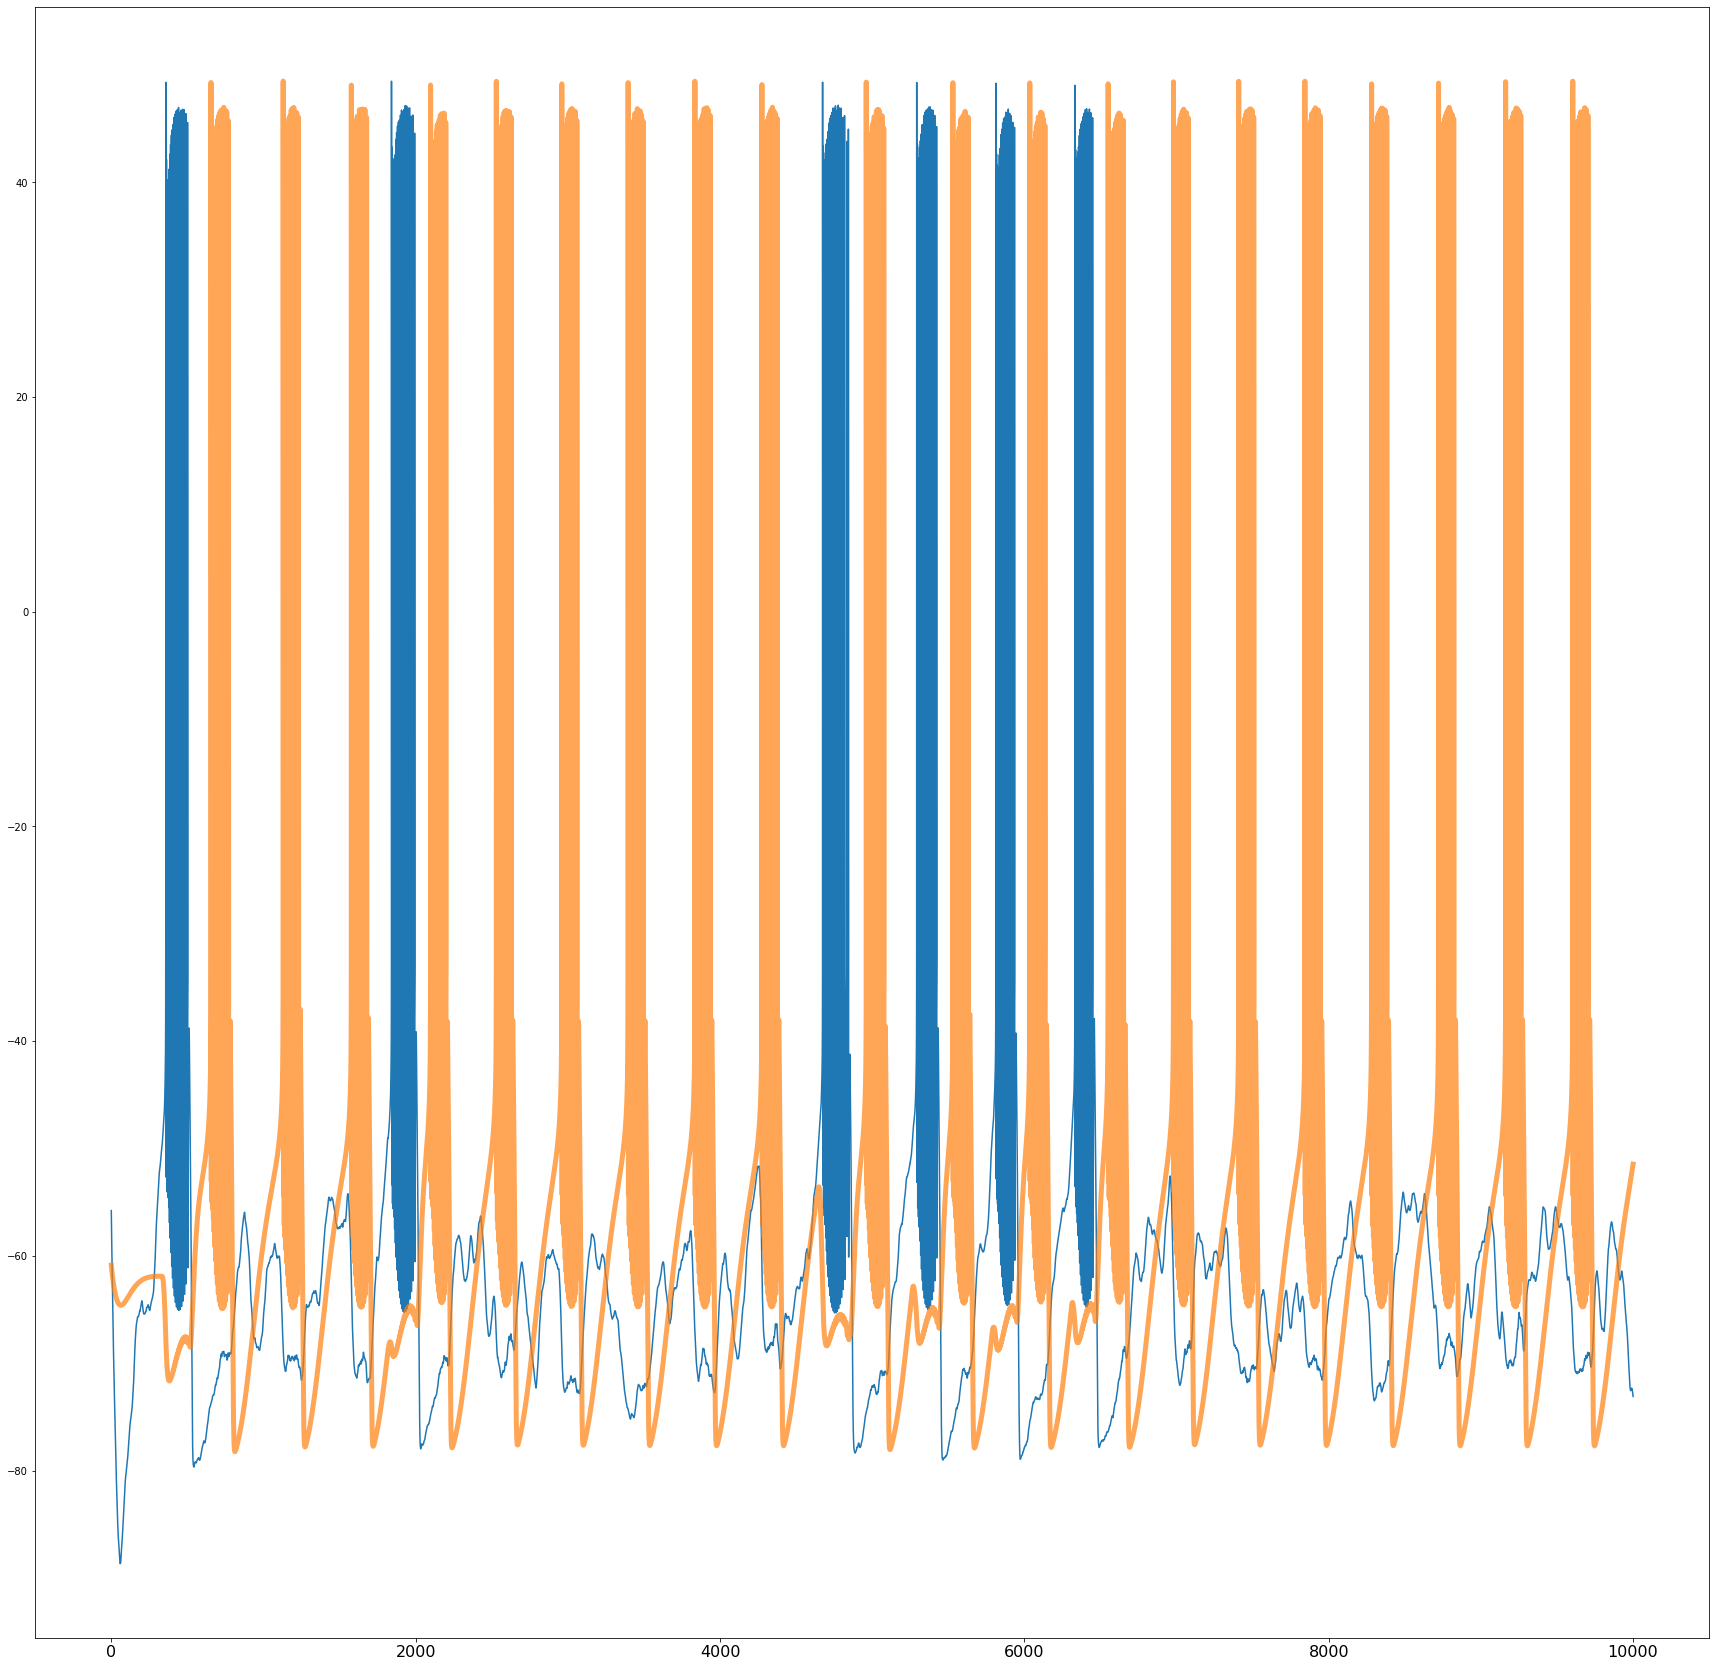

In [102]:
Tfinal=10000.0
T=np.linspace(0., Tfinal, 100000)
fig=plt.figure(figsize=(30, 30))
plt.plot(T, sol17[:,0])
plt.plot(T, sol17[:,16],linewidth=5,alpha=0.7)

## STG simulations

#### example : STG with V only observer (no mismatches)

In [103]:
net8=random_MOD_mis([0.,1.,1.,1.,0.],False,False)
# set hyper parameters for adaptive observer
gamma=10.
alpha=0.001
# set neuromodulation scheme for STG
net8.set_mod(fgS,fgT)
# specify parameters to learn (all in this case)
variable_mask1=np.array([1.,1.,1.,1.,1.,1.,1.,1.,1.]) # cells with one synapse 
variable_mask2=np.array([1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]) # cells with two synapes
variable_mask3=np.array([1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.])# cells with four synapes
net8.cells[0].set_hyp(gamma,alpha,variable_mask1)
net8.cells[1].set_hyp(gamma,alpha,variable_mask2)
net8.cells[2].set_hyp(gamma,alpha,variable_mask3)
net8.cells[3].set_hyp(gamma,alpha,variable_mask2)
net8.cells[4].set_hyp(gamma,alpha,variable_mask1)
# get initial condition 
X0=inti_cond_net(net8)
# set simulation time
Tfinal=28000.0
tspan=[0.0,Tfinal]
# start simulation and the timer 
start = time.time()
sol8=solve_ivp(net8.ob_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
[1. 1. 1. 1. 1. 1.]
num_Theta 8
V
num_Theta 8
num_Theta 9
num_Theta 9
num_Theta 10
num_Theta 10
num_Theta 12
num_Theta 9
num_Theta 10
num_Theta 8
num_Theta 9
[11.84086577 87.07093088 29.32830647 42.53125486 73.44963744 69.14157054
 68.0712664  21.7412521  49.20091405]
[-58.1259398]
[49.18016215 66.01003375 30.88187415 82.99833135 95.13772056 85.85907797
 15.80320121 42.6500253  74.50080533 46.714138  ]
[-79.13606185]
[76.30986146 29.35930439 26.97125974 91.4715955  82.90343948 24.41550632
 31.75733526 96.14250494  7.35839374 22.54521571 82.87262671 62.97196923]
[-25.75644316]
[81.52481728 53.19080519 69.64184655 90.90085235 29.91249187  1.66509237
 61.80068977 80.70798934 89.31052756 86.81404836]
[-41.74424994]
[ 1.65744781  1.42296325 64.70162062 92.01453461 52.64954132 49.19408248
 35.44805603 20.6467599  42.62941389]
[-81.5212432]
Elapsed (with comp

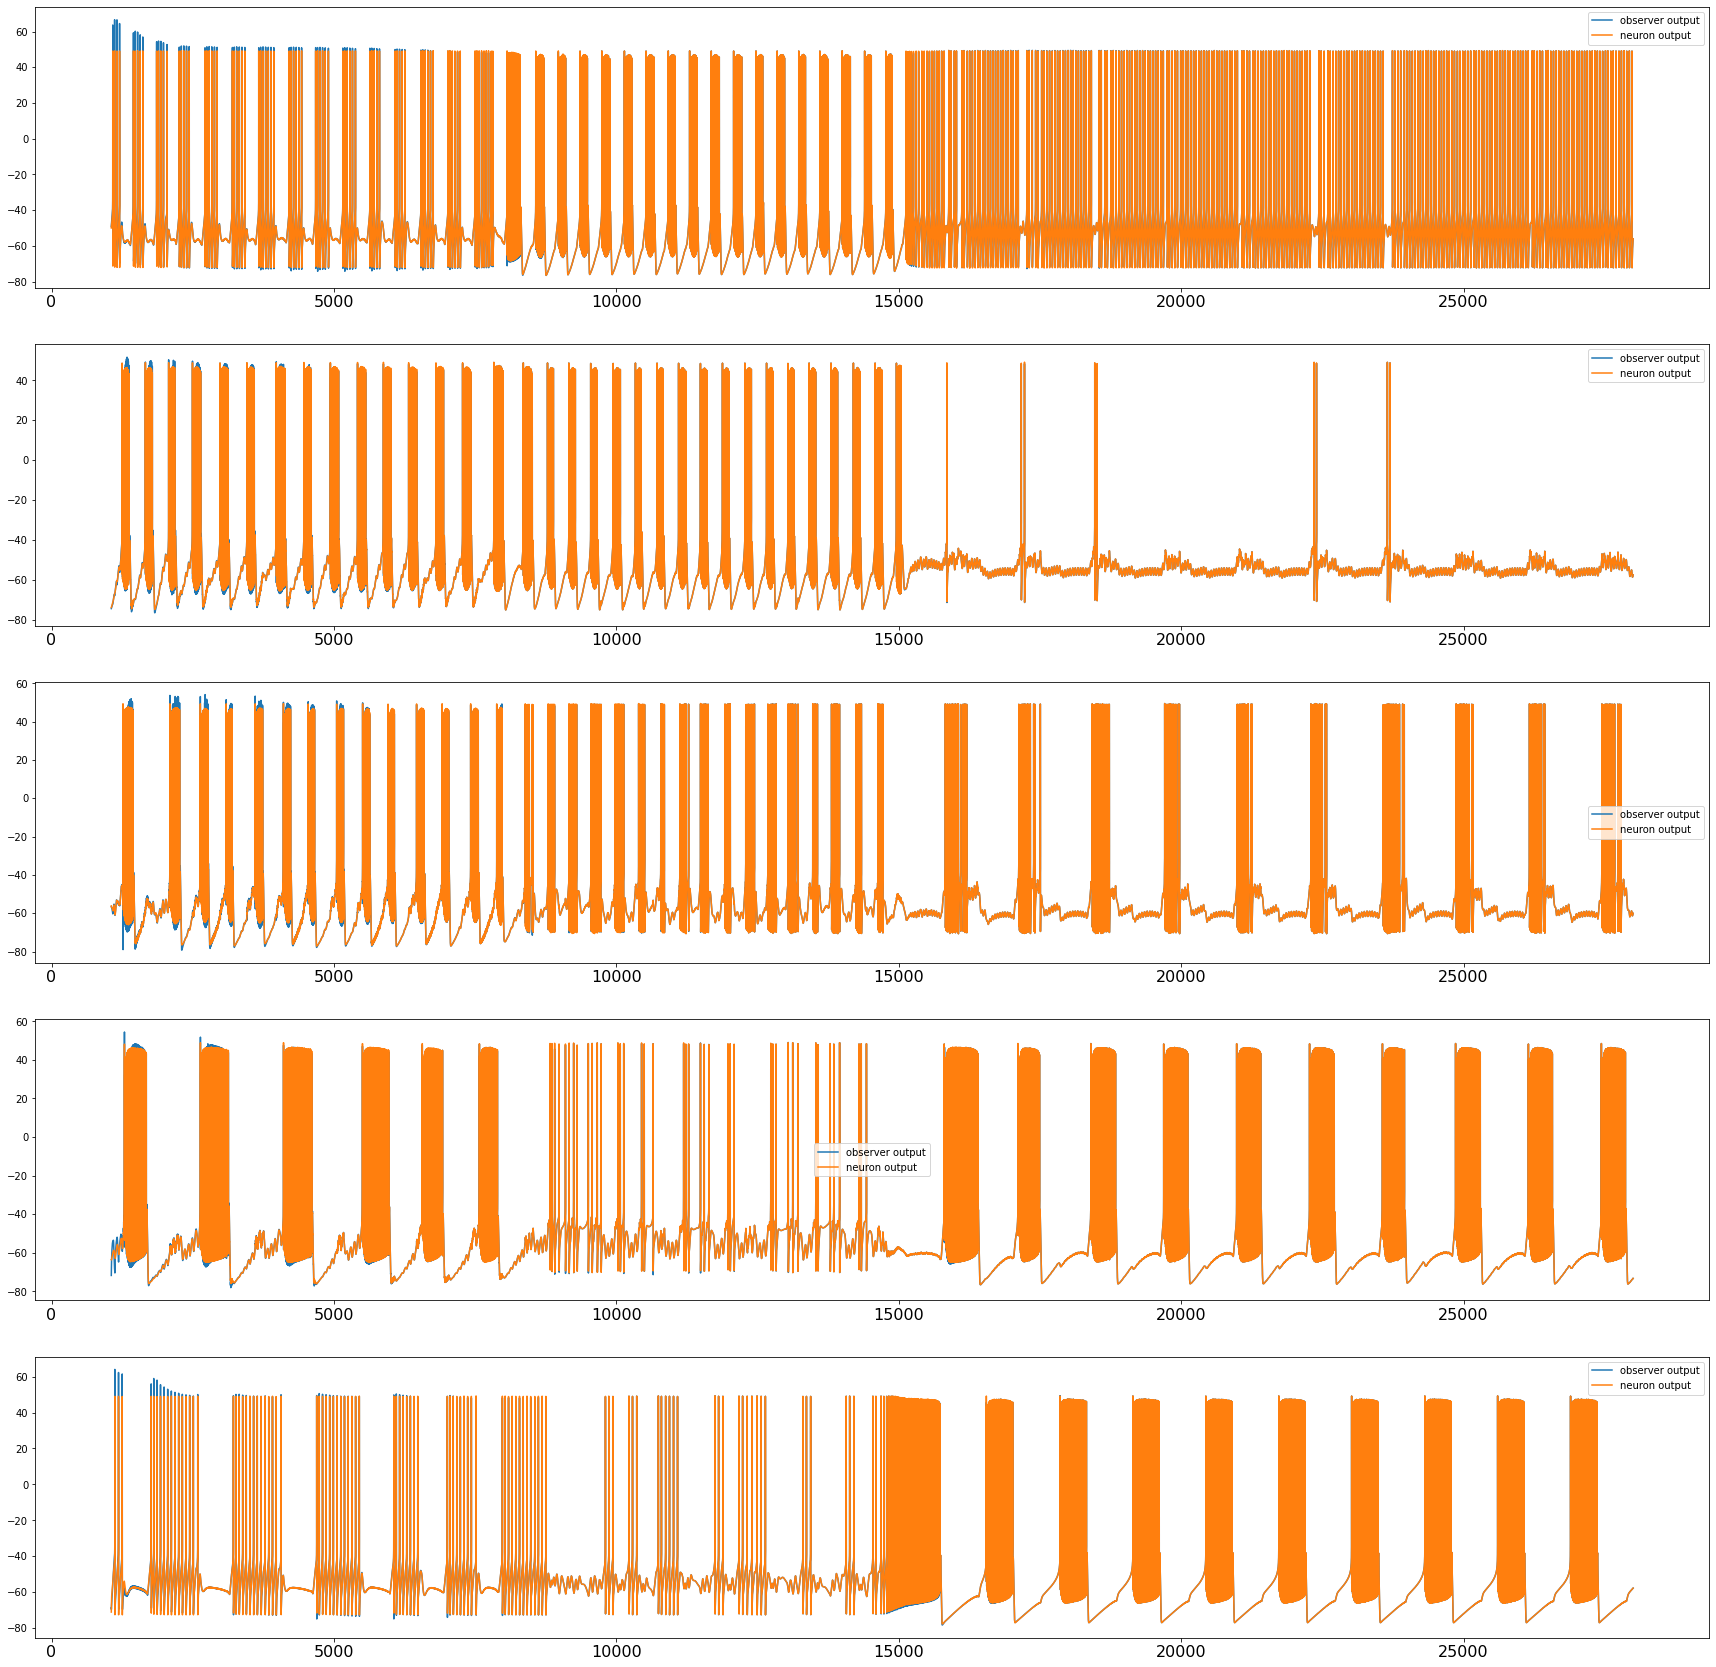

In [104]:
plot_fun(net8,sol8)

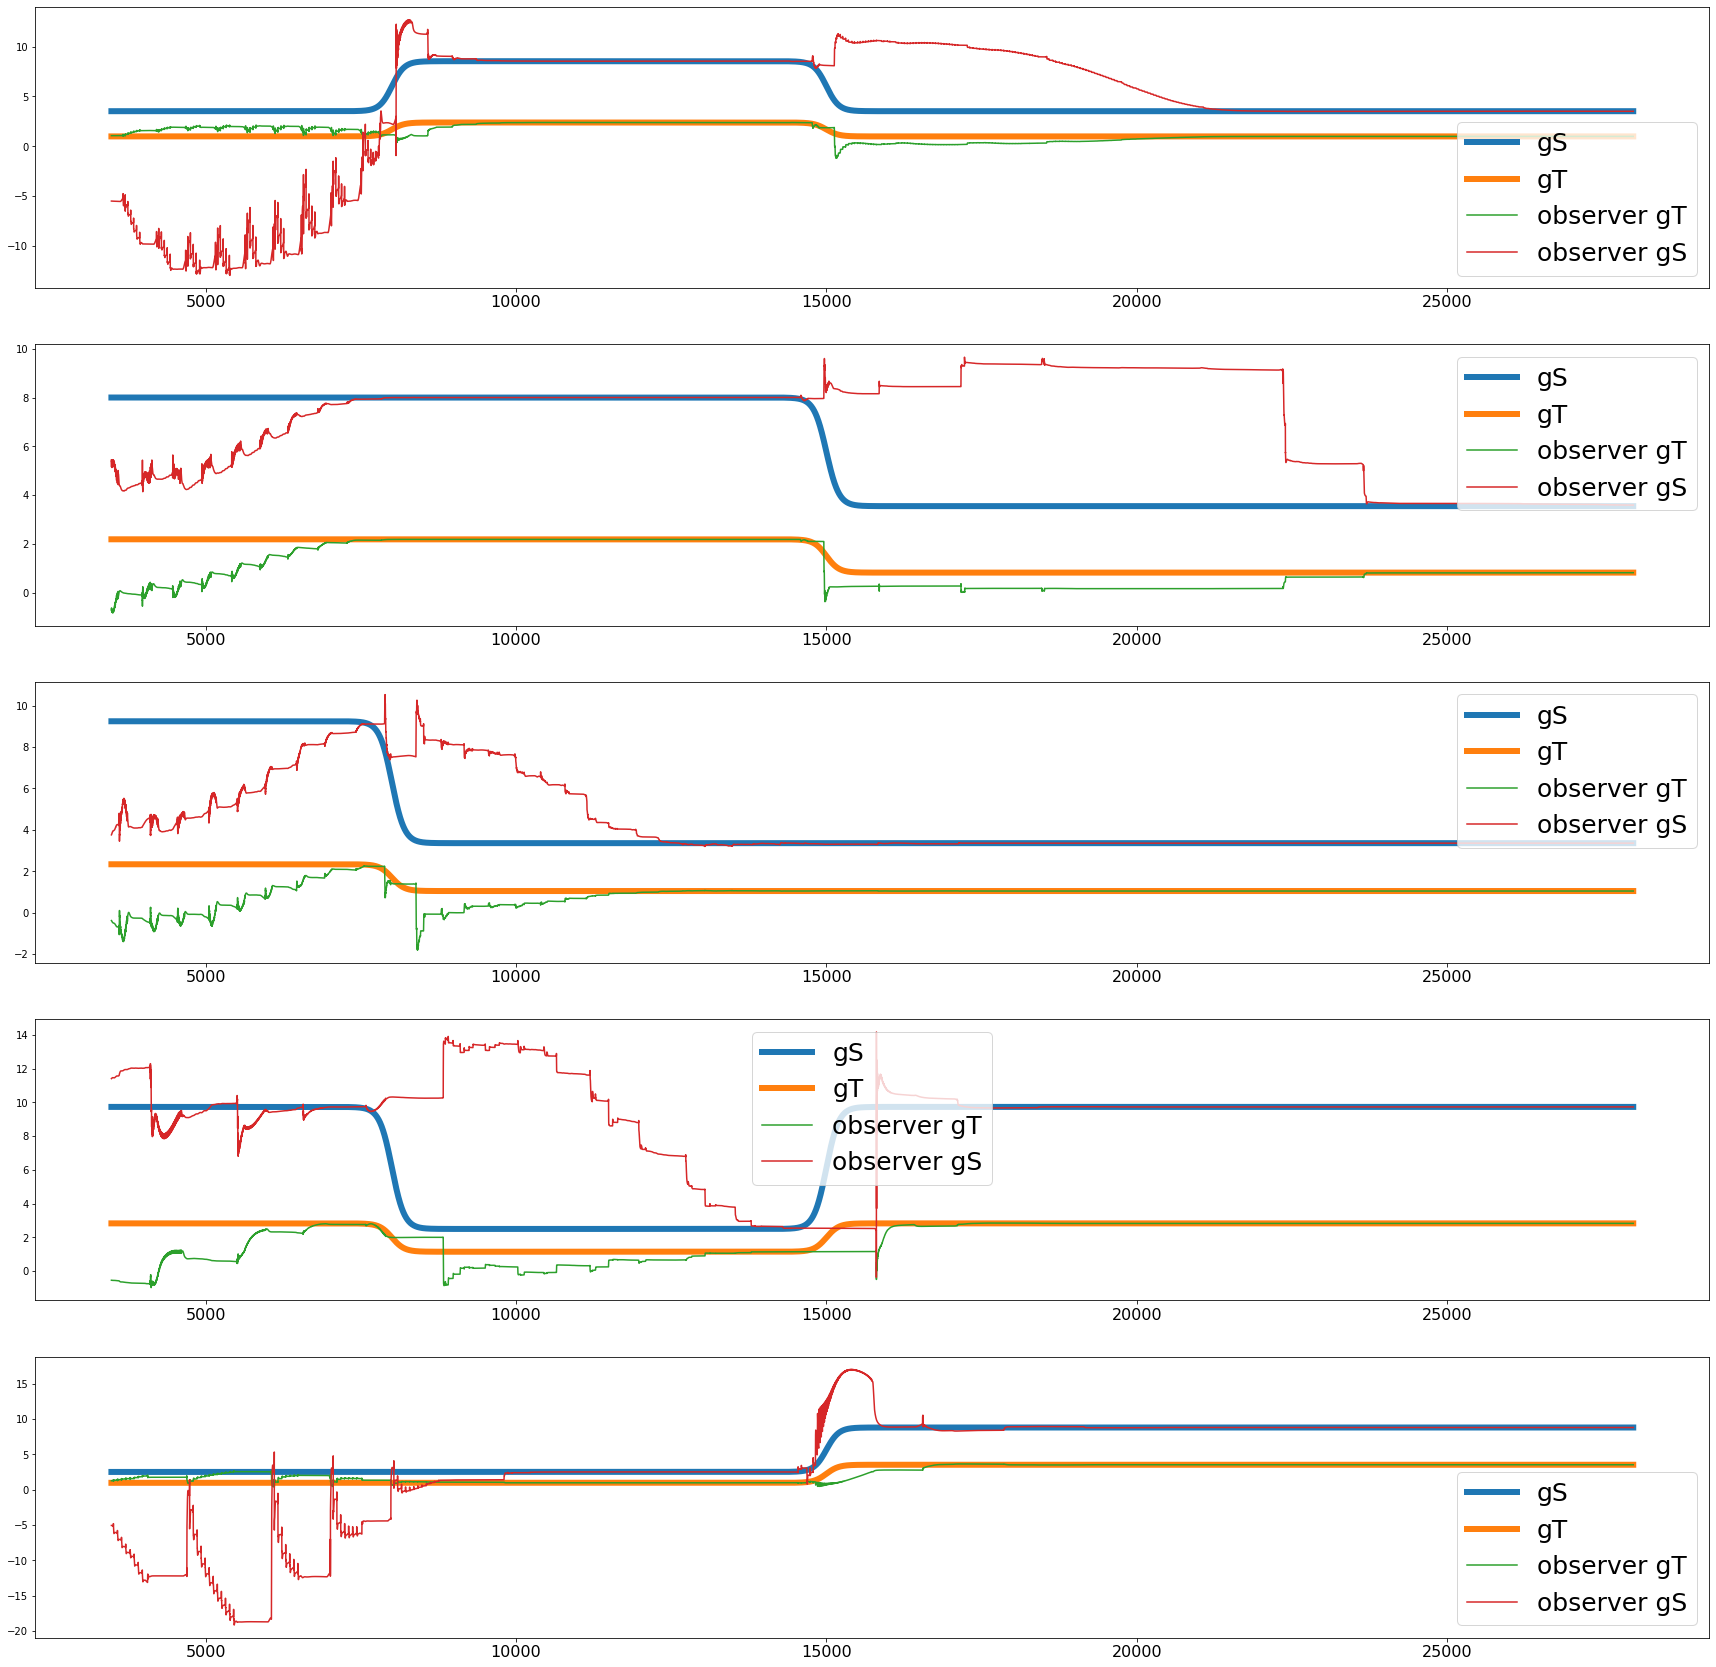

0.9945089382042944
0.8211437135106004
1.0495800000012456
2.8295700663263346
3.5257400478136227


In [105]:
fig=plot_fun2(net8,sol8,fgS,fgT,origin=0)

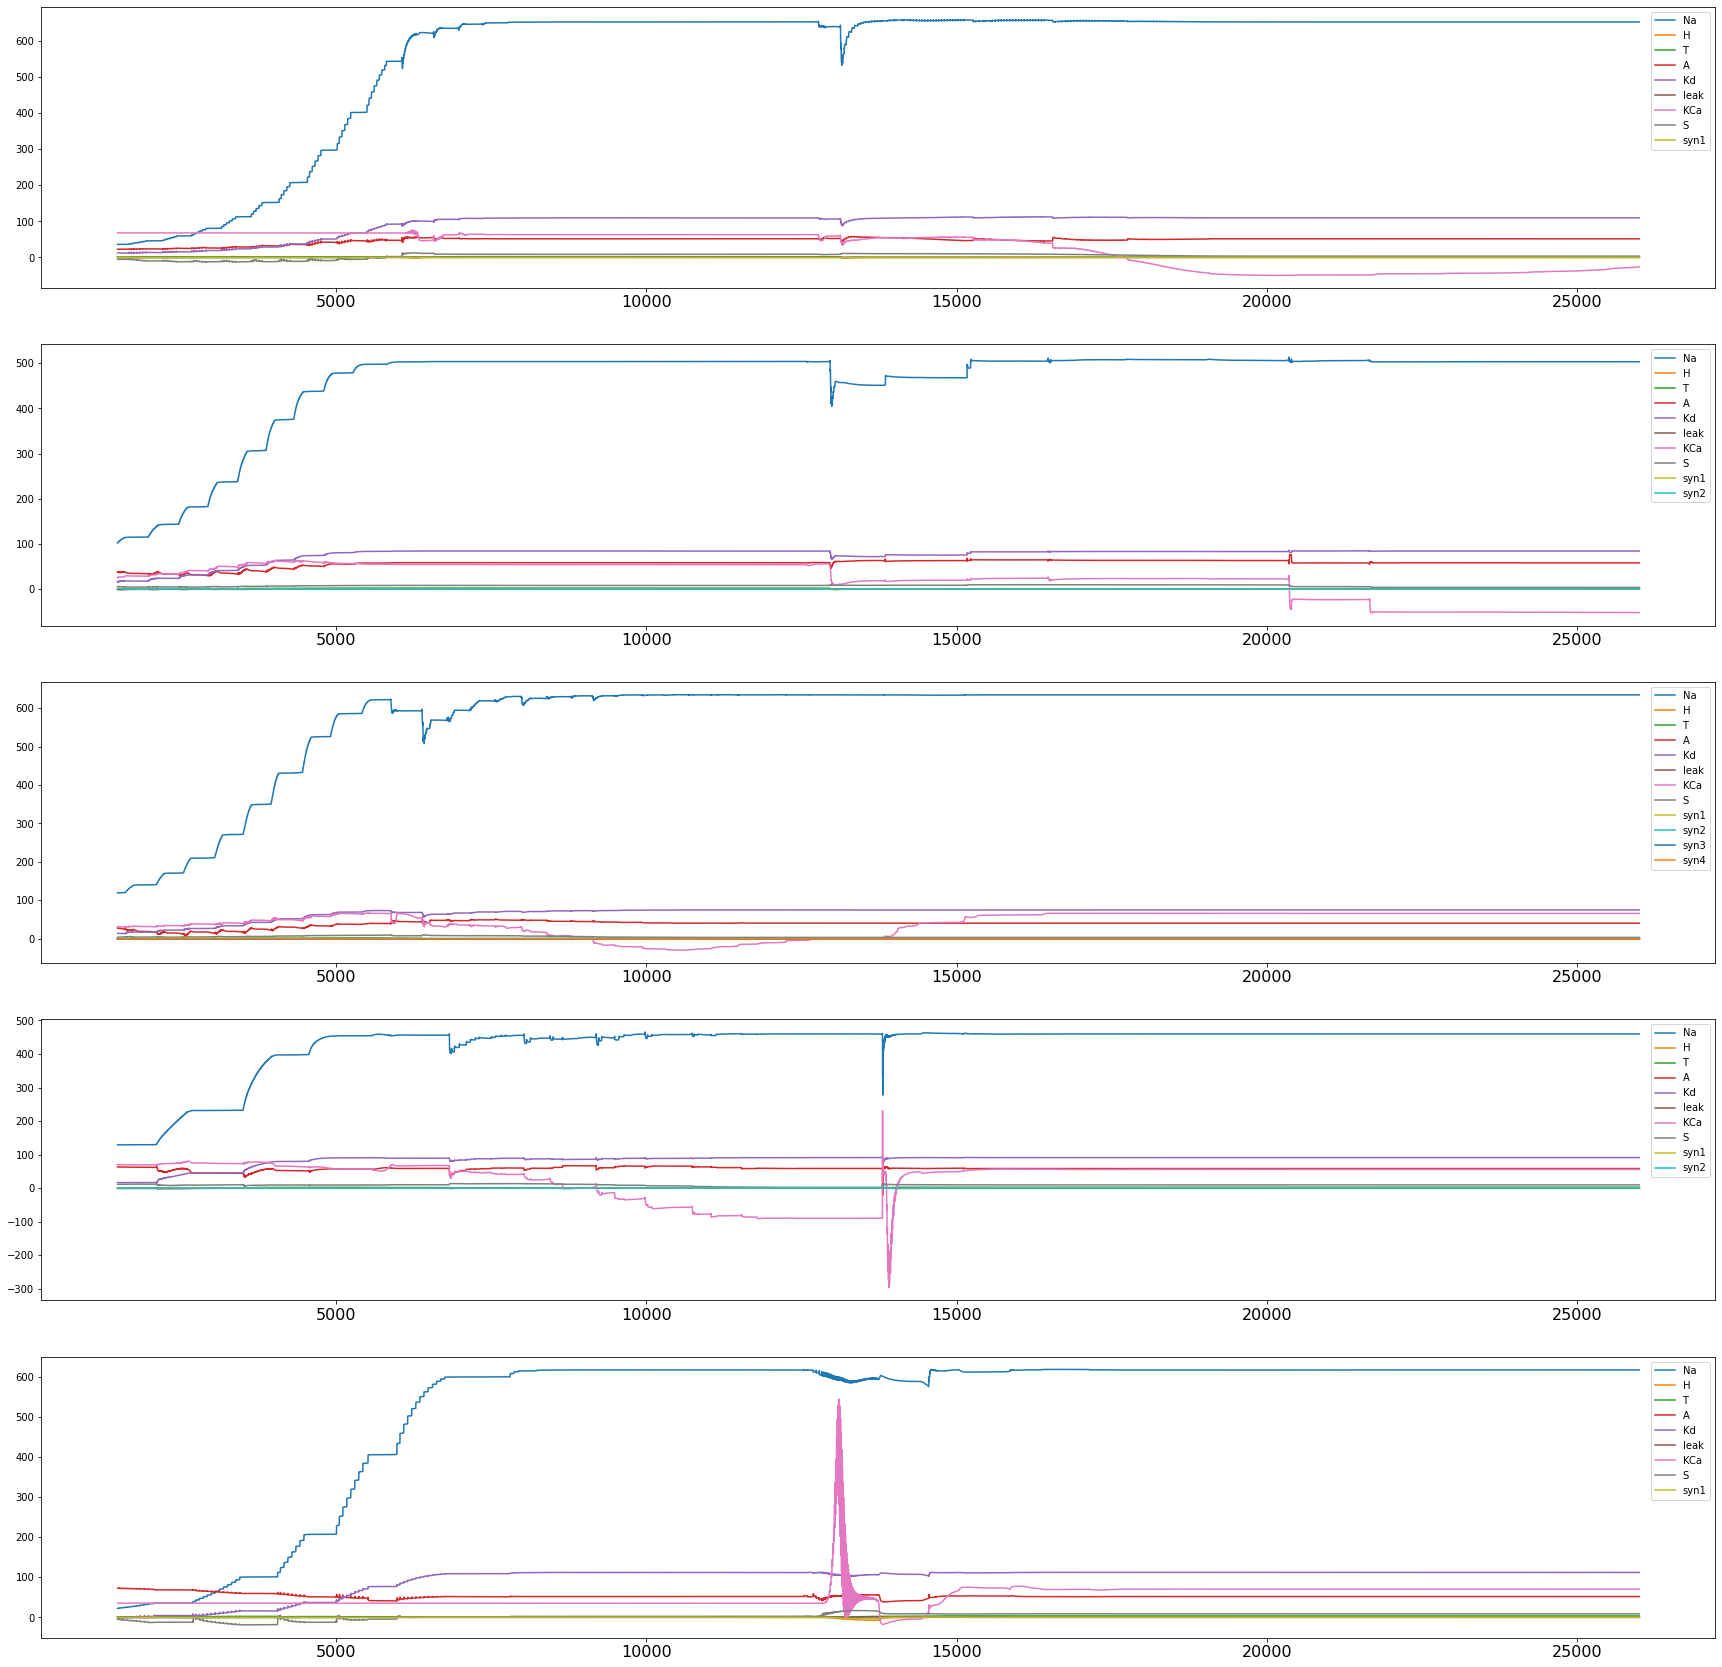

In [106]:
plot_fun3(net8,sol8,origin=2000)

#### example simulating STG only

In [107]:
# get initial condition 
X0=inti_cond_net(net8)
# set simulation time
Tfinal=28000.0
tspan=[0.0,Tfinal]
# start simulation and the timer 
start = time.time()
sol9=solve_ivp(net8.sys_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

[2.23925660e-02 3.01126960e+01 1.26784050e+01 2.94663177e+01
 6.30249180e+00 5.35947078e+01 3.72919517e+01 7.62575672e+01
 2.34848585e+01]
[-69.77405231]
[30.30013149 95.99118451 98.45177525 65.9234409  87.53967742 17.25226118
  3.22948336 85.84736292 18.28167325 94.66310689]
[-96.44348942]
[92.49627347 67.09628169 62.03993515 53.38374186 38.29230693 87.43810123
 66.64334277 41.25638476 98.67101462 16.01246283 96.25774099 50.70973169]
[-75.76366482]
[98.20956776 23.3392592  44.82969758 10.41726325 52.35666967 88.60818724
 97.08374245 29.53624413 18.74834188  5.41076323]
[-80.71620787]
[92.16882477 49.44794253 43.60047174 84.46584509 50.01670344 96.92330984
 11.22196189 76.55043224 25.78997147]
[-77.5111175]


ValueError: operands could not be broadcast together with shapes (81,) (768,) 

#### example simulating one independent cell only

In [ ]:
cell1=neuron(NumbaList(
            [gCaTvec[0],gKdvec[0],gHvec[0],gNavec[0],gAvec[0],gCaSvec[0],gKCavec[0],C,gleakvec[0],KdCavec[0],kcvec[0]]
        ),
             e_dyns,e_dyns,ob_type='V'
        )
cell1.set_input(NumbaList([Iappvec[0],0,0,0,0,0,0,2,0,0]))
cell1.set_rev(NumbaList([VNa,VCa,VK,VH,Vleak,VSyn]))
cell1.set_tau(tmKCavec[0],1.,10.)
variable_mask1=np.array([1.,1.,1.,1.,1.,1.,1.,1.]) # no synape connections so only 8 parameters
cell1.set_hyp(gamma,alpha,variable_mask1)
# get initial condition 
X0=cell1.init_cond_OB(-60)
# set simulation time
Tfinal=20000.0
tspan=[0.0,Tfinal]
# start simulation and the timer 
start = time.time()
sol=solve_ivp(cell1.OB_ODE_V_equ,tspan , X0)#use V only observer
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
plt.plot(sol.t, sol.y[0])

In [ ]:
plt.plot(sol.t[1000:30000],sol.y[0][1000:30000],label='observer output')
plt.plot(sol.t[1000:30000],sol.y[cell1.pos_p][1000:30000],label= 'neuron output')
plt.legend()
plt.ylabel('voltage')
plt.xlabel('time')

In [ ]:
labels=[ 'Na','H','T','A','Kd','leak','KCa','S','syn1','syn2','syn3','syn4']
    
    
    
T_plot=0

for i in range(cell1.num_Theta):
    plt.plot(sol.t[T_plot:],sol.y[cell1.pos_dinamics+i][T_plot:],label=labels[i])
plt.legend()

## Robustness simulations

### 1 Mismatches in time-constant function

#### STG simulation 7 (Voltage input only adaptive observer, estimate only calcium conductances, with mismatches in time-constant functions)

In [ ]:
# inintialise STG network with Voltage input only adaptive observer 
net1=random_MOD_mis([0.,1.,1.,1.,0.],True,False) # second argument set to true to include mismatches in time-constant functions
# set hyper parameters for adaptive observer
gamma=10.
alpha=0.001
# set neuromodulation scheme for STG
net1.set_mod(fgS2,fgT2)
# specify parameters to learn (gT and gS in this case)
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.])
variable_mask2=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.])
variable_mask3=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,0.,0.])
net1.cells[0].set_hyp(gamma,alpha,variable_mask1)
net1.cells[1].set_hyp(gamma,alpha,variable_mask2)
net1.cells[2].set_hyp(gamma,alpha,variable_mask3)
net1.cells[3].set_hyp(gamma,alpha,variable_mask2)
net1.cells[4].set_hyp(gamma,alpha,variable_mask1)
# get initial condition 
X0=inti_cond_net(net1)
# set simulation time
Tfinal=28000.0
tspan=[0.0,Tfinal]
# start simulation and the timer 
start = time.time()
sol1=solve_ivp(net1.ob_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
fig=plot_fun2(net1,sol1,fgS2,fgT2)
fig.savefig('robustness_1',bbox_inches='tight')

#### STG simulation 8 (Adaptive observer with voltage and calcium concentration inputs, only estimate gCa, with mismatches in time-constant functions)

In [ ]:
net2=random_MOD_mis2([0.,1.,1.,1.,0.],True,False)
gamma=10.
alpha=0.001
net2.set_mod(fgS2,fgT2)
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.])
variable_mask2=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.])
variable_mask3=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,0.,0.])
net2.cells[0].set_hyp(gamma,alpha,variable_mask1)
net2.cells[1].set_hyp(gamma,alpha,variable_mask2)
net2.cells[2].set_hyp(gamma,alpha,variable_mask3)
net2.cells[3].set_hyp(gamma,alpha,variable_mask2)
net2.cells[4].set_hyp(gamma,alpha,variable_mask1)
#net1.set_mod(fgS,fgT)
X0=inti_cond_net(net2)
Tfinal=28000.0
tspan=[0.0,Tfinal]
start = time.time()
sol2=solve_ivp(net2.ob_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
fig=plot_fun2(net2,sol2,fgS2,fgT2)
fig.savefig('robustness_2',bbox_inches='tight')

#### STG simulation 9 (Adaptive observer minimizing calcium concentration error, only estimate gCa, with mismatches in time-constant functions

In [ ]:
# inintialise STG network with Ca based adaptive observer 
net3=random_MOD_mis3([0.,1.,1.,1.,0.],True,False)
gamma=10.
alpha=0.001
net3.set_mod(fgS2,fgT2)
# can only learn gS and gT
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.])
variable_mask2=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.])
variable_mask3=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,0.,0.])
net3.cells[0].set_hyp(gamma,alpha,variable_mask1)
net3.cells[1].set_hyp(gamma,alpha,variable_mask2)
net3.cells[2].set_hyp(gamma,alpha,variable_mask3)
net3.cells[3].set_hyp(gamma,alpha,variable_mask2)
net3.cells[4].set_hyp(gamma,alpha,variable_mask1)
#net1.set_mod(fgS,fgT)
X0=inti_cond_net(net3)
Tfinal=28000.0
tspan=[0.0,Tfinal]
start = time.time()
sol3=solve_ivp(net3.ob_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
fig=plot_fun2(net3,sol3,fgS2,fgT2)
fig.savefig('robustness_3',bbox_inches='tight')

### 2 Mismatches in activation functions

#### STG simulation 10 (Voltage input only adaptive observer, estimate only calcium conductances, with mismatches in activation functions

In [ ]:
# inintialise STG network with Voltage input only adaptive observer 
net4=random_MOD_mis([0.,1.,1.,1.,0.],False,True)# third argument set to true to include mismatches in time-constant functions
# set hyper parameters for adaptive observer
gamma=10.
alpha=0.001
# set neuromodulation scheme for STG
net4.set_mod(fgS2,fgT2)
# specify parameters to learn (gT and gS in this case)
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.])
variable_mask2=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.])
variable_mask3=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,0.,0.])
net4.cells[0].set_hyp(gamma,alpha,variable_mask1)
net4.cells[1].set_hyp(gamma,alpha,variable_mask2)
net4.cells[2].set_hyp(gamma,alpha,variable_mask3)
net4.cells[3].set_hyp(gamma,alpha,variable_mask2)
net4.cells[4].set_hyp(gamma,alpha,variable_mask1)
# get initial condition 
X0=inti_cond_net(net4)
# set simulation time
Tfinal=28000.0
tspan=[0.0,Tfinal]
# start simulation and the timer 
start = time.time()
sol4=solve_ivp(net4.ob_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
fig=plot_fun2(net4,sol4,fgS2,fgT2)
fig.savefig('robustness_4',bbox_inches='tight')

#### STG simulation 11 (Adaptive observer with voltage and calcium concentration inputs, only estimate gCa, with mismatches in activation functions)

In [ ]:
net5=random_MOD_mis2([0.,1.,1.,1.,0.],False,True)
gamma=10.
alpha=0.001
net5.set_mod(fgS2,fgT2)
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.])
variable_mask2=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.])
variable_mask3=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,0.,0.])
net5.cells[0].set_hyp(gamma,alpha,variable_mask1)
net5.cells[1].set_hyp(gamma,alpha,variable_mask2)
net5.cells[2].set_hyp(gamma,alpha,variable_mask3)
net5.cells[3].set_hyp(gamma,alpha,variable_mask2)
net5.cells[4].set_hyp(gamma,alpha,variable_mask1)
#net1.set_mod(fgS,fgT)
X0=inti_cond_net(net5)
Tfinal=28000.0
tspan=[0.0,Tfinal]
start = time.time()
sol5=solve_ivp(net5.ob_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
fig=plot_fun2(net5,sol5,fgS2,fgT2)
fig.savefig('robustness_5',bbox_inches='tight')

#### STG simulation 12 (Ca+ based adaptive observer, only estimate gCa, with mismatches in time-constant functions)

In [ ]:
net6=random_MOD_mis3([0.,1.,1.,1.,0.],False,True)
gamma=10.
alpha=0.001
net6.set_mod(fgS2,fgT2)
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.])
variable_mask2=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.])
variable_mask3=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,0.,0.])
net6.cells[0].set_hyp(gamma,alpha,variable_mask1)
net6.cells[1].set_hyp(gamma,alpha,variable_mask2)
net6.cells[2].set_hyp(gamma,alpha,variable_mask3)
net6.cells[3].set_hyp(gamma,alpha,variable_mask2)
net6.cells[4].set_hyp(gamma,alpha,variable_mask1)
#net1.set_mod(fgS,fgT)
X0=inti_cond_net(net6)
Tfinal=28000.0
tspan=[0.0,Tfinal]
start = time.time()
sol6=solve_ivp(net6.ob_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
fig=plot_fun2(net6,sol6,fgS2,fgT2)
fig.savefig('robustness_6',bbox_inches='tight')

#### STG simulation 13 (Ca+ based adaptive observer, only estimate gCa, with mismatches in time-constant functions, activation functions and maximum conductances)

In [ ]:
net_t2=random_MOD_mis3([0.,1.,1.,1.,0.],True,True)# second and third argument set to true to include both mismatches
gamma=10.
alpha=0.001
net_t2.set_mod(fgS2,fgT2)
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.])
variable_mask2=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.])
variable_mask3=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,0.,0.])
net_t2.cells[0].set_hyp(gamma,alpha,variable_mask1)
net_t2.cells[1].set_hyp(gamma,alpha,variable_mask2)
net_t2.cells[2].set_hyp(gamma,alpha,variable_mask3)
net_t2.cells[3].set_hyp(gamma,alpha,variable_mask2)
net_t2.cells[4].set_hyp(gamma,alpha,variable_mask1)
#net1.set_mod(fgS,fgT)
X0=inti_cond_net_mis(net_t2)
Tfinal=28000.0
tspan=[0.0,Tfinal]
start = time.time()
sol_t2=solve_ivp(net_t2.ob_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
fig=plot_fun2(net_t2,sol_t2,fgS2,fgT2)
fig.savefig('robustness_7',bbox_inches='tight')

In [ ]:
net_t3=random_MOD_mis3([0.,1.,1.,1.,0.],True,True)# second and third argument set to true to include both mismatches
gamma=10.
alpha=0.001
net_t3.set_mod(fgS2,fgT2)
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.])
variable_mask2=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.])
variable_mask3=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,0.,0.])
net_t3.cells[0].set_hyp(gamma,alpha,variable_mask1)
net_t3.cells[1].set_hyp(gamma,alpha,variable_mask2)
net_t3.cells[2].set_hyp(gamma,alpha,variable_mask3)
net_t3.cells[3].set_hyp(gamma,alpha,variable_mask2)
net_t3.cells[4].set_hyp(gamma,alpha,variable_mask1)
#net1.set_mod(fgS,fgT)
X0=inti_cond_net_0(net_t3)
Tfinal=28000.0
tspan=[0.0,Tfinal]
start = time.time()
sol_t3=solve_ivp(net_t3.ob_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
fig=plot_fun2(net_t3,sol_t3,fgS2,fgT2)
fig.savefig('robustness_8',bbox_inches='tight')

In [ ]:
net_t3=random_MOD_mis3([0.,0.,0.,0.,0.],True,True)# second and third argument set to true to include both mismatches
gamma=10.
alpha=0.001
##net_t3.set_mod(fgS2,fgT2)
variable_mask1=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.])
variable_mask2=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.])
variable_mask3=np.array([0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,0.,0.])
net_t3.cells[0].set_hyp(gamma,alpha,variable_mask1)
net_t3.cells[1].set_hyp(gamma,alpha,variable_mask2)
net_t3.cells[2].set_hyp(gamma,alpha,variable_mask3)
net_t3.cells[3].set_hyp(gamma,alpha,variable_mask2)
net_t3.cells[4].set_hyp(gamma,alpha,variable_mask1)
#net1.set_mod(fgS,fgT)
X0=inti_cond_net_sys(net_t3)
Tfinal=28000.0
tspan=[0.0,Tfinal]
start = time.time()
sol_t3=solve_ivp(net_t3.sys_equ,tspan , X0)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

In [ ]:
plot_fun_sys(net_t3,sol_t3)